This notebook illustrates using clustering and our descriptors compounds.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
data = pd.read_csv("../data/final/clean_trial4.csv")

In [3]:
data.head(2)

logkpl Compound     SMILES  Texpi    ALogp2  nAcid  nAromBond     ATSc2  \
0   -3.55     Urea  C(=O)(N)N    312  1.085972      0          0 -0.116019   
1   -3.69     Urea  C(=O)(N)N    312  1.085972      0          0 -0.116019   

      ATSc3  ATSc4  ...  nRings9  TopoPSA   VAdjMat    WTPT-2    WTPT-3  \
0  0.023614    0.0  ...        0    69.11  2.584963  1.683013  6.732051   
1  0.023614    0.0  ...        0    69.11  2.584963  1.683013  6.732051   

     WTPT-4    WTPT-5  WPATH  XLogP  Zagreb  
0  2.244017  4.488034    9.0 -1.686    12.0  
1  2.244017  4.488034    9.0 -1.686    12.0  

[2 rows x 149 columns]

In [4]:
# getting all descriptors except compound name
without_compound = data.drop(['Compound','SMILES'], axis=1)
without_compound.head(2)

logkpl  Texpi    ALogp2  nAcid  nAromBond     ATSc2     ATSc3  ATSc4  \
0   -3.55    312  1.085972      0          0 -0.116019  0.023614    0.0   
1   -3.69    312  1.085972      0          0 -0.116019  0.023614    0.0   

   ATSc5    ATSm1  ...  nRings9  TopoPSA   VAdjMat    WTPT-2    WTPT-3  \
0    0.0  5.49443  ...        0    69.11  2.584963  1.683013  6.732051   
1    0.0  5.49443  ...        0    69.11  2.584963  1.683013  6.732051   

     WTPT-4    WTPT-5  WPATH  XLogP  Zagreb  
0  2.244017  4.488034    9.0 -1.686    12.0  
1  2.244017  4.488034    9.0 -1.686    12.0  

[2 rows x 147 columns]

In [5]:
# scaling our data by using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(without_compound)

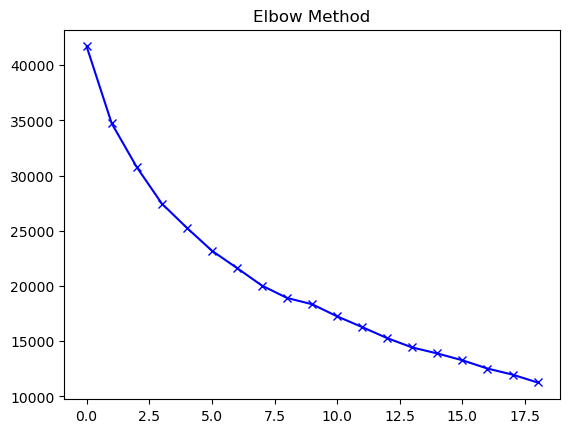

In [6]:
# elbow method
n_clusters = 20
cost = []
for i in range(1, n_clusters):
    kmean= KMeans(i, n_init=10, max_iter=1000)
    kmean.fit(X_scaled)
    cost.append(kmean.inertia_)  

plt.title("Elbow Method")
plt.plot(cost, 'bx-');

In [7]:
kmean = KMeans(4, n_init=10, max_iter=1000)
kmean.fit(X_scaled)
labels = kmean.labels_

In [8]:
# adding clusters to our data
clusters = pd.concat([without_compound, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()

logkpl  Texpi    ALogp2  nAcid  nAromBond     ATSc2     ATSc3  ATSc4  \
0   -3.55    312  1.085972      0          0 -0.116019  0.023614    0.0   
1   -3.69    312  1.085972      0          0 -0.116019  0.023614    0.0   
2   -3.83    312  1.085972      0          0 -0.116019  0.023614    0.0   
3   -3.95    312  1.085972      0          0 -0.116019  0.023614    0.0   
4   -3.93    312  1.085972      0          0 -0.116019  0.023614    0.0   

   ATSc5    ATSm1  ...  TopoPSA   VAdjMat    WTPT-2    WTPT-3    WTPT-4  \
0    0.0  5.49443  ...    69.11  2.584963  1.683013  6.732051  2.244017   
1    0.0  5.49443  ...    69.11  2.584963  1.683013  6.732051  2.244017   
2    0.0  5.49443  ...    69.11  2.584963  1.683013  6.732051  2.244017   
3    0.0  5.49443  ...    69.11  2.584963  1.683013  6.732051  2.244017   
4    0.0  5.49443  ...    69.11  2.584963  1.683013  6.732051  2.244017   

     WTPT-5  WPATH  XLogP  Zagreb  cluster  
0  4.488034    9.0 -1.686    12.0        0  
1  4.488034    9.0 -1.686    12.0        0  
2  4.488034    9.0 -1.686    12.0        0  
3  4.488034    9.0 -1.686    12.0        0  
4  4.488034    9.0 -1.686    12.0        0  

[5 rows x 148 columns]

In [9]:
# using pca with 2 components to visualize our scaled data with clusters
components = 2

# initilizing and fitting the pca
pca = PCA(n_components=components)
X_pca = pca.fit_transform(X_scaled)

# making dataframe for our pca components
pca_df = pd.DataFrame(X_pca, columns=['PCA1','PCA2'])

# adding cluster assignment
pca_df['cluster'] = pd.Categorical(kmean.labels_)

# adding compound name to this dataframe
pca_df['compound'] = data['Compound']

# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca.components_[i]).argmax() for i in range(components)]

# columns/ features of our data
initial_feature_names = without_compound.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(components)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(components)}

# explained variance
print("Explained variance ratio", pca.explained_variance_ratio_)
print("\nnSum of Explained variance ratio", pca.explained_variance_ratio_.sum())
print("\nColumns chosen by PCA", dic)


pca_df

Explained variance ratio [0.20339838 0.12735985]

nSum of Explained variance ratio 0.3307582235391713

Columns chosen by PCA {'PC1': 'Zagreb', 'PC2': 'BCUTw-1l'}


PCA1      PCA2 cluster                 compound
0   -5.778002  5.540070       0                     Urea
1   -5.772955  5.553629       0                     Urea
2   -5.767908  5.567188       0                     Urea
3   -5.763583  5.578810       0                     Urea
4   -5.764304  5.576873       0                     Urea
..        ...       ...     ...                      ...
412  0.655821  7.062478       2            Methylglucose
413 -2.460170 -1.508034       1                  Eugenol
414 -2.459089 -1.505129       1                  Eugenol
415 -3.384777  4.007070       2  Methyl methanesulfonate
416 -3.390545  3.991574       2  Methyl methanesulfonate

[417 rows x 4 columns]

In [10]:
fig = px.scatter(pca_df, x='PCA1', y='PCA2', color="cluster", hover_data=['compound'], title="Compounds Clustering", width=800)

# saving the figure in html file
# fig.write_html("../results/compounds_clustering.html")

fig.show()

In [12]:
clusters['compound'] = data['Compound']

In [13]:
pca_df['logkpl'] = data['logkpl']

In [14]:
fig = px.scatter(pca_df, x='PCA1', y='PCA2', color="logkpl", hover_data=['logkpl'],title="Compounds Clustering", width=800)
fig.show()

In [15]:
pca_df

PCA1      PCA2 cluster                 compound  logkpl
0   -5.778002  5.540070       2                     Urea   -3.55
1   -5.772955  5.553629       2                     Urea   -3.69
2   -5.767908  5.567188       2                     Urea   -3.83
3   -5.763583  5.578810       2                     Urea   -3.95
4   -5.764304  5.576873       2                     Urea   -3.93
..        ...       ...     ...                      ...     ...
412  0.655821  7.062478       2            Methylglucose   -3.68
413 -2.460170 -1.508034       3                  Eugenol   -1.56
414 -2.459089 -1.505129       3                  Eugenol   -1.59
415 -3.384777  4.007070       2  Methyl methanesulfonate   -2.07
416 -3.390545  3.991574       2  Methyl methanesulfonate   -1.91

[417 rows x 5 columns]

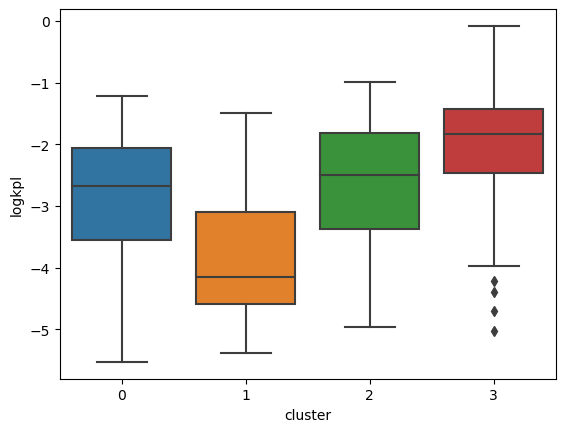

In [22]:
sns.boxplot(x="cluster", y="logkpl", data=pca_df)
plt.show()

In [17]:
# Create two traces for each set of data
trace1 = go.Scatter(
    x=pca_df['PCA1'],
    y=pca_df['PCA2'],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Legend 1'
)

trace2 = go.Scatter(
    x=pca_df['PCA1'],
    y=pca_df['logkpl'],
    
    mode='markers',
    marker=dict(color='blue', size=10),
    name='Legend 2'
)

# Create a Figure object and add the traces to it
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)

# Customize the appearance of each legend using update_traces
fig.update_traces(
    showlegend=True,
    legendgroup="group",
    name="P",
    selector=dict(name="Legend 1")
)

fig.update_traces(
    showlegend=True,
    legendgroup="group2",
    name="Legend 2",
    selector=dict(name="Legend 2")
)

# Show the figure
fig.show()

# Interpretation

In [12]:
# getting compound name and cluster
results = pca_df[['compound', 'cluster']]
results.head(2)

compound cluster
0  p-Nitrophenol; 4-nitrophenol       2
1                Benzyl bromide       2

In [13]:
# checking if any compound is has been assigned to more than one cluster
for co in results['compound'].unique():
    if results[results['compound'] == co]['cluster'].nunique() > 1:
        print(co)
print("Finished!")

Finished!


In [14]:

# sorting values by cluster to make it easier to look in excel sheet
results.sort_values('cluster', inplace=True)
results

compound cluster
88                        Diethyl maleate       0
377                              Mannitol       0
376                              Mannitol       0
375                              Mannitol       0
374                              Mannitol       0
..                                    ...     ...
67                           octylparaben       3
66                           octylparaben       3
117                               sotalol       3
128                        linolenic acid       3
445  1-(diphenylmethyl)-4-butylpiperazine       3

[446 rows x 2 columns]

In [15]:
# saving the results into excel sheet
results.to_excel('../results/clusters.xlsx', index=False)

In [46]:
clusters.columns

Index(['logkpl', 'Texpi', 'ALogp2', 'nAcid', 'nAromBond', 'ATSc2', 'ATSc3',
       'ATSc4', 'ATSc5', 'ATSm1',
       ...
       'VAdjMat', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5', 'WPATH', 'XLogP',
       'Zagreb', 'cluster', 'compound'],
      dtype='object', length=149)

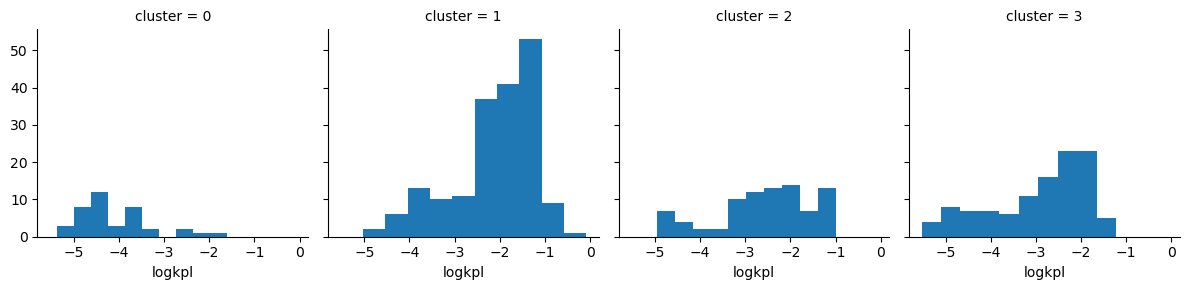

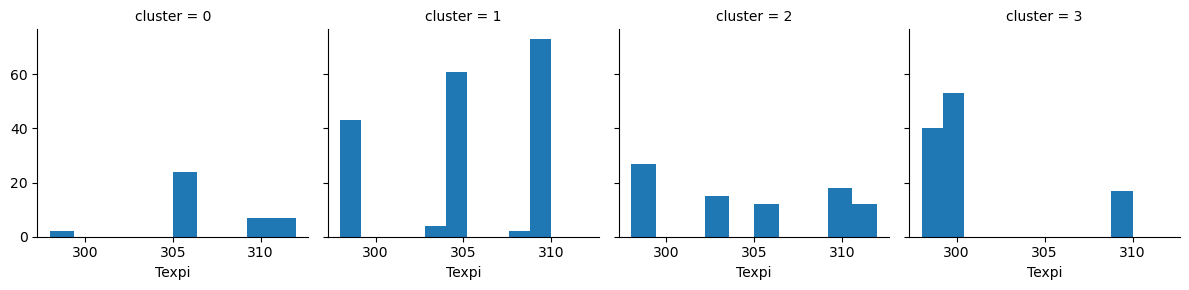

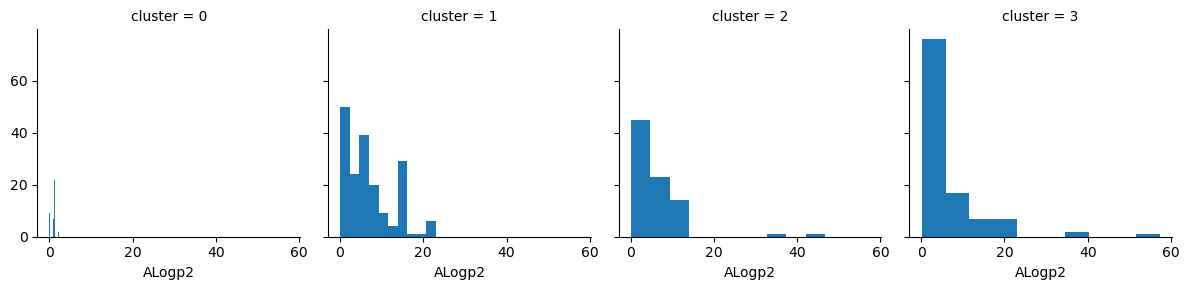

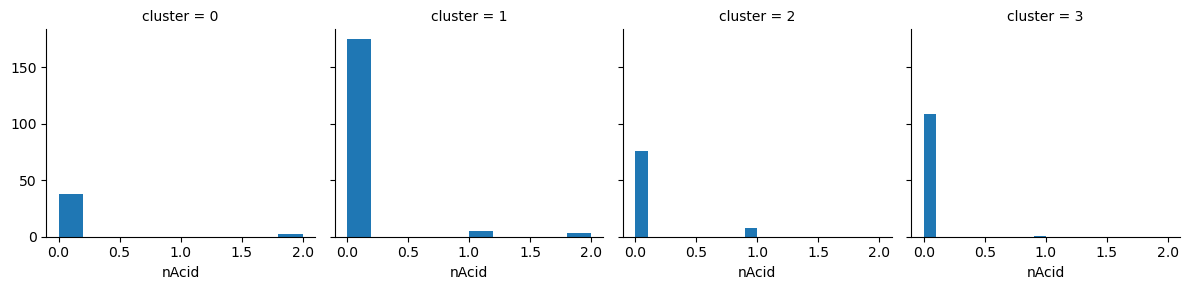

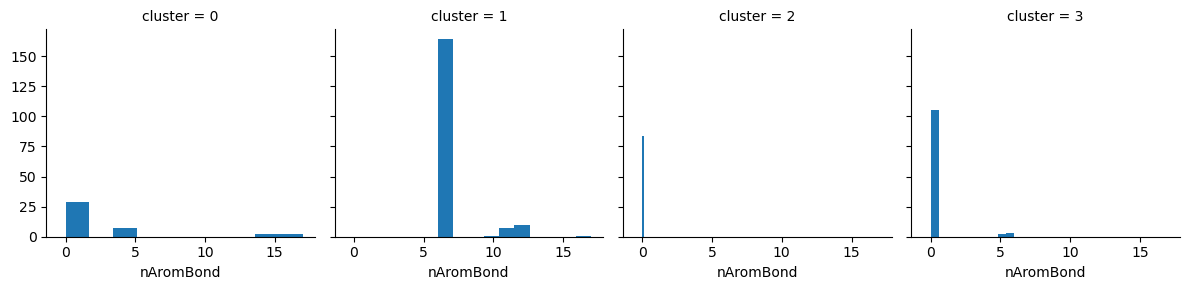

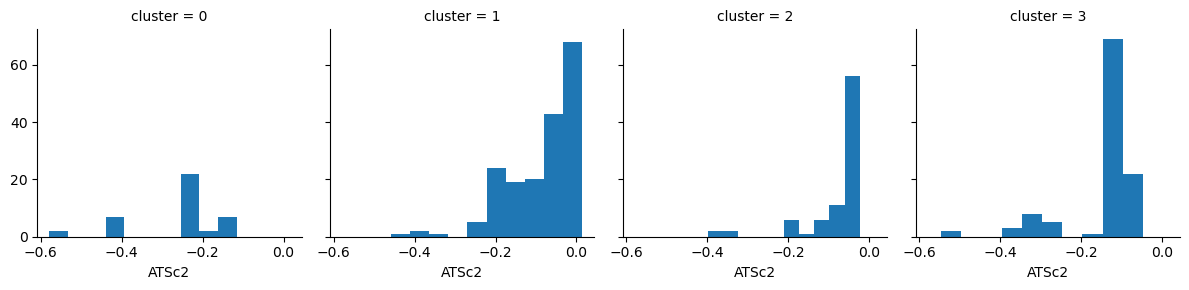

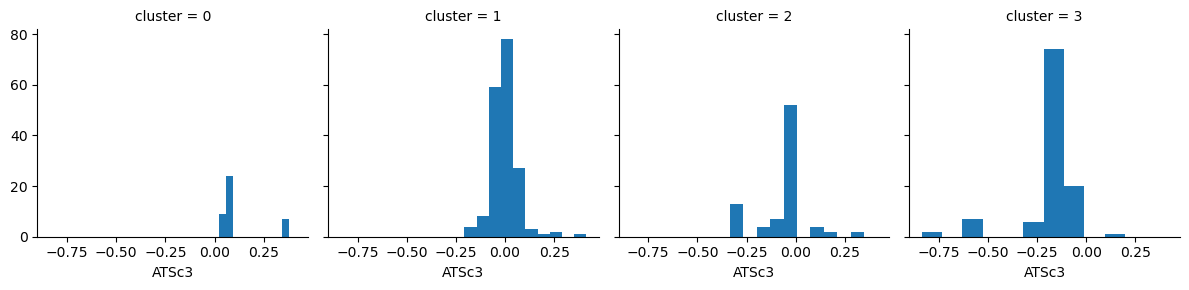

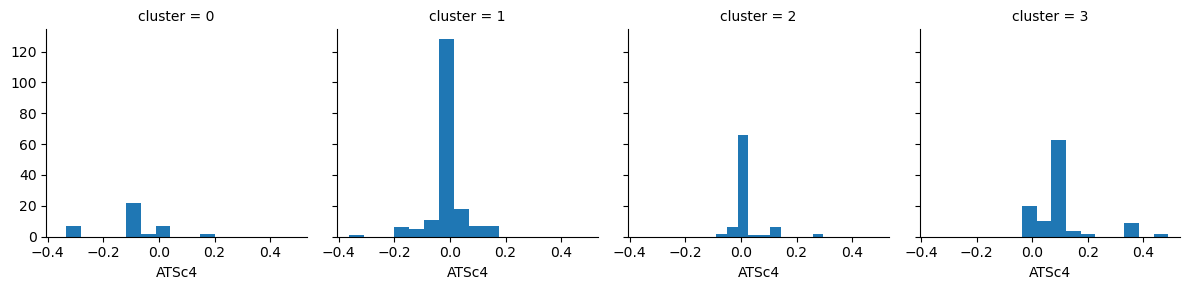

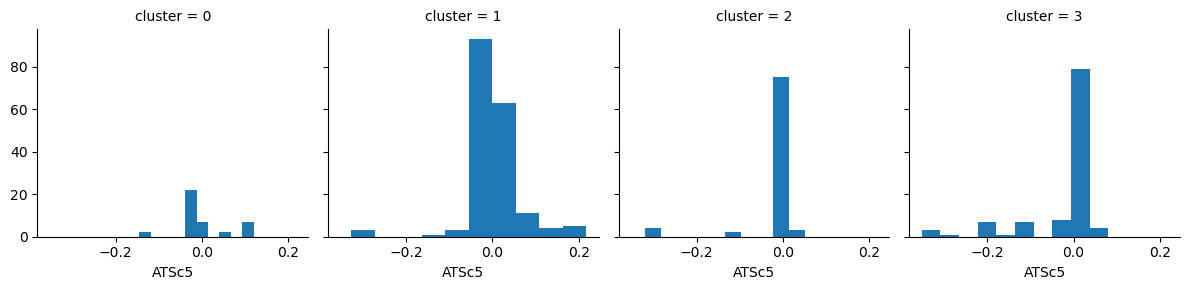

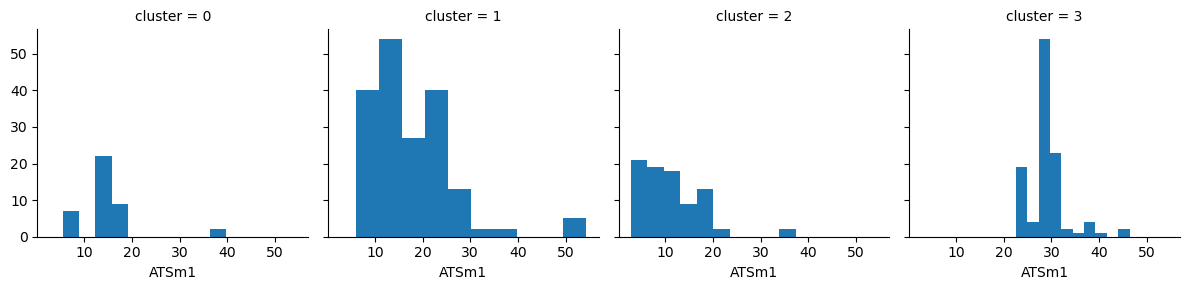

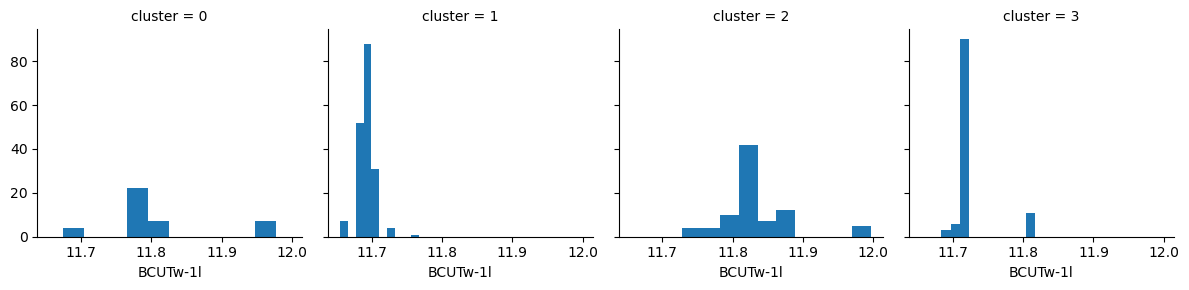

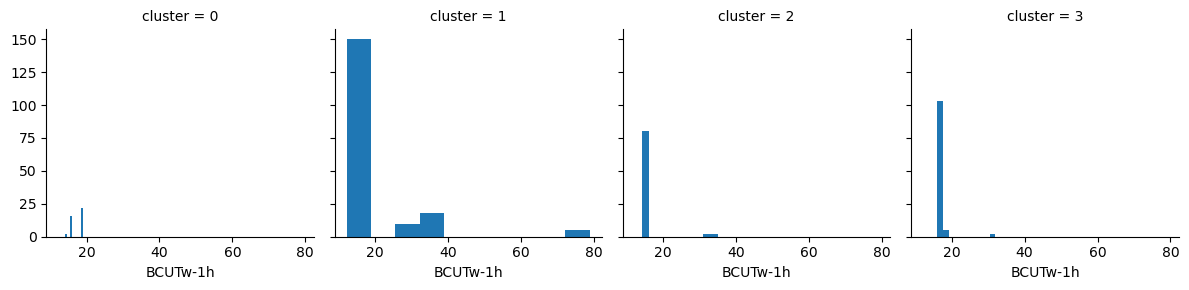

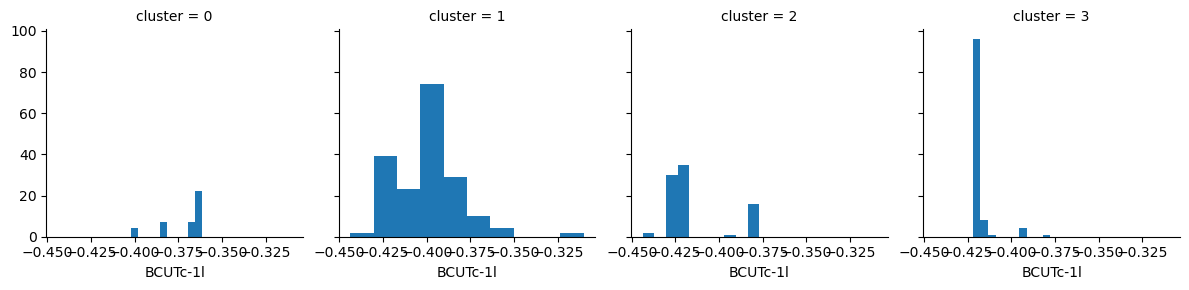

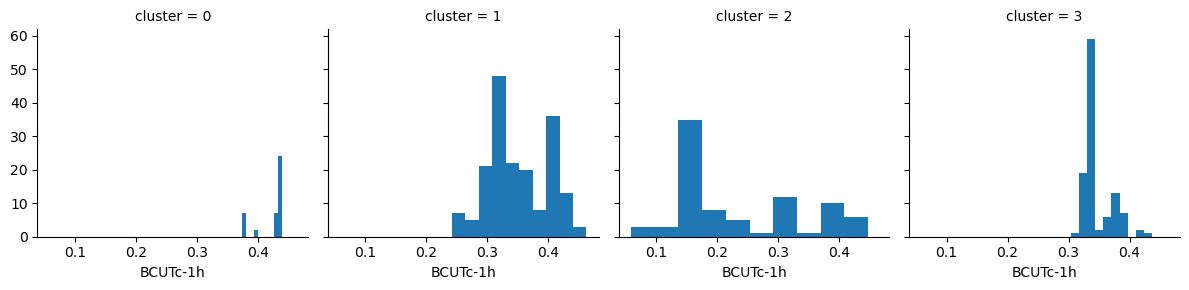

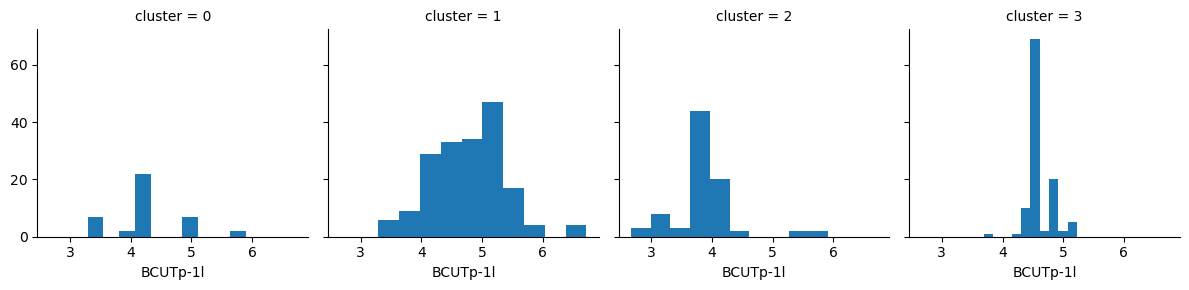

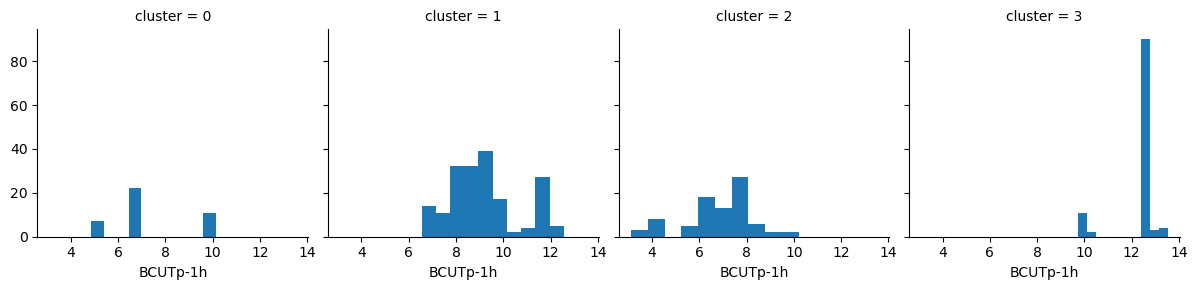

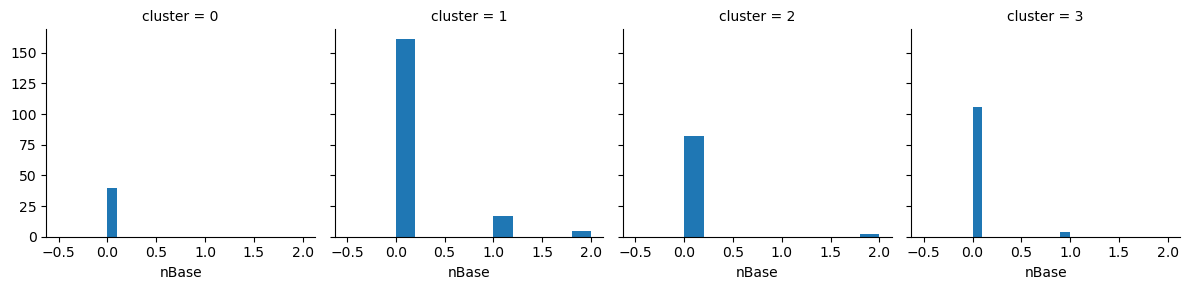

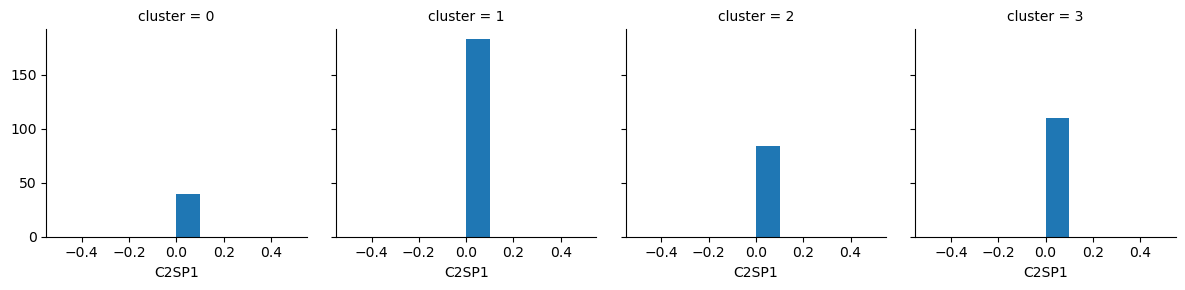

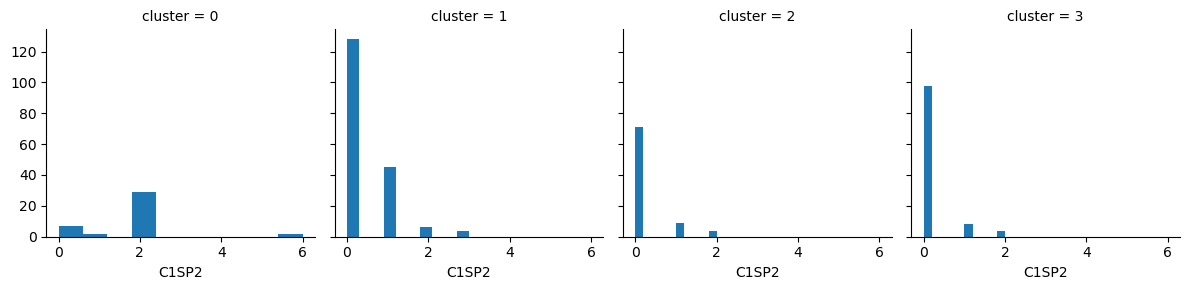

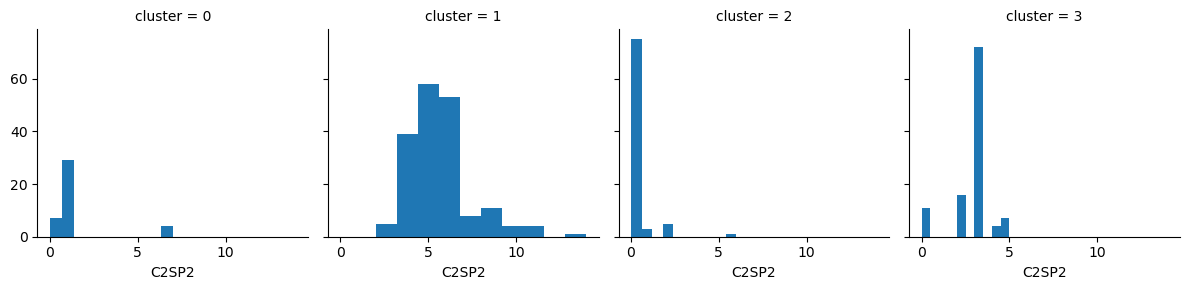

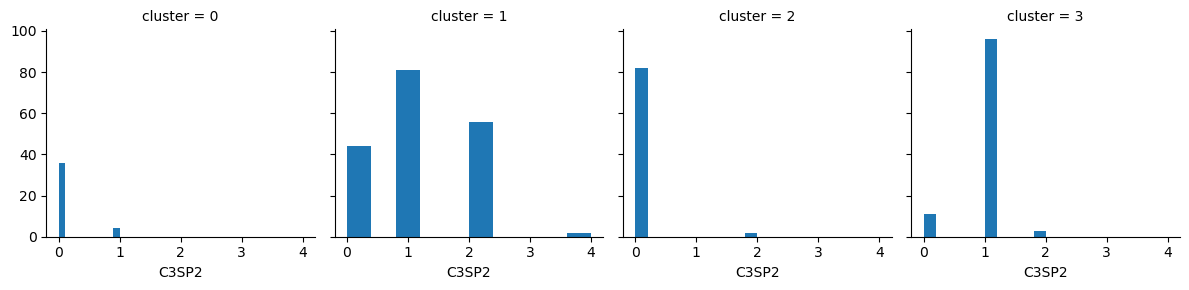

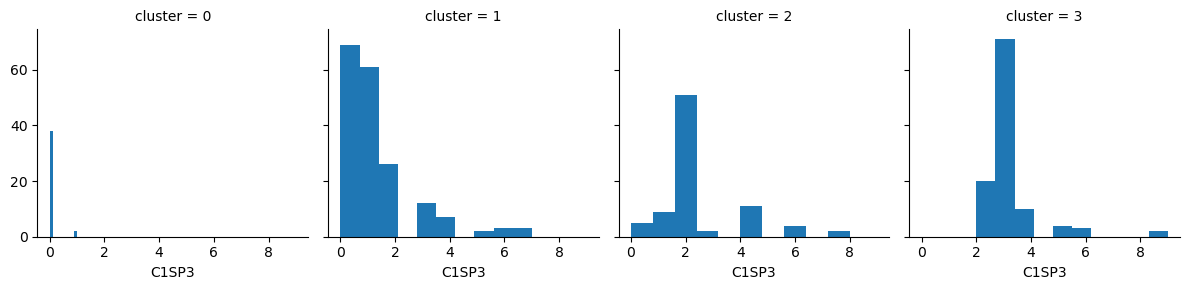

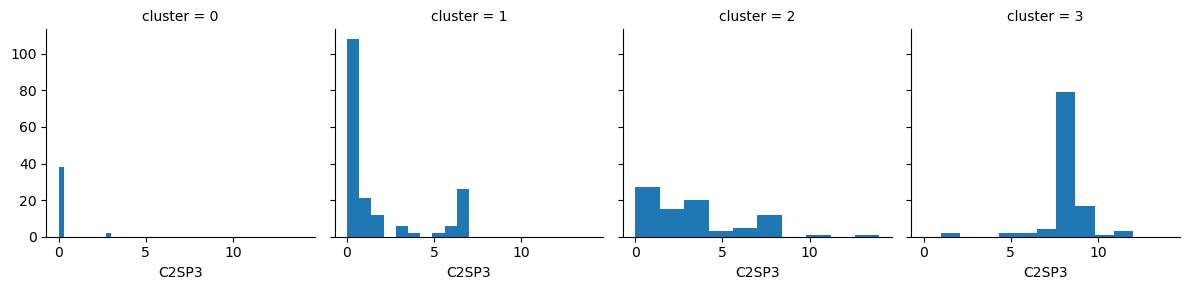

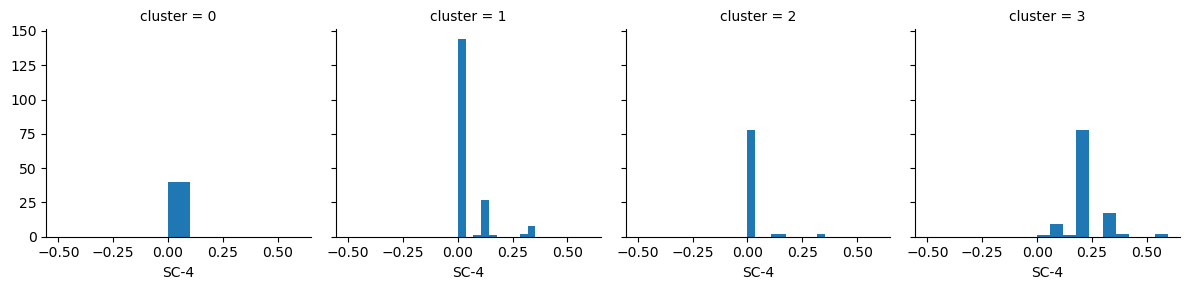

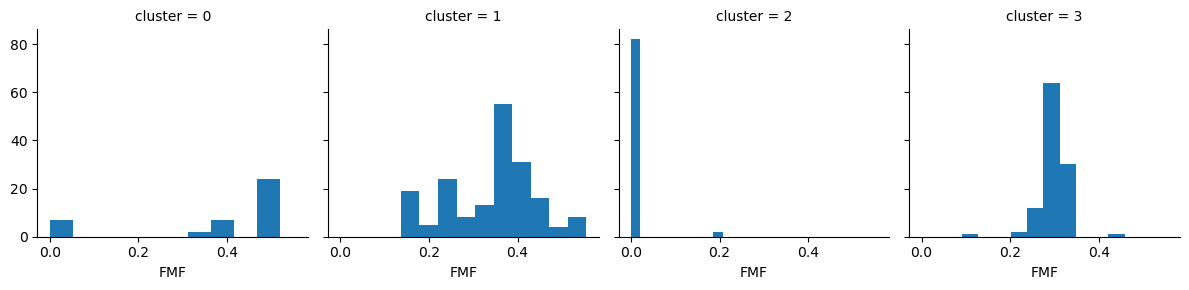

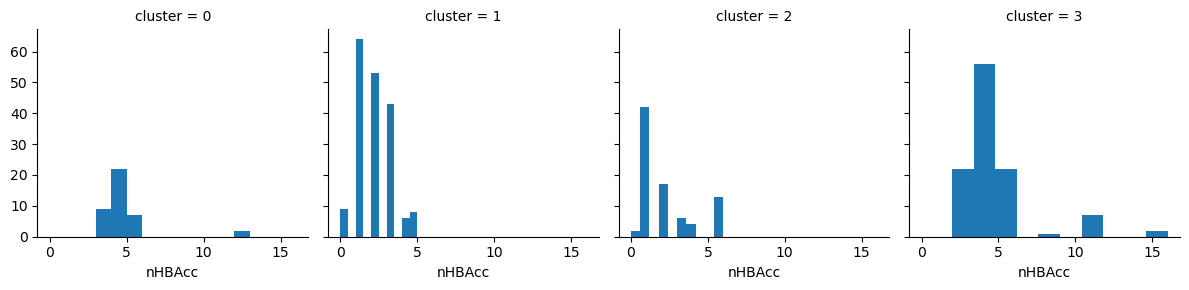

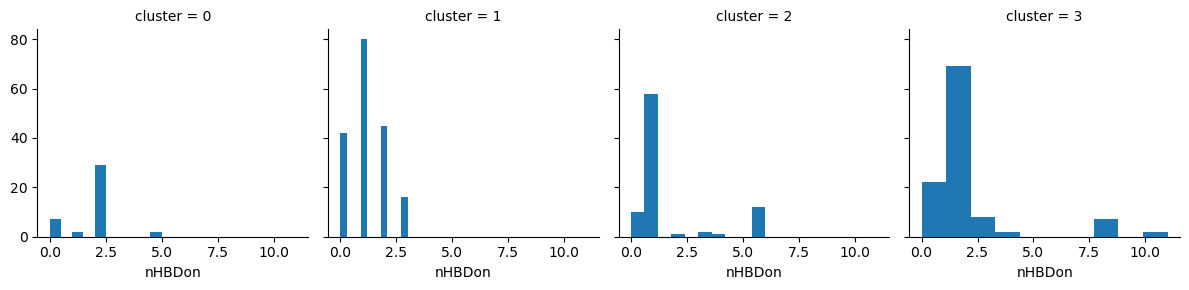

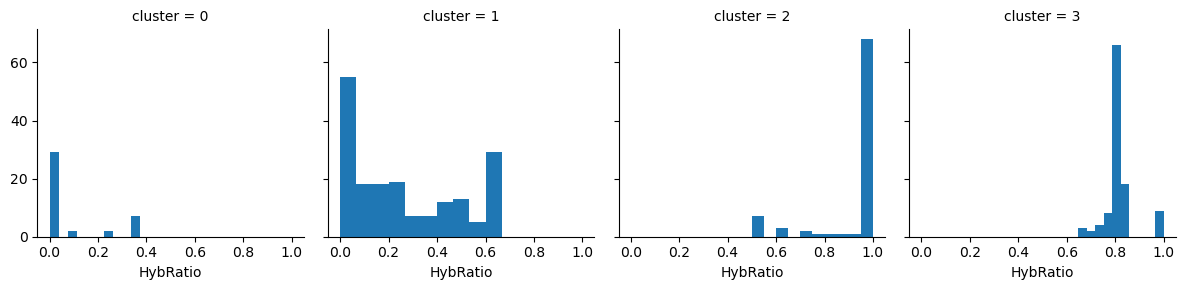

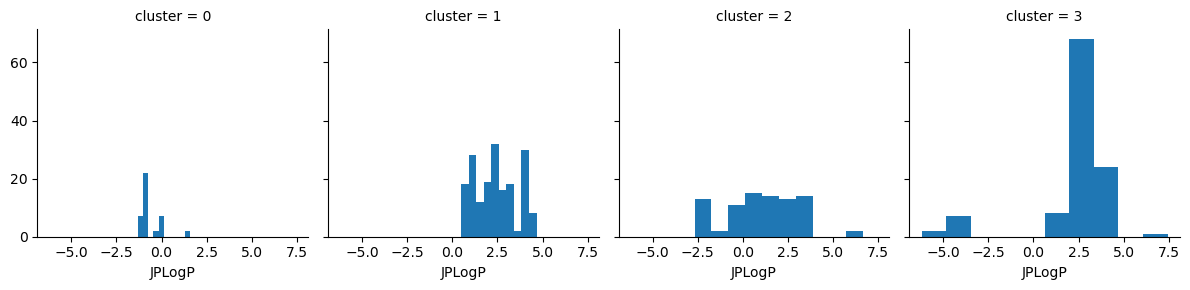

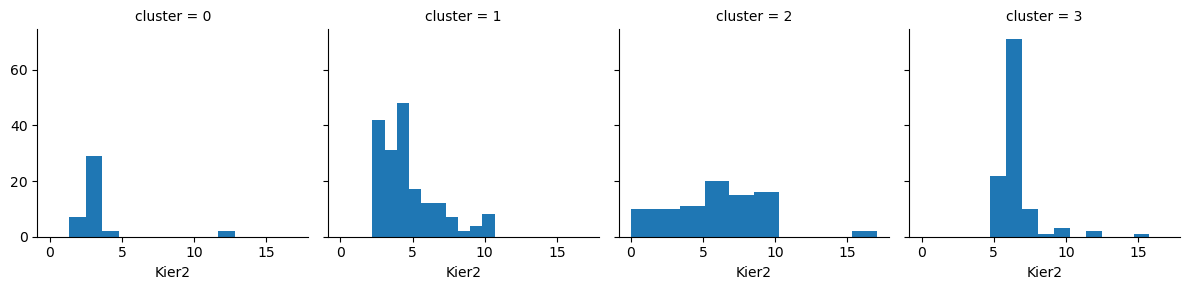

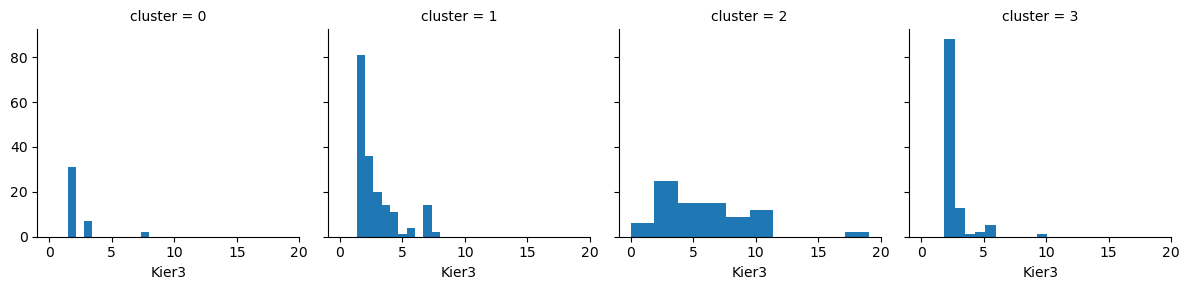

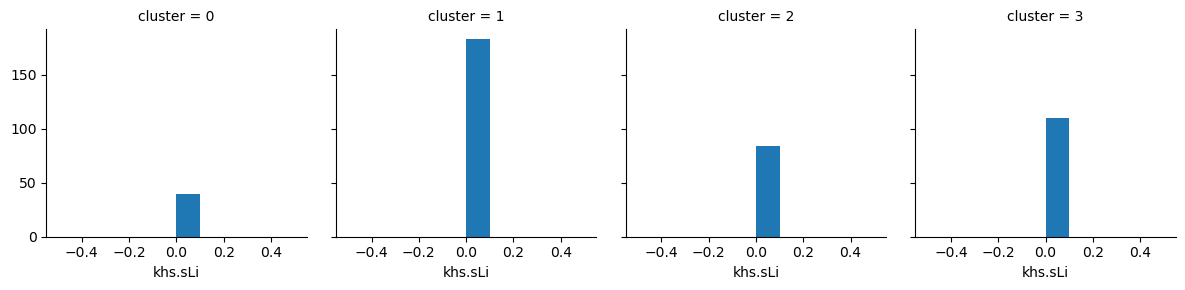

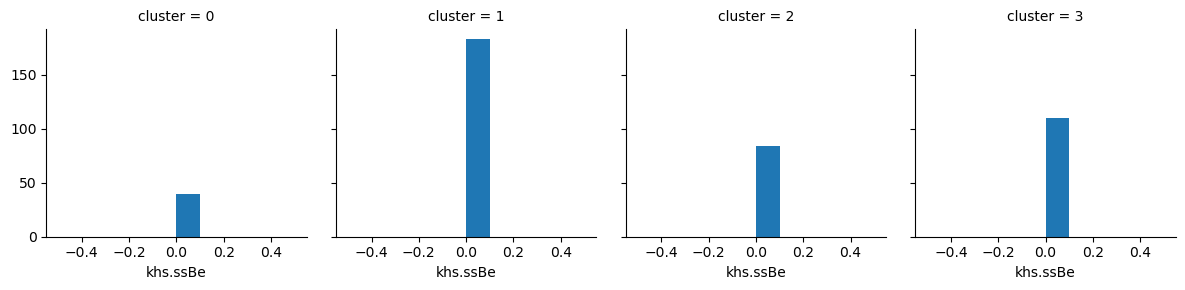

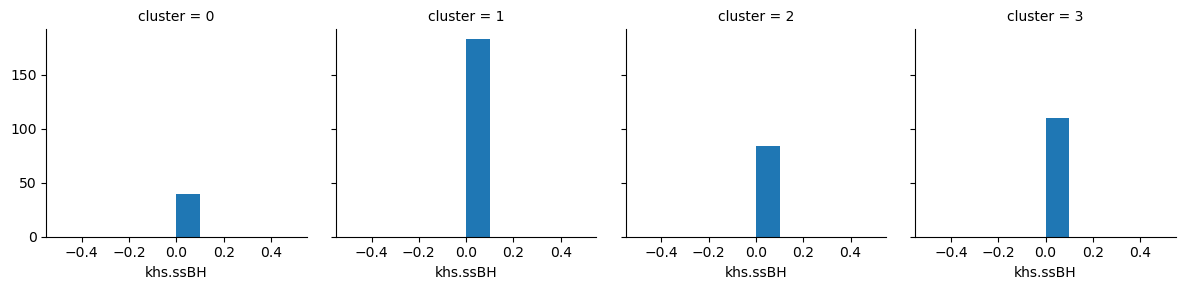

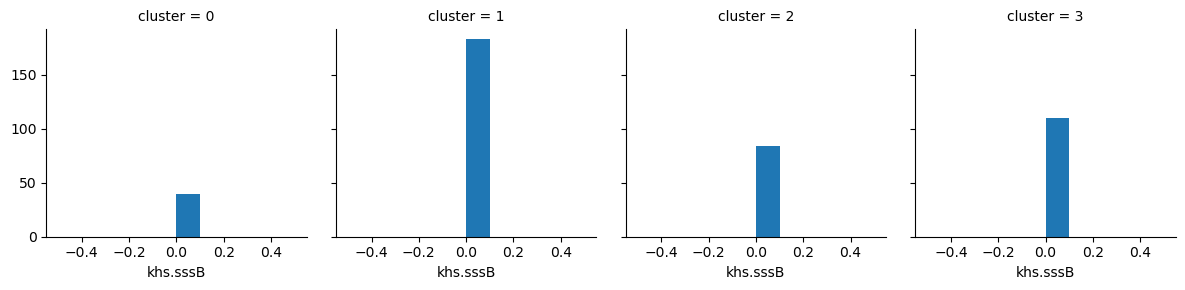

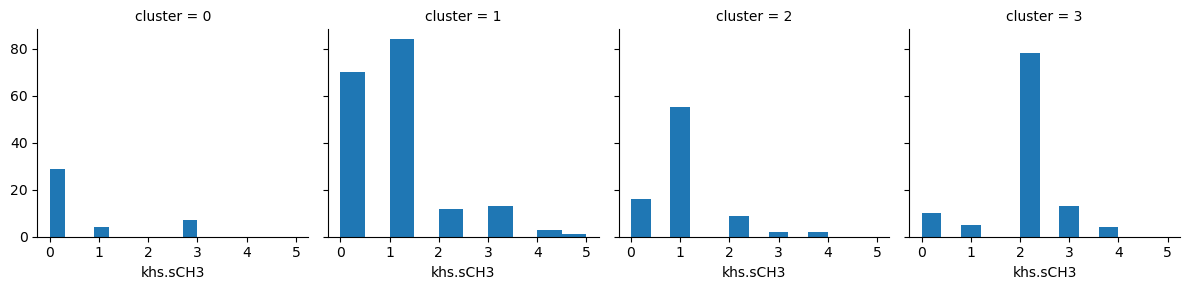

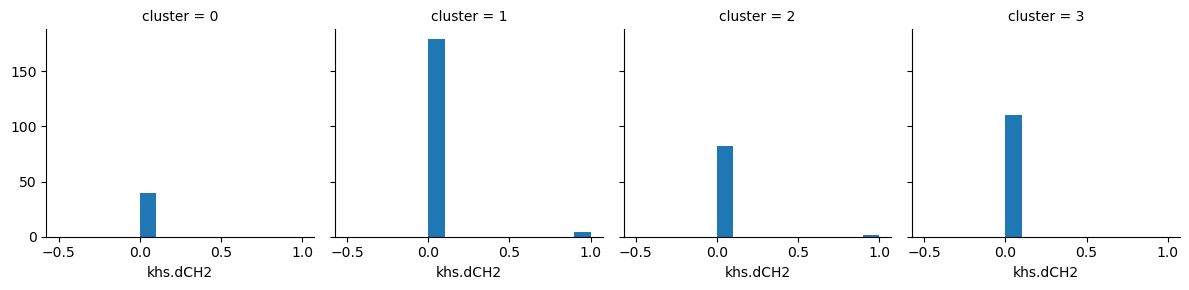

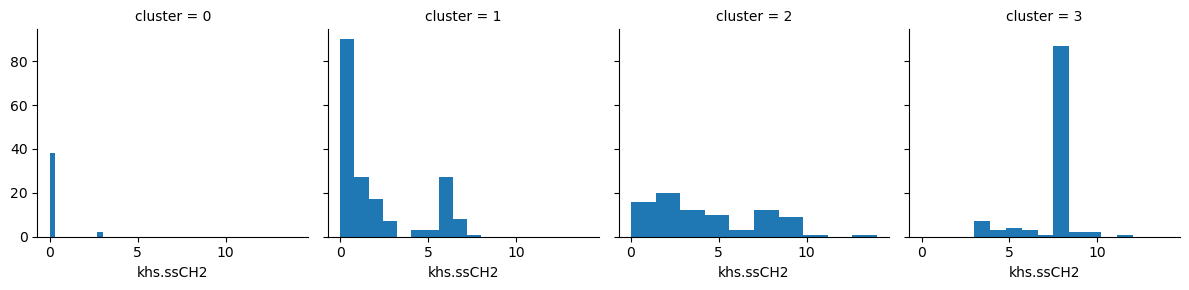

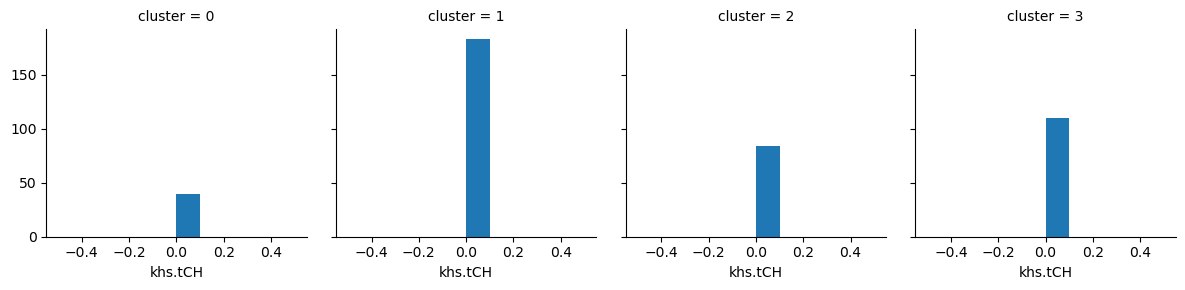

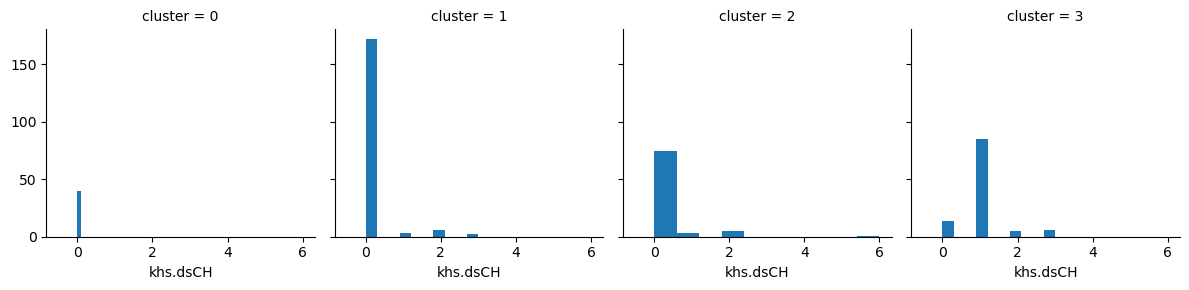

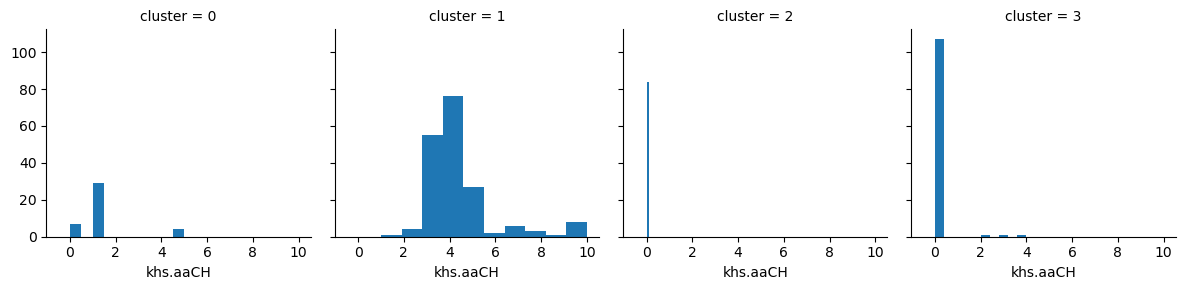

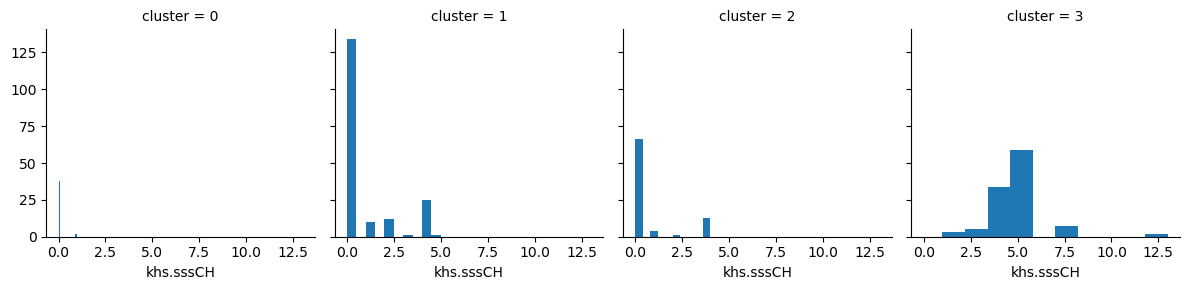

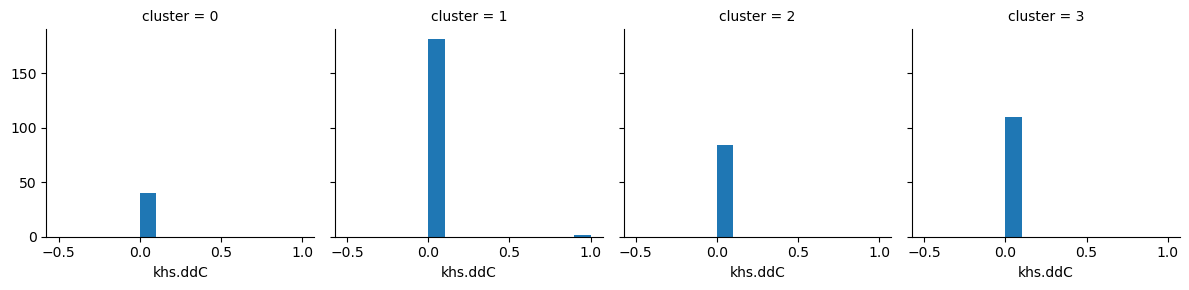

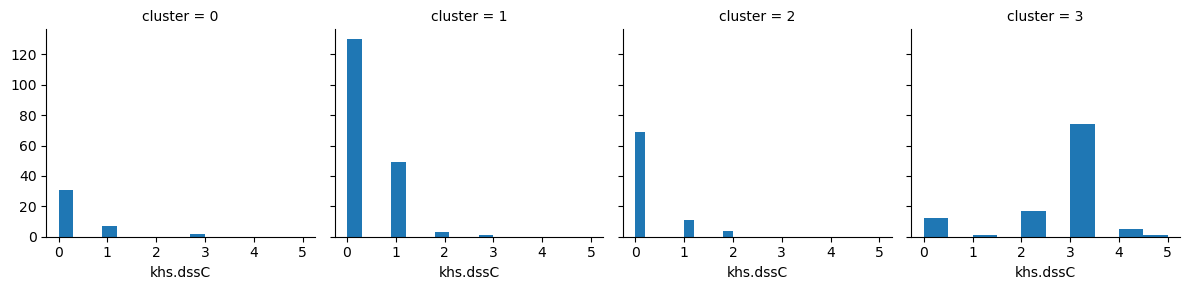

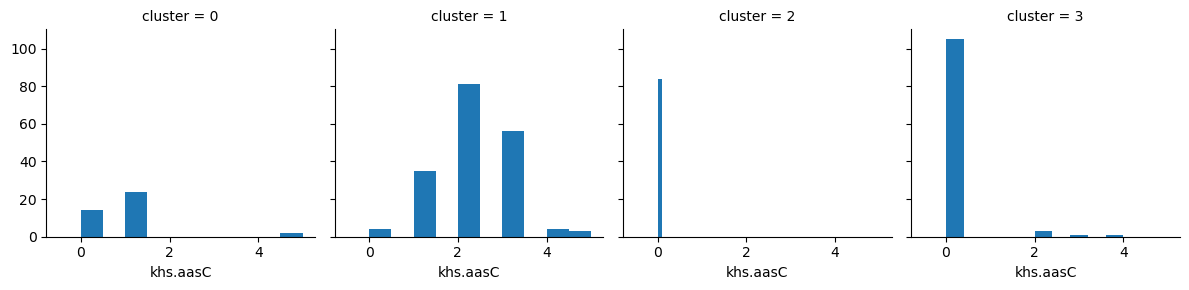

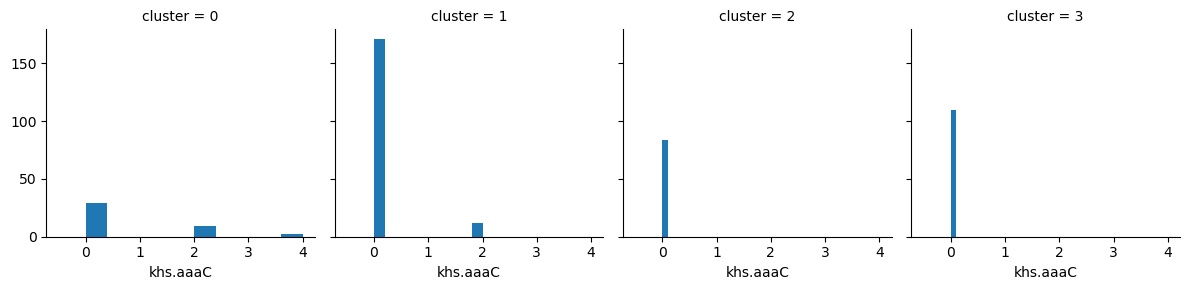

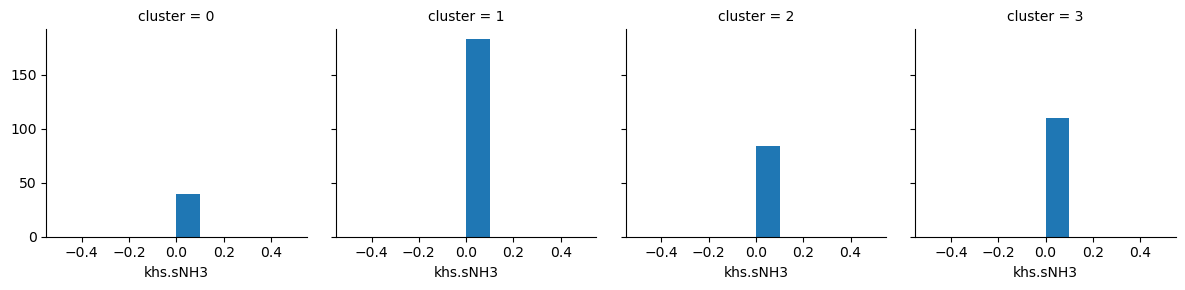

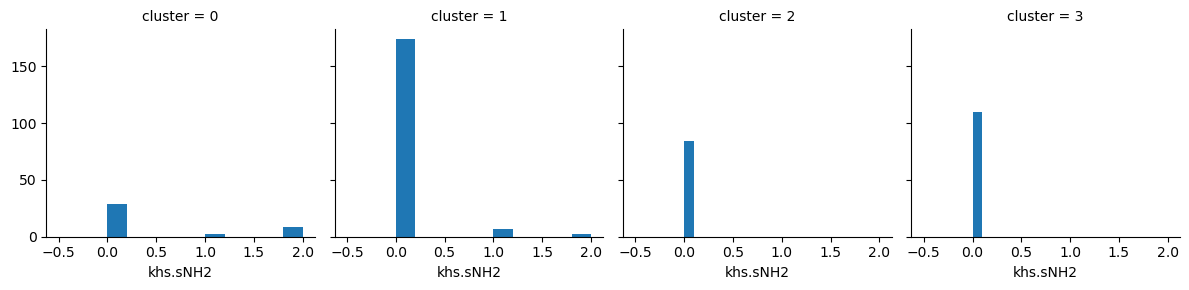

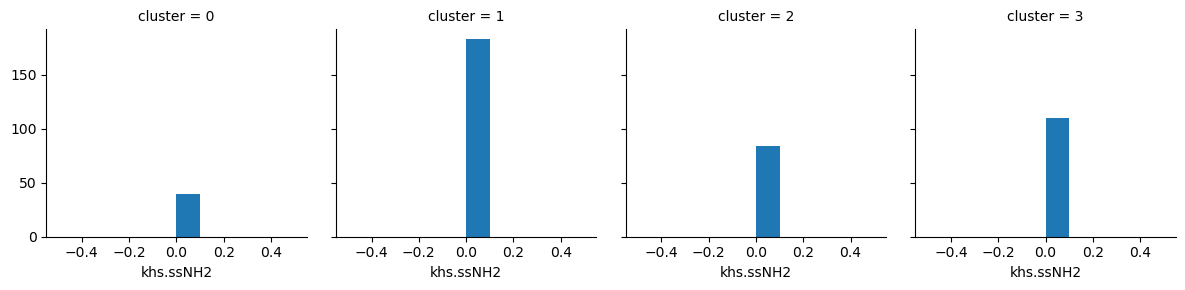

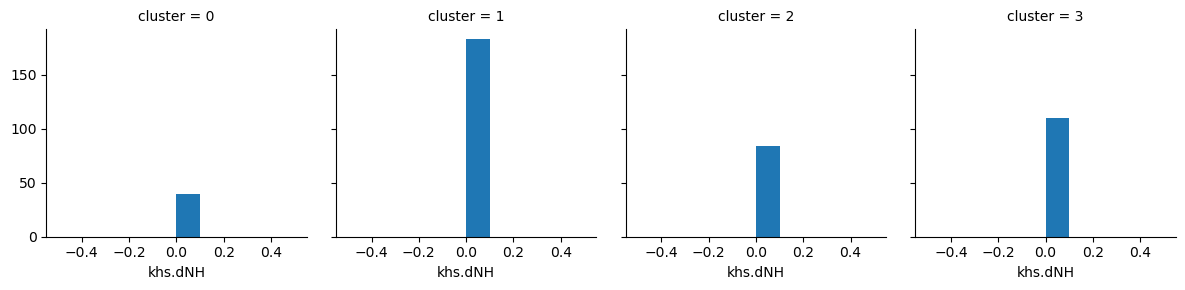

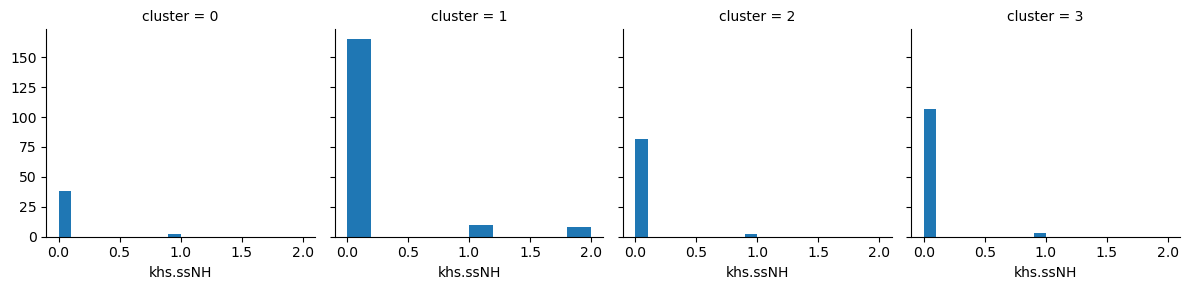

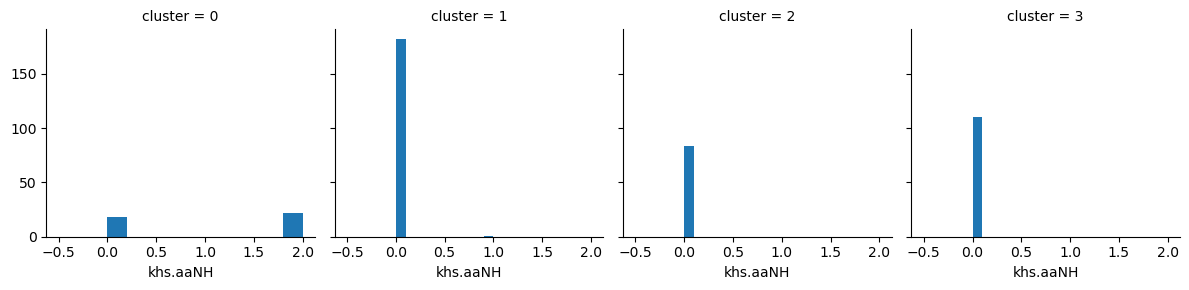

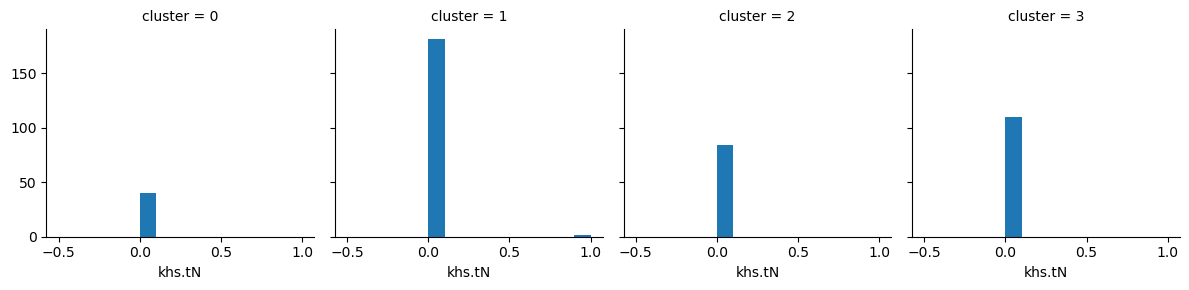

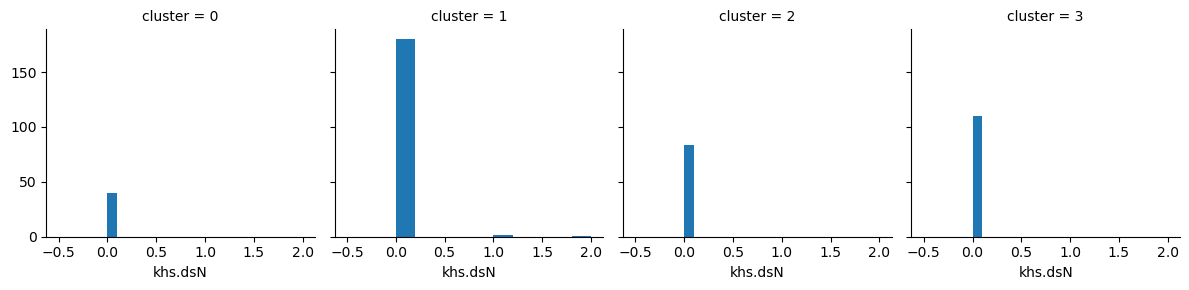

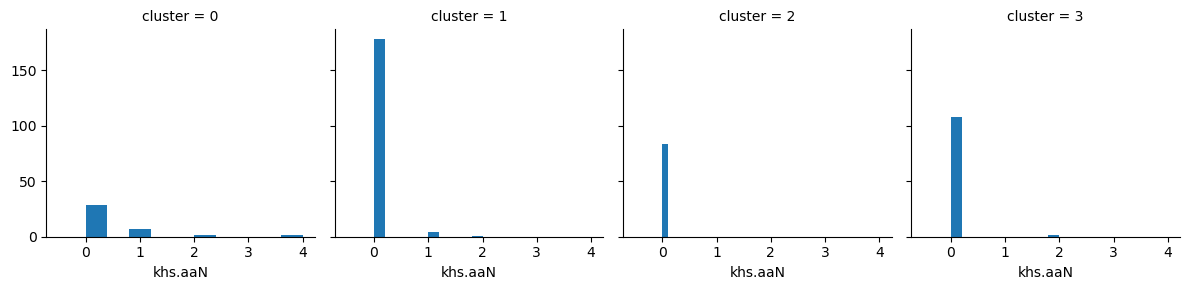

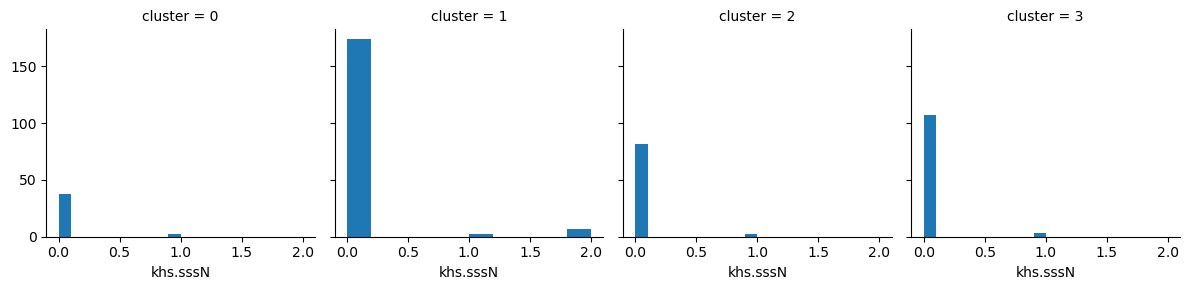

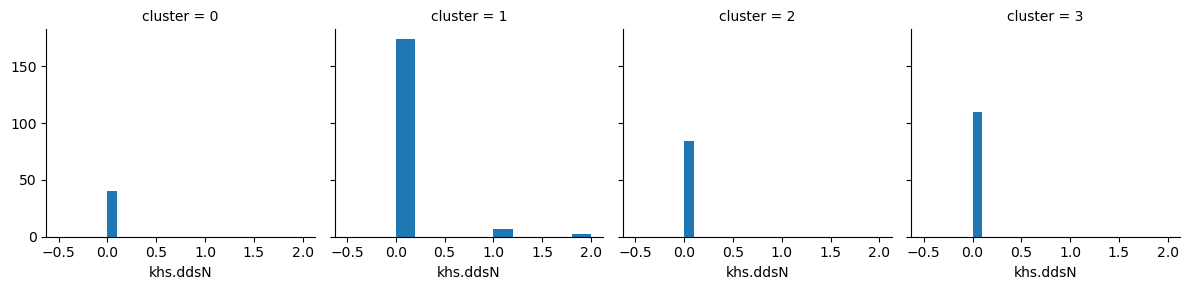

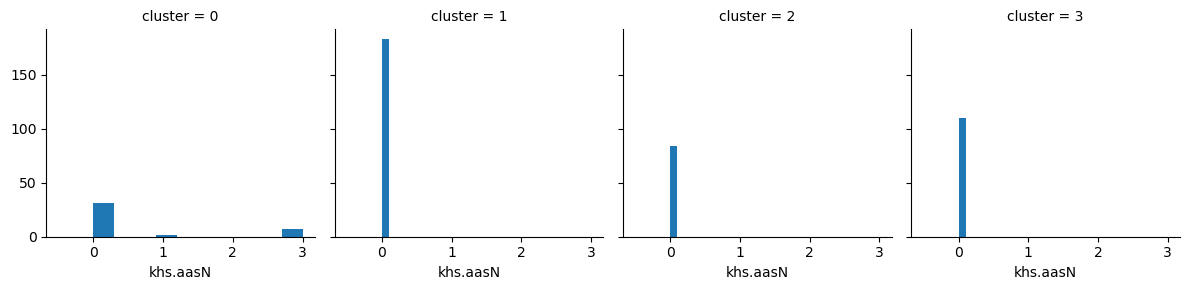

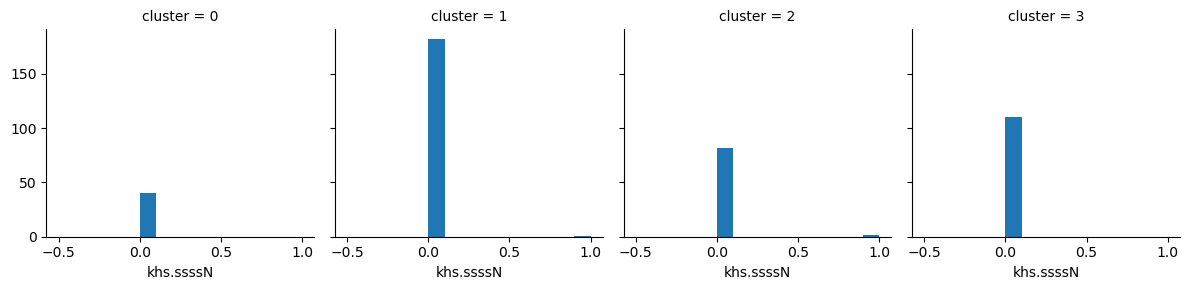

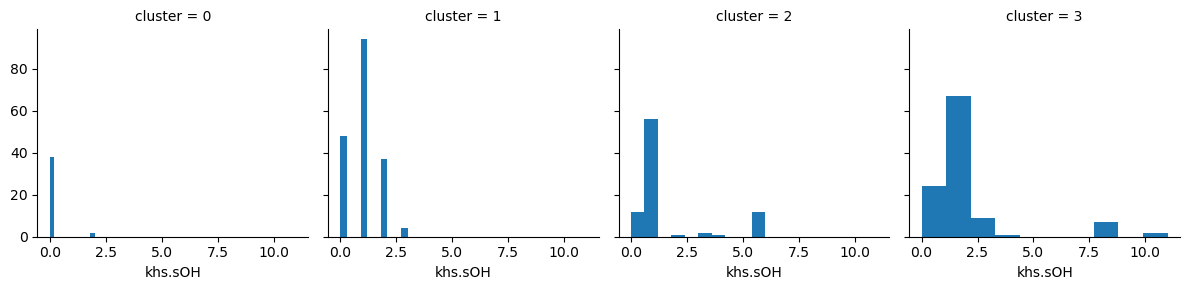

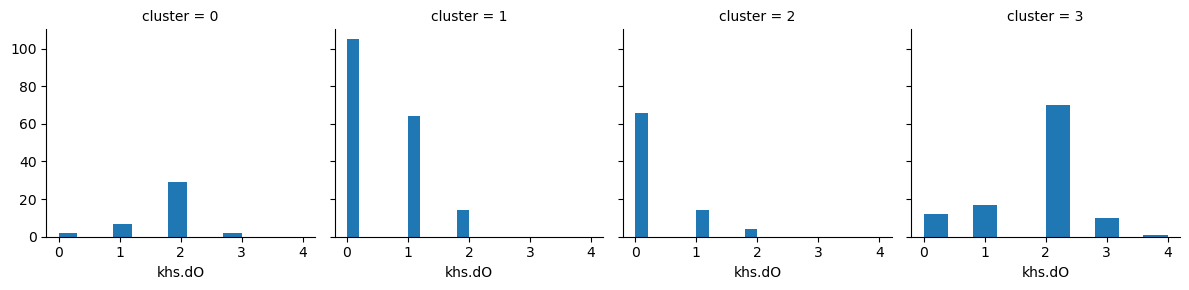

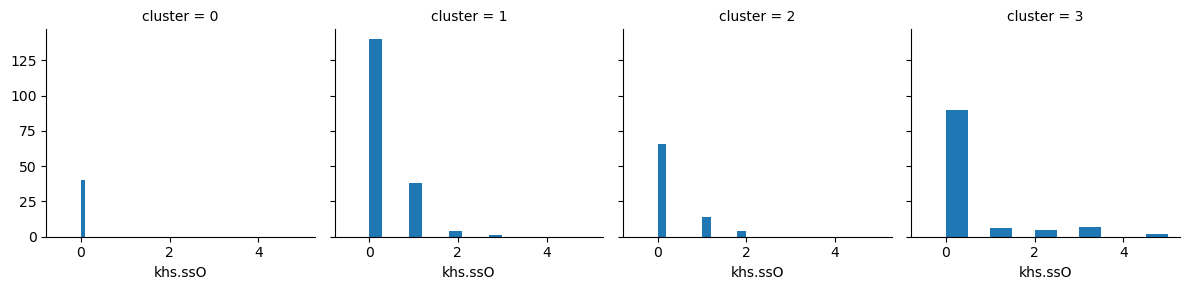

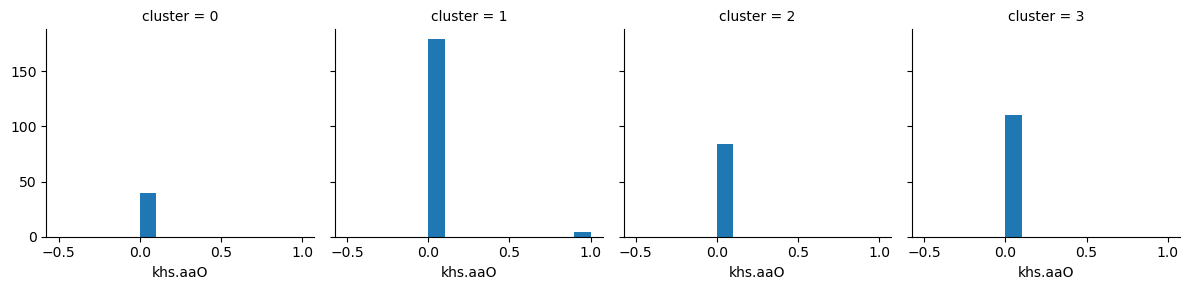

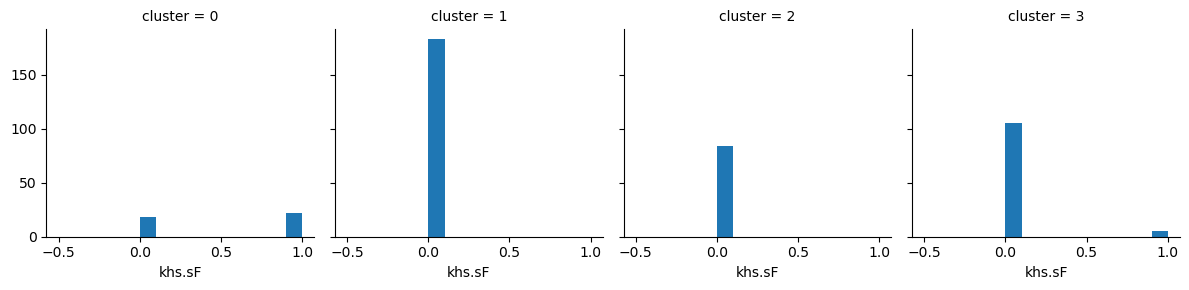

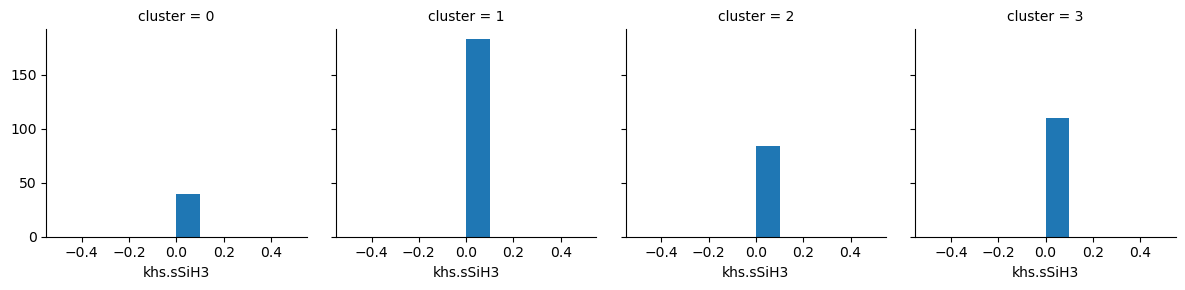

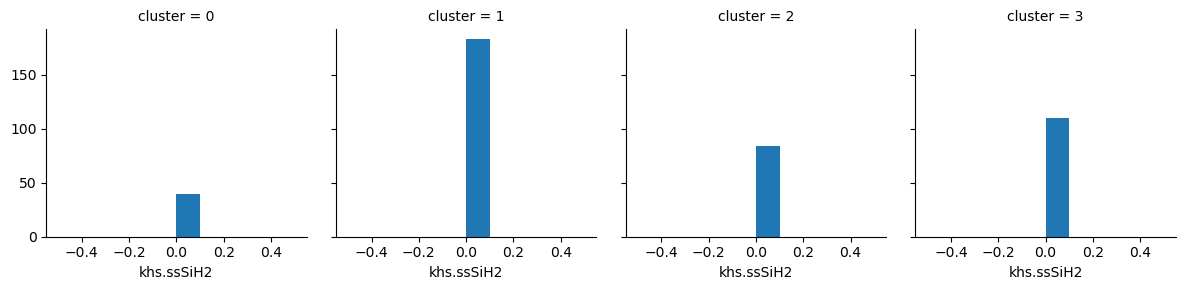

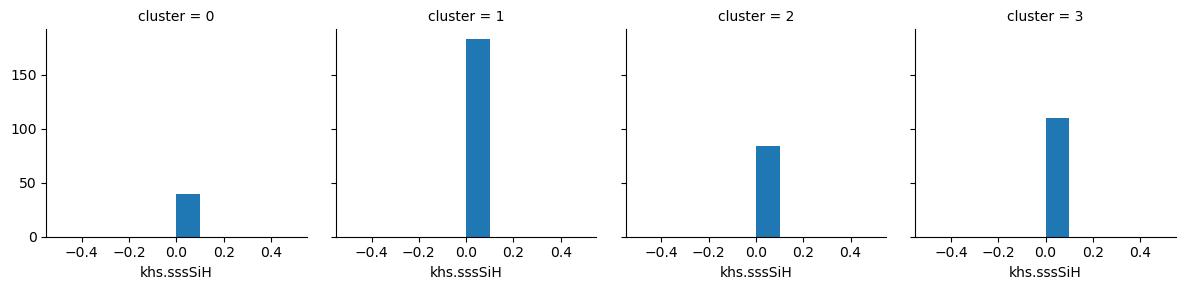

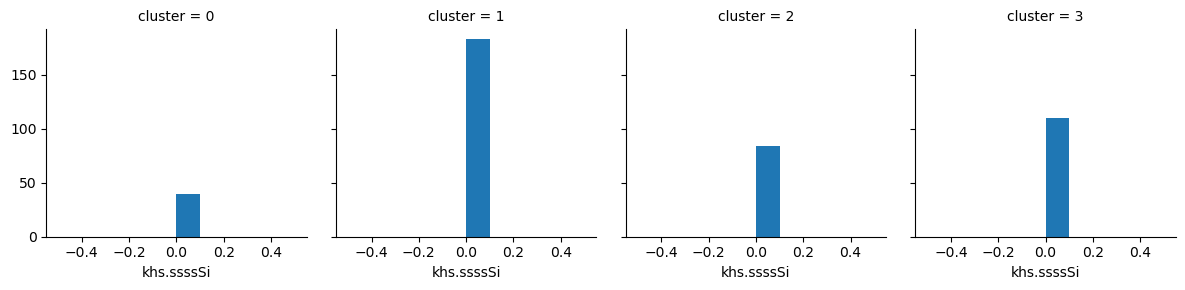

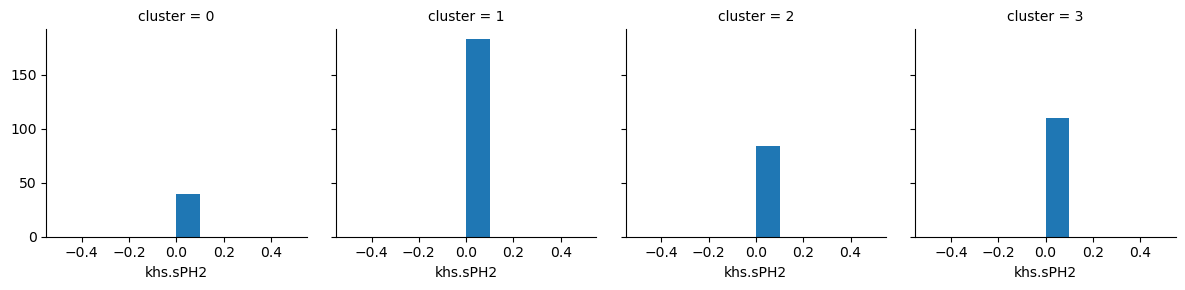

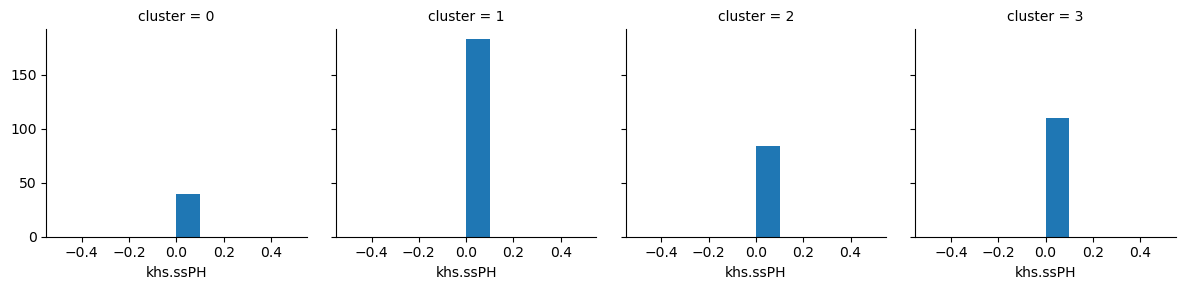

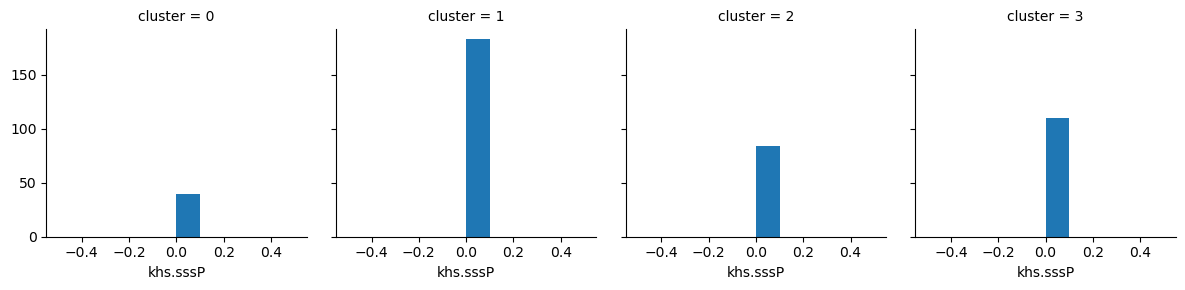

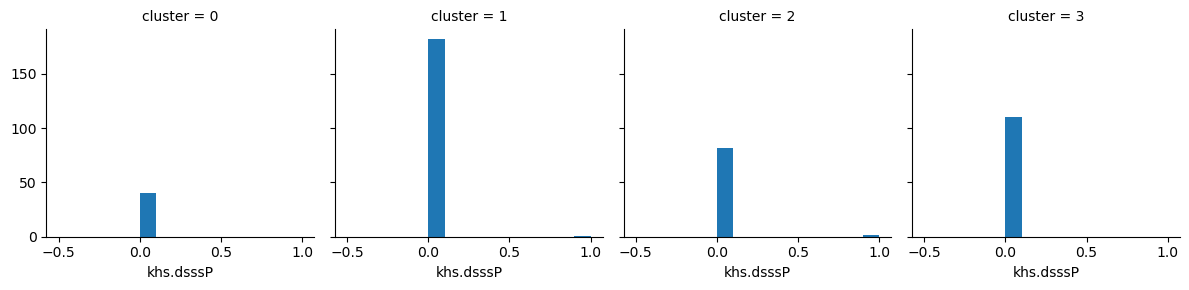

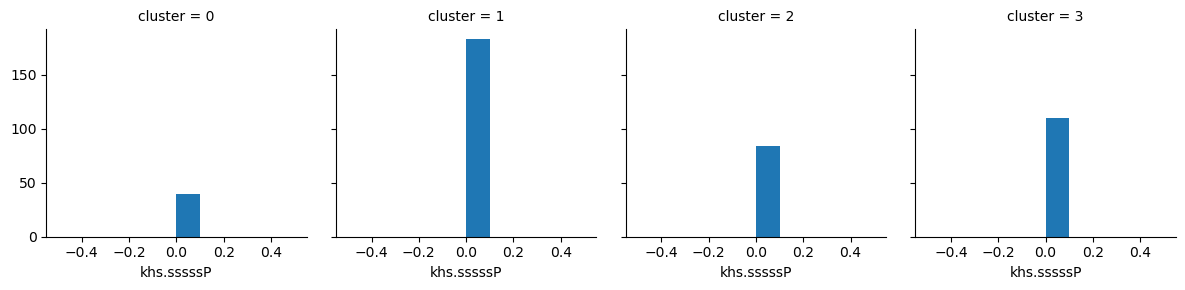

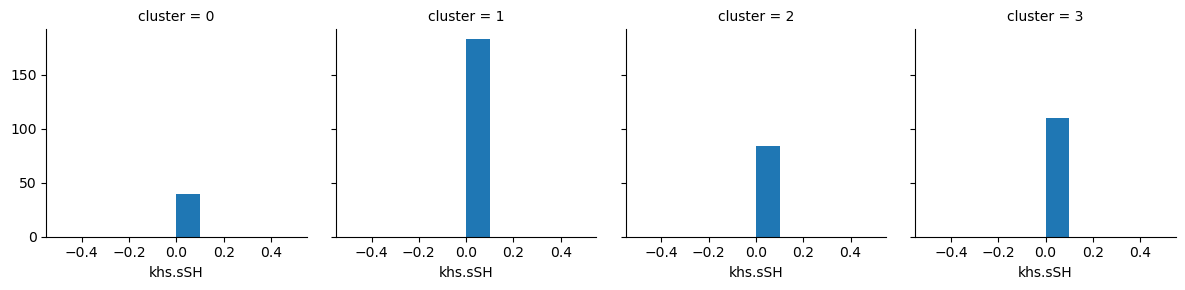

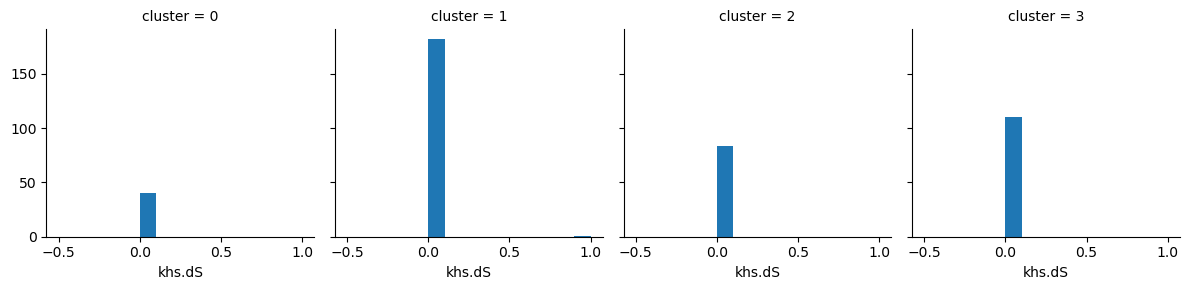

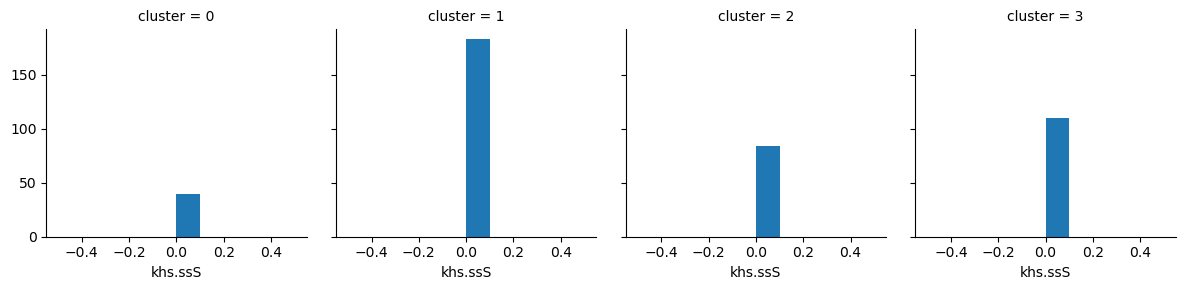

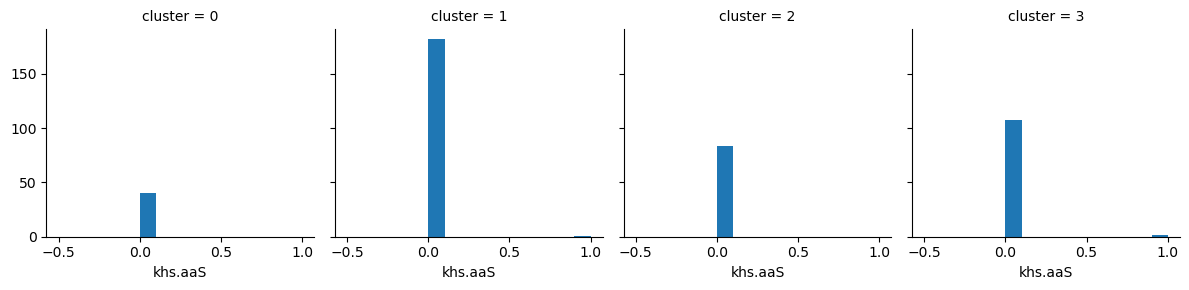

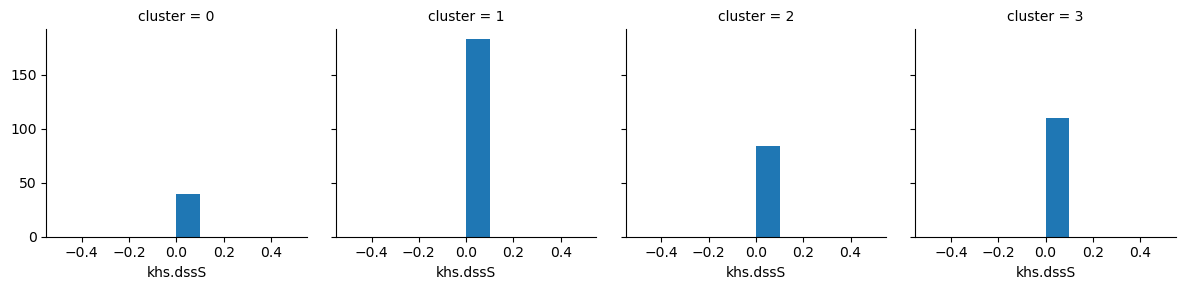

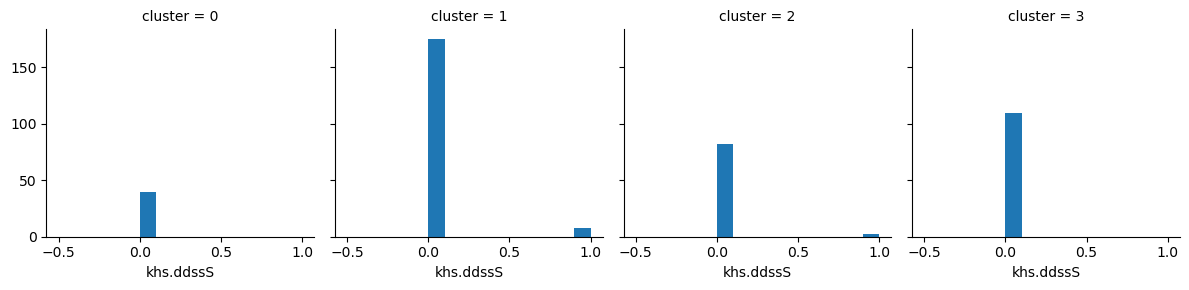

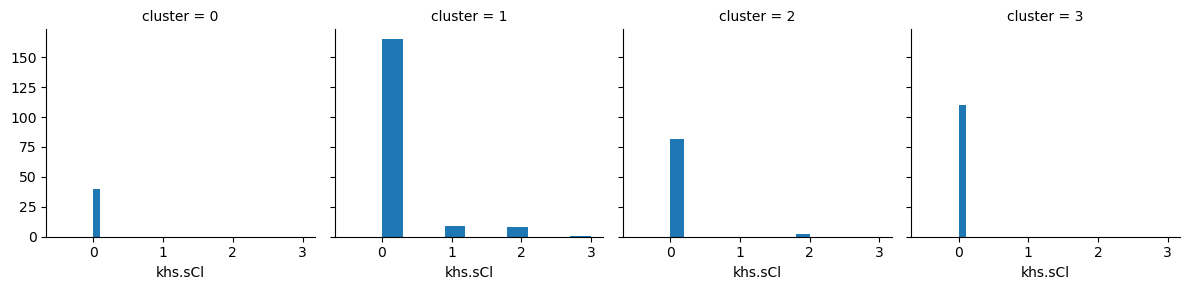

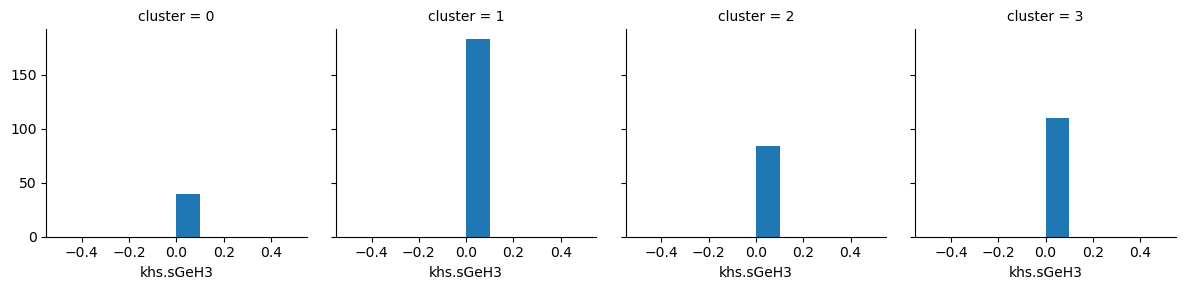

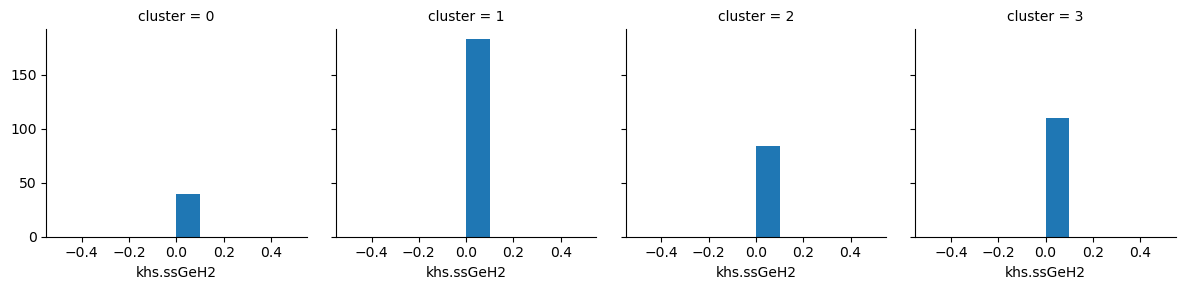

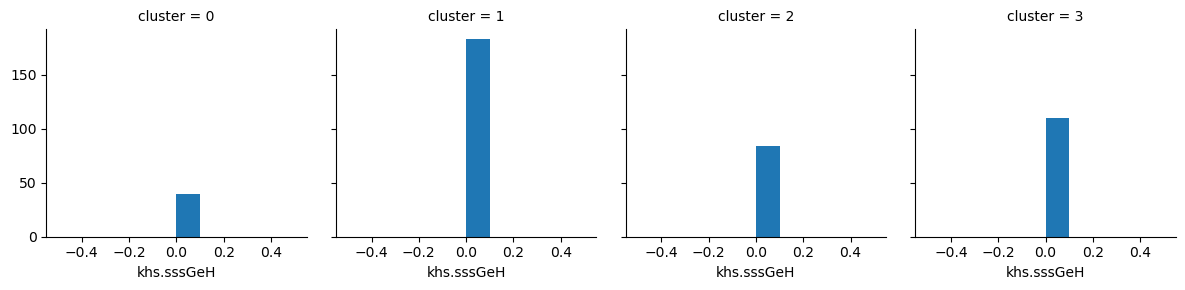

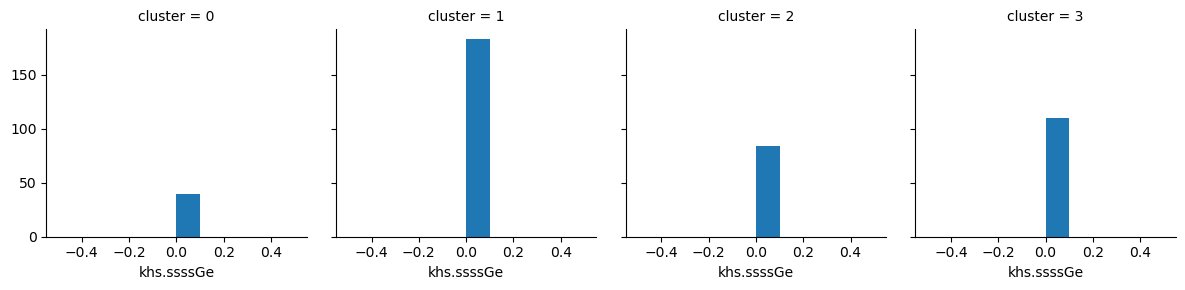

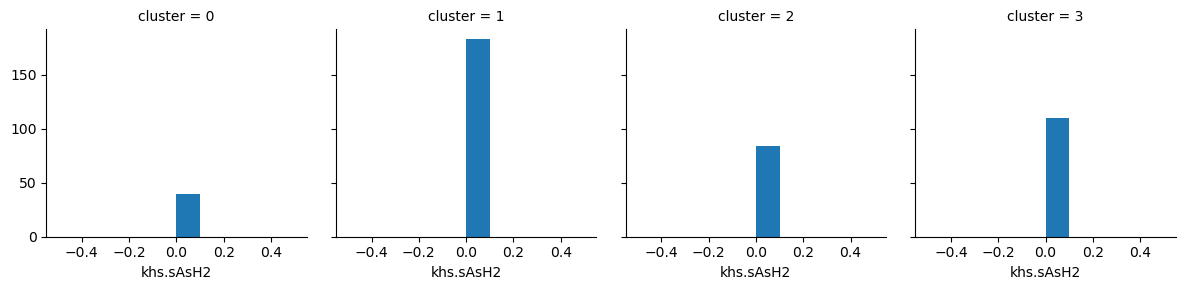

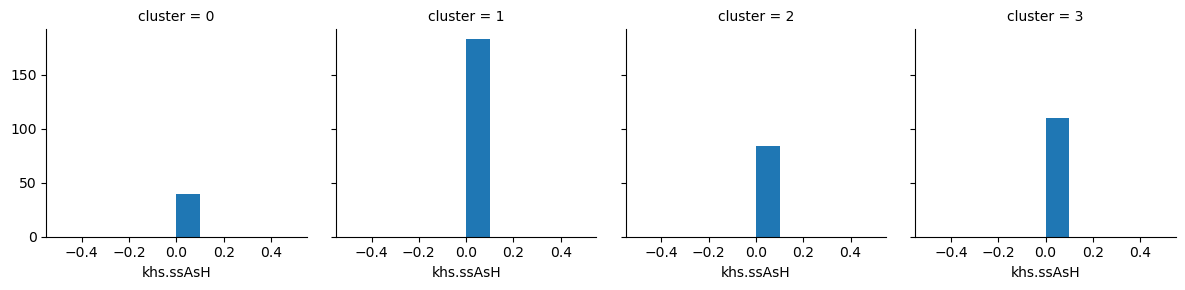

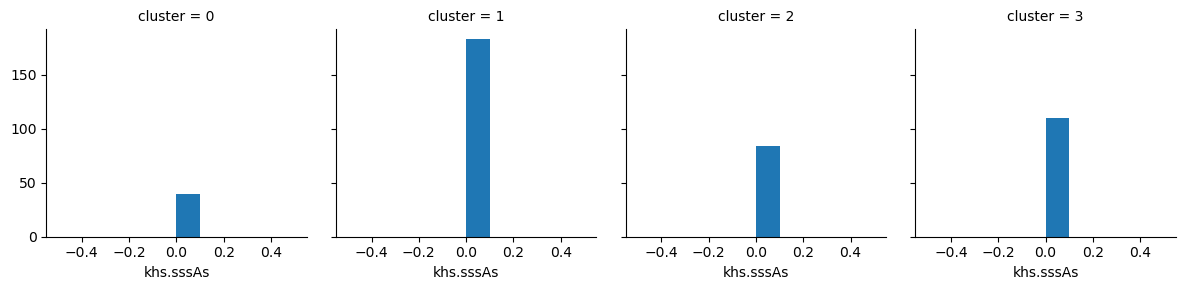

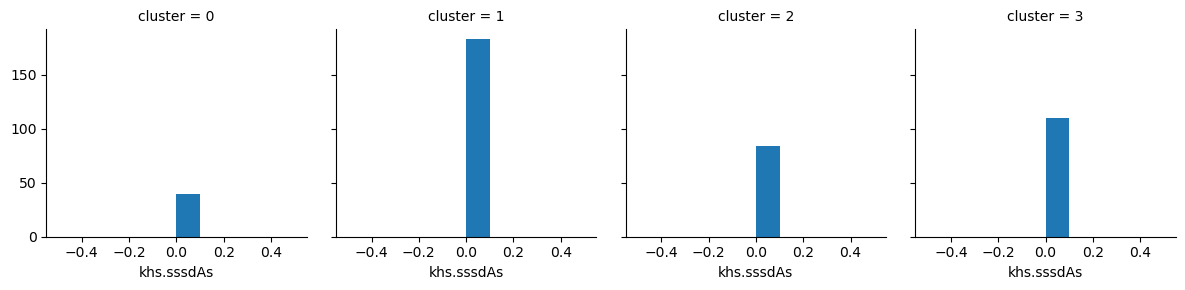

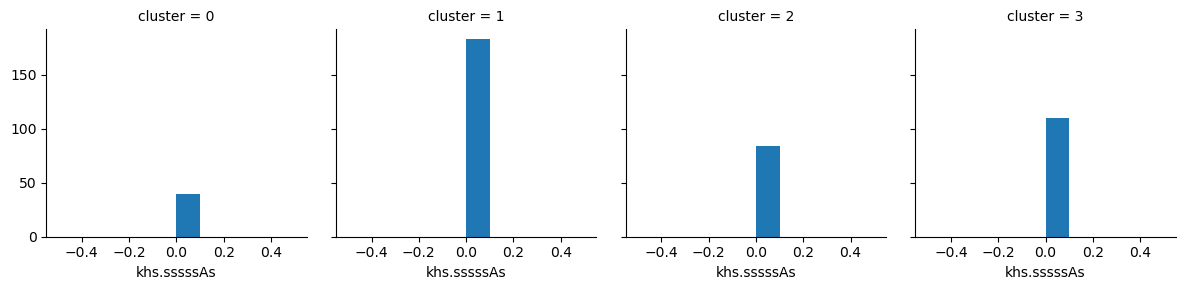

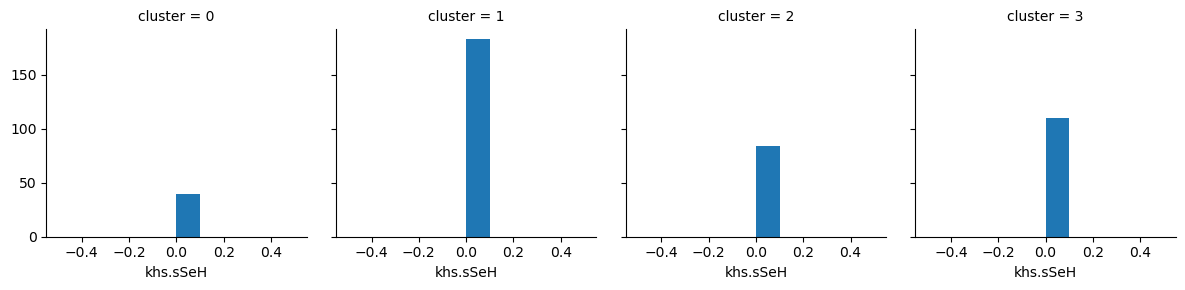

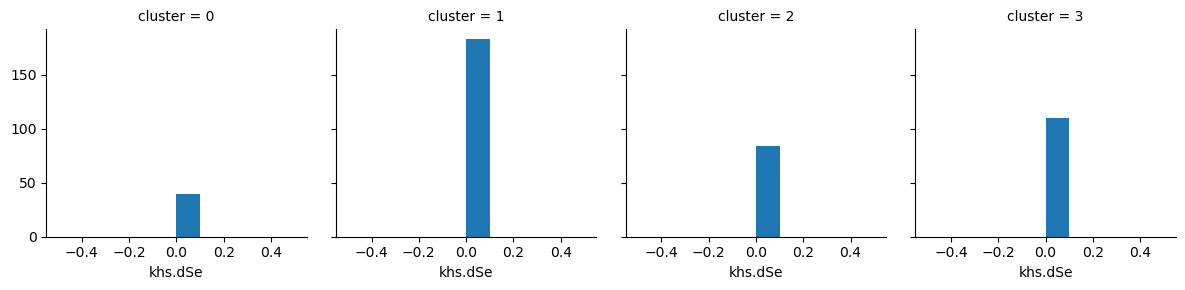

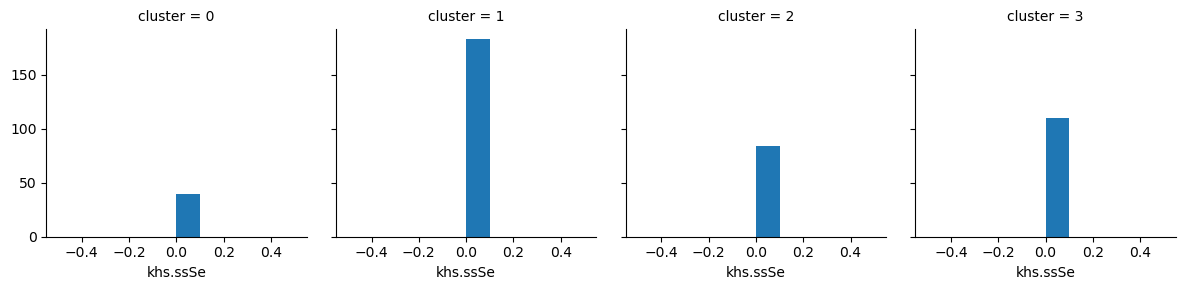

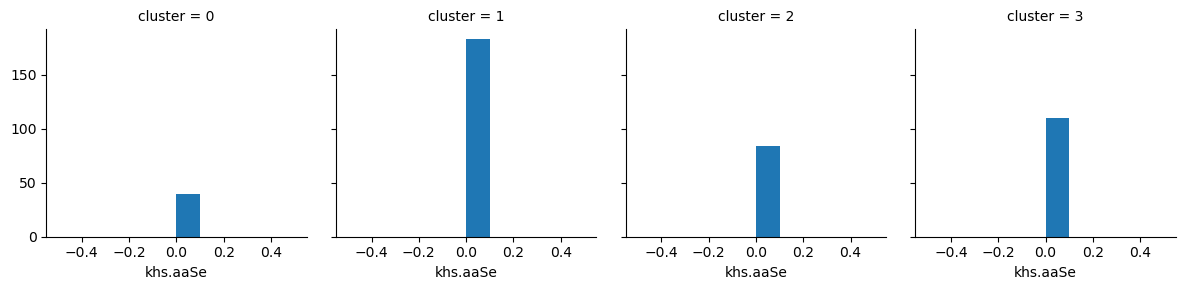

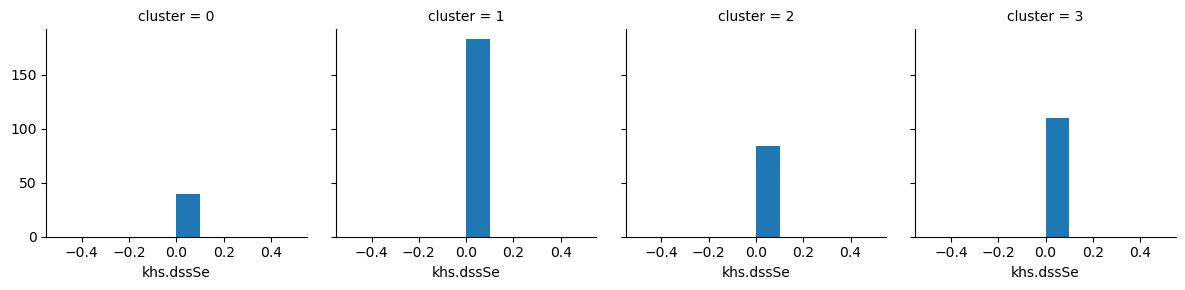

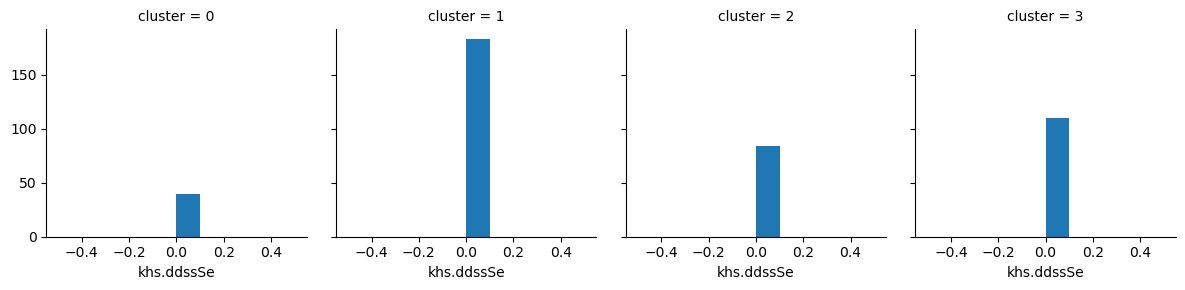

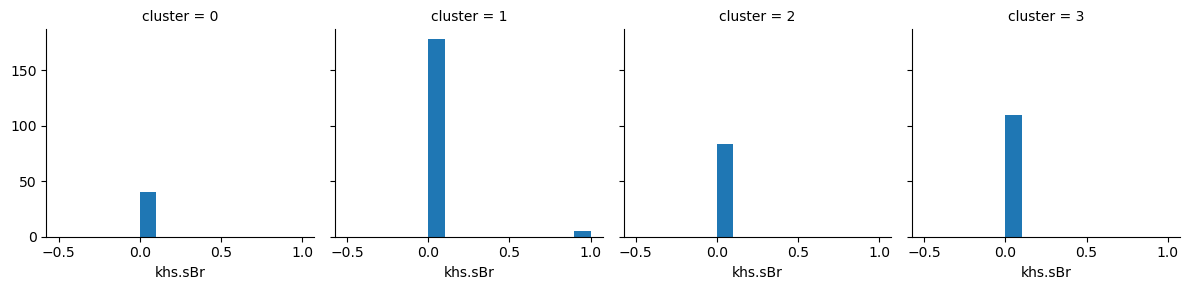

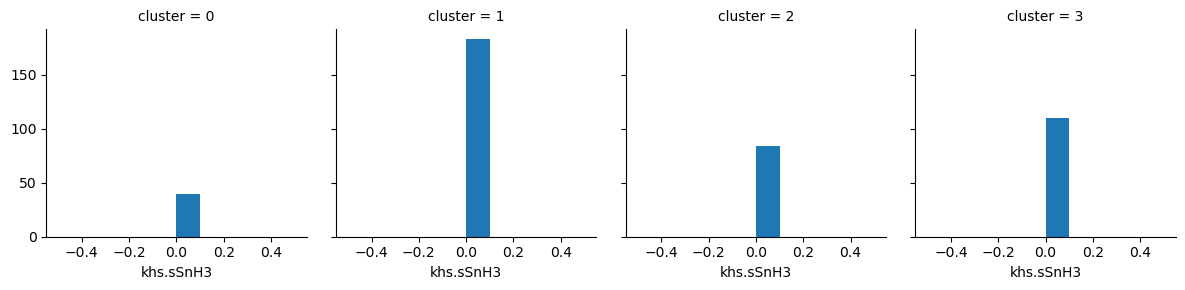

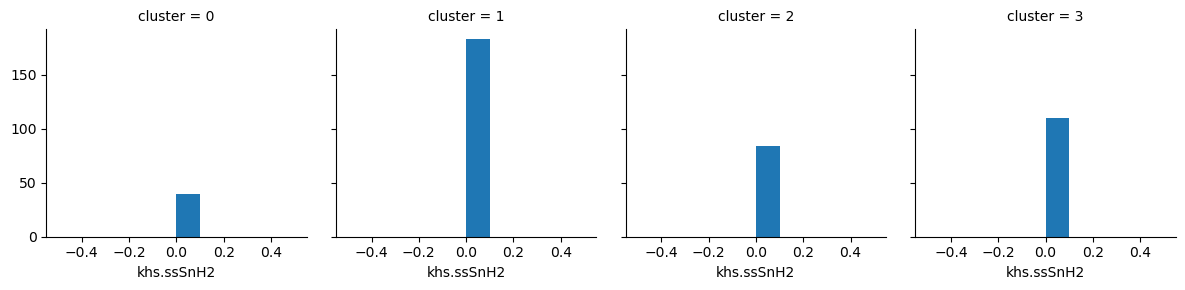

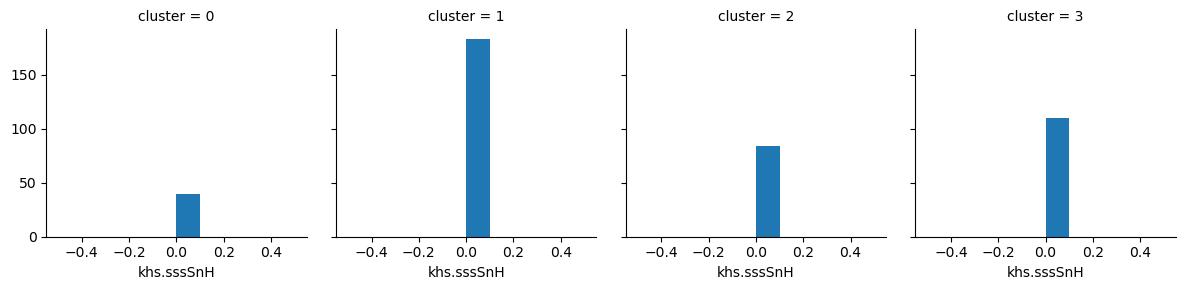

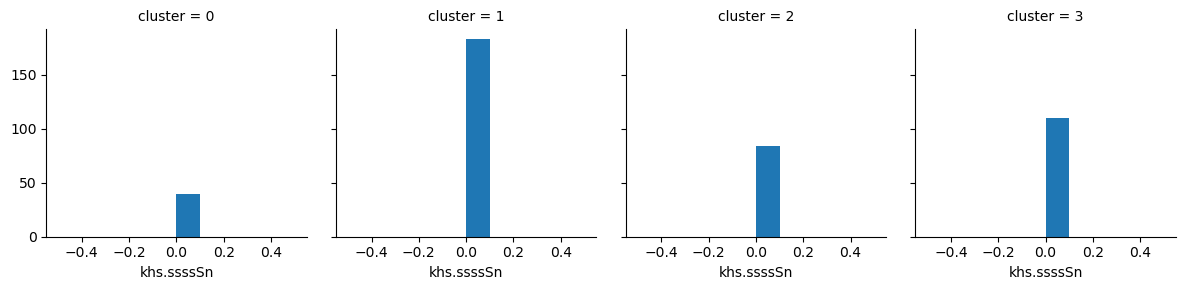

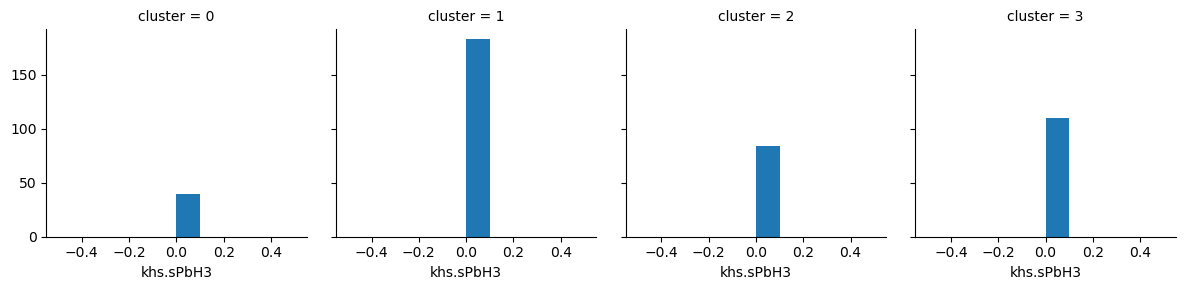

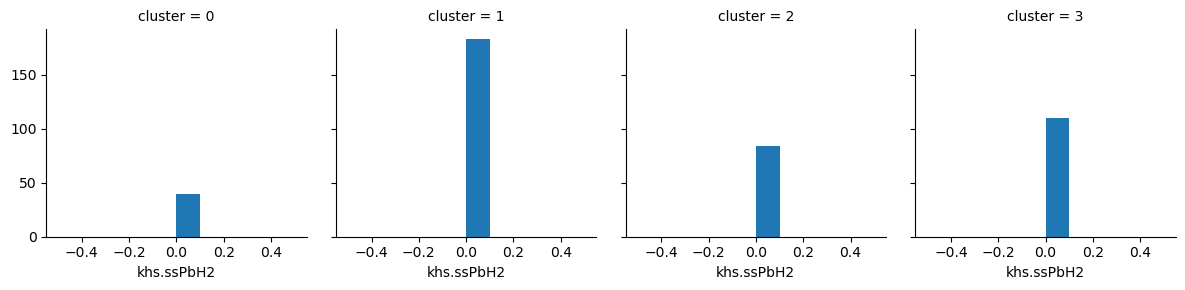

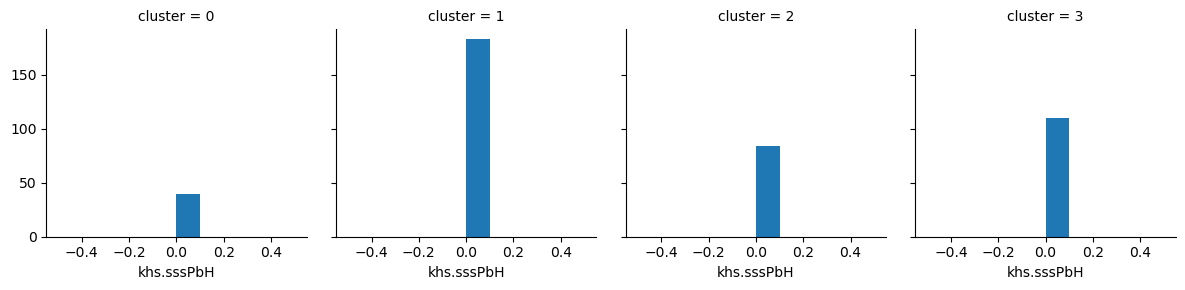

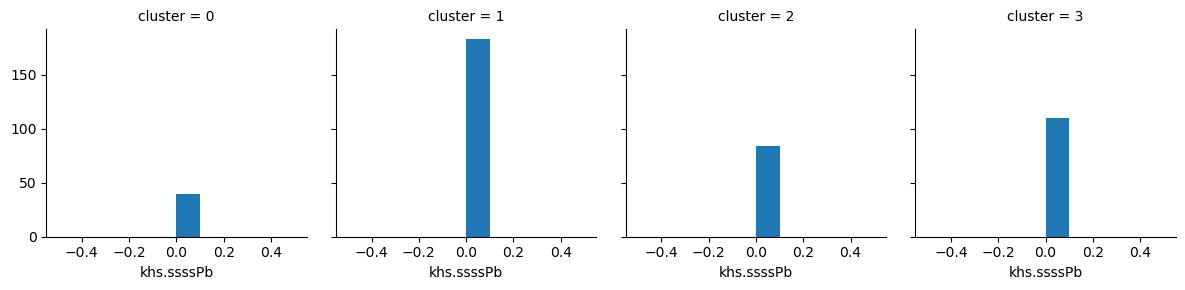

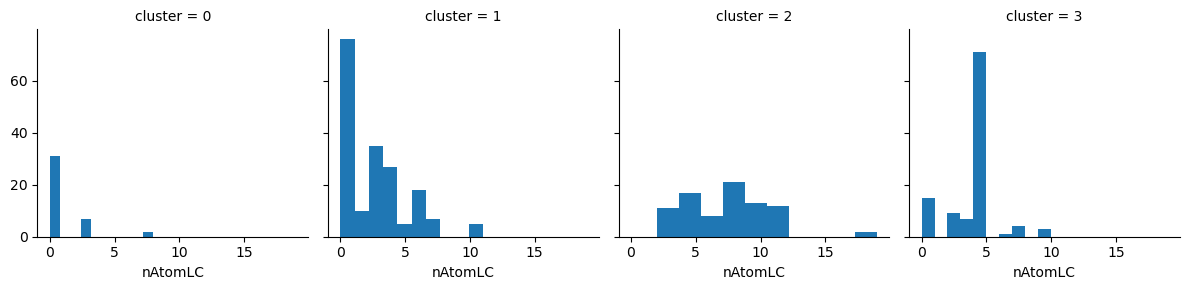

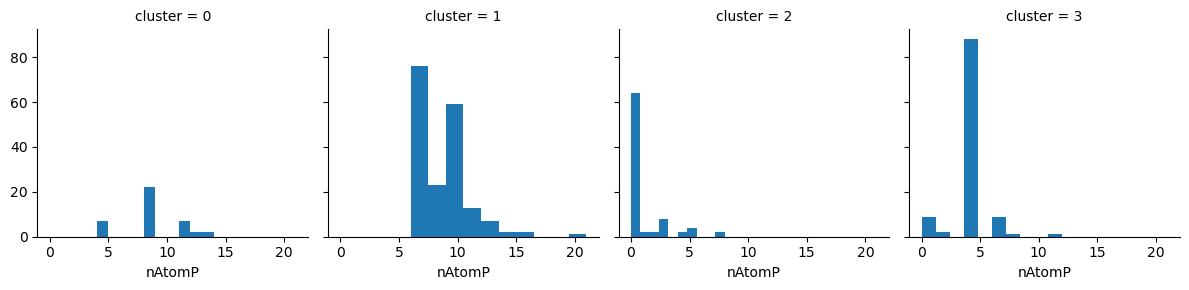

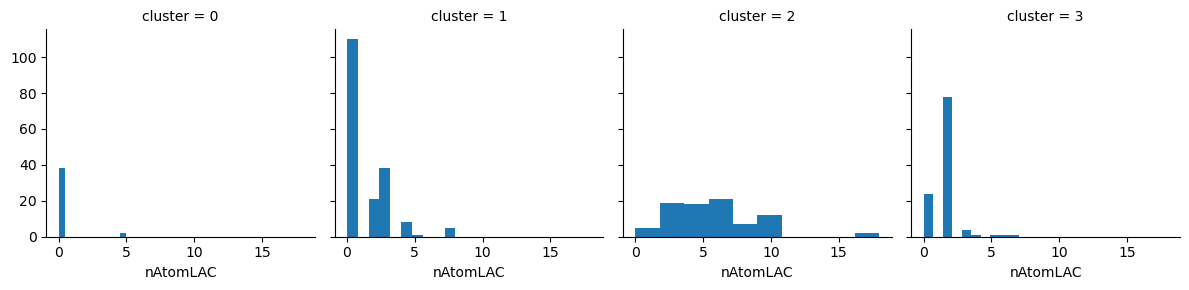

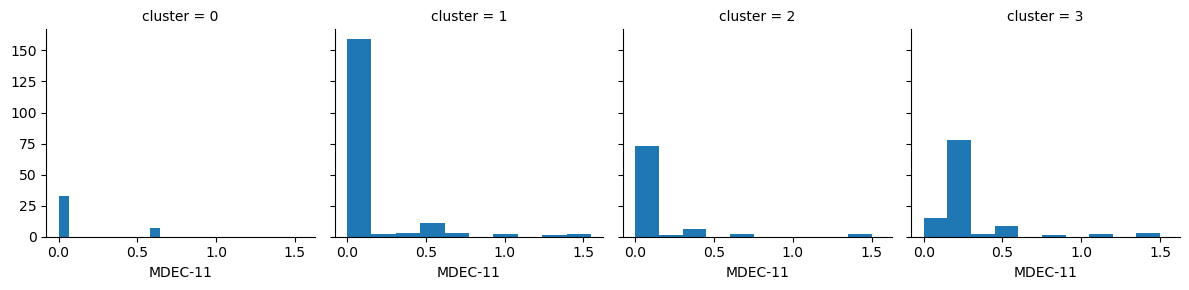

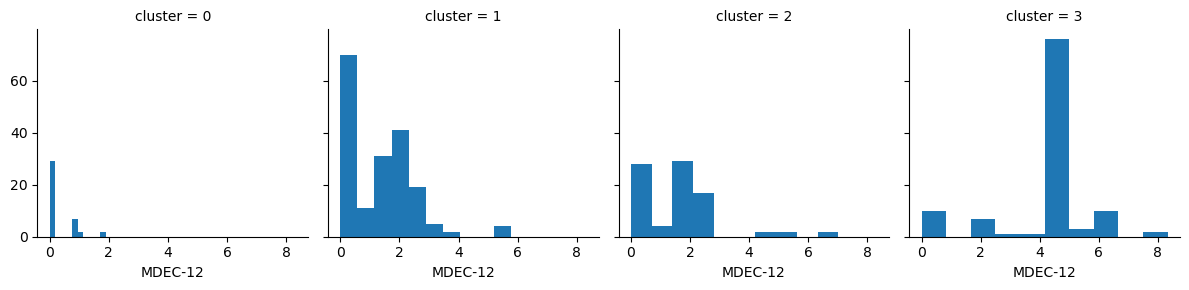

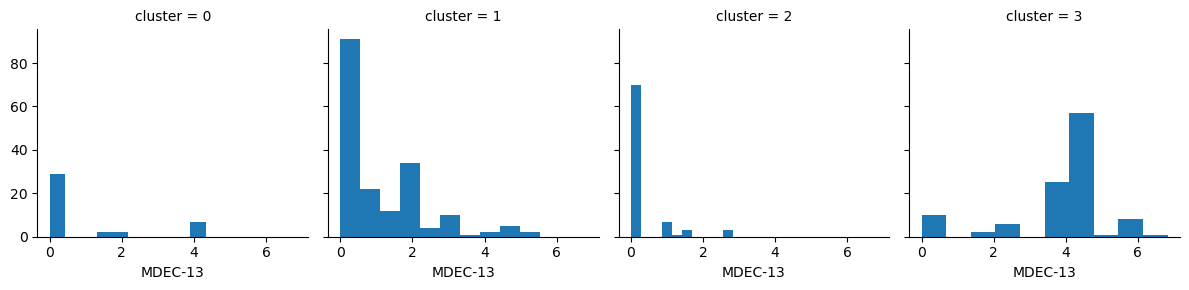

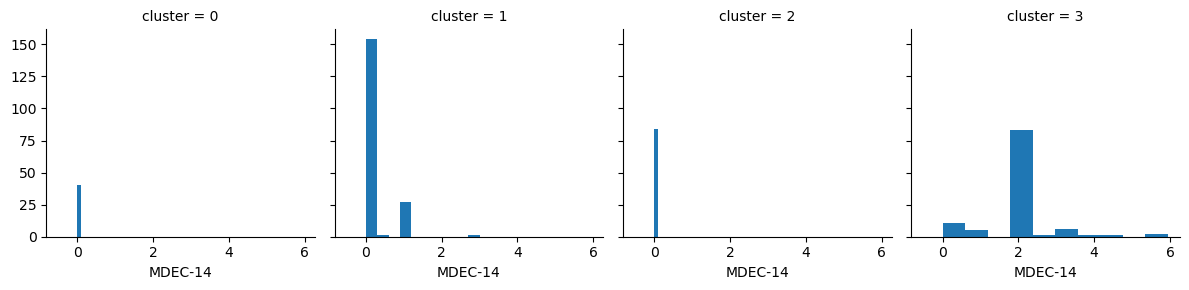

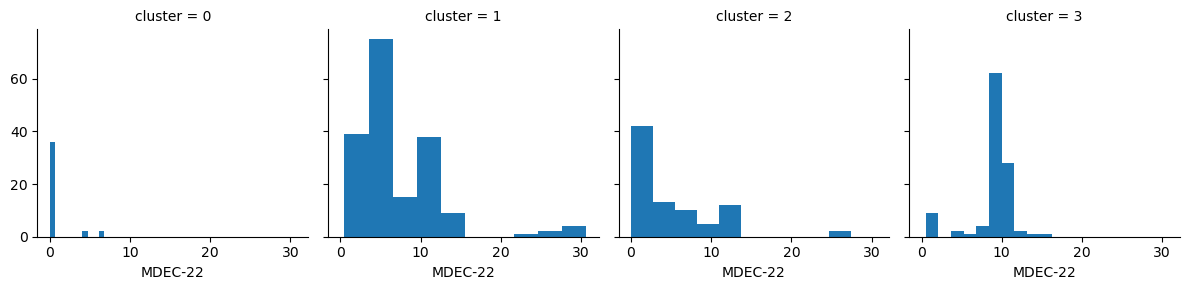

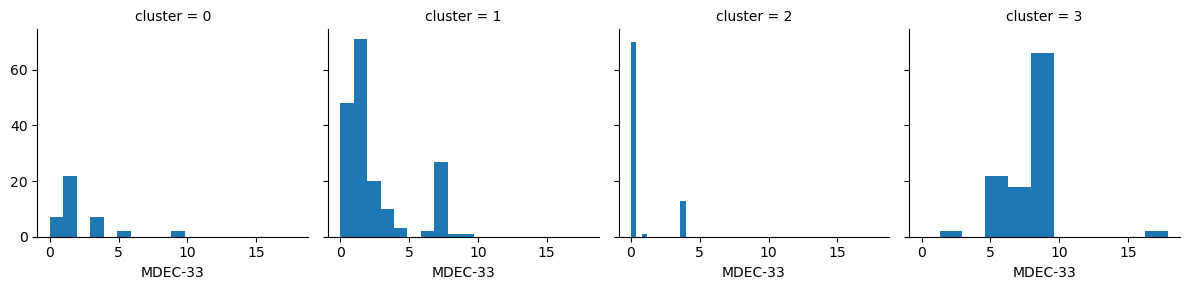

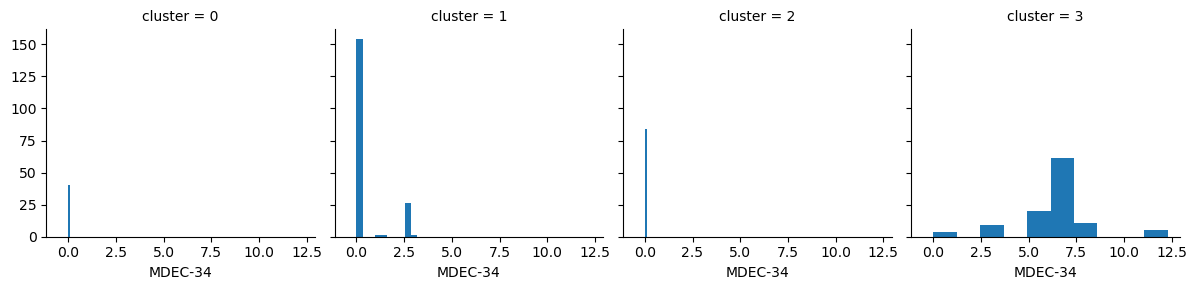

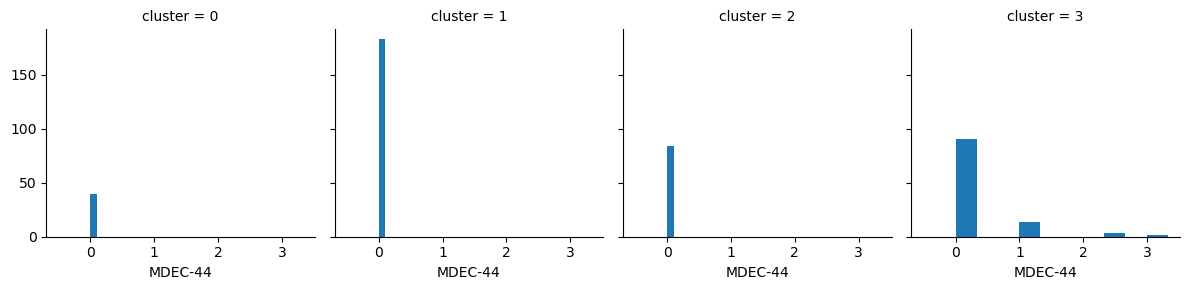

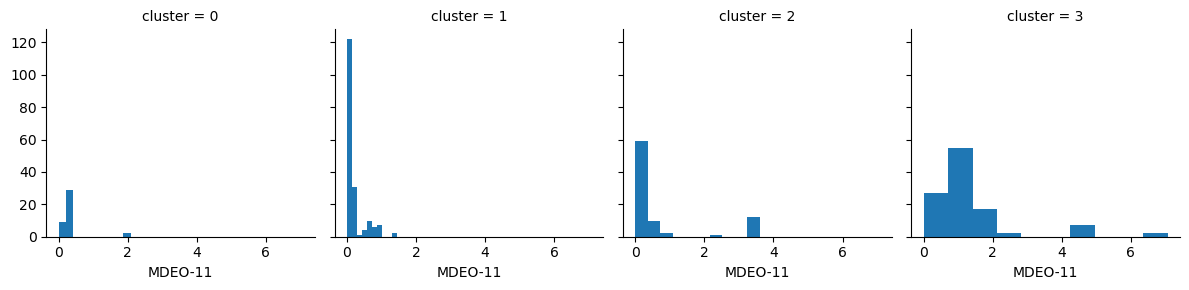

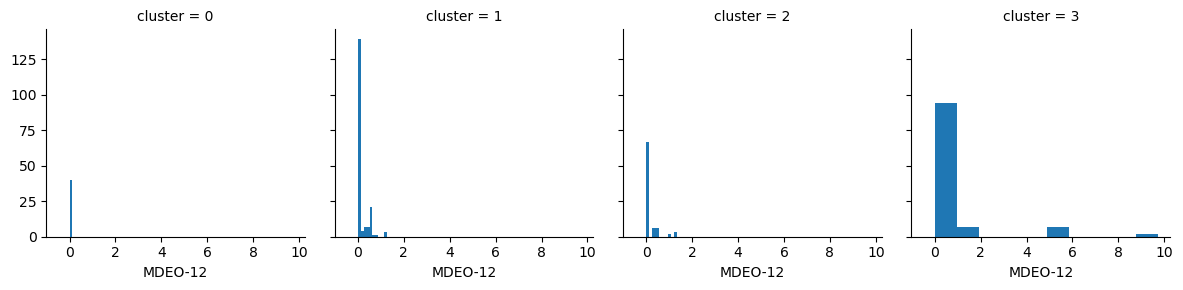

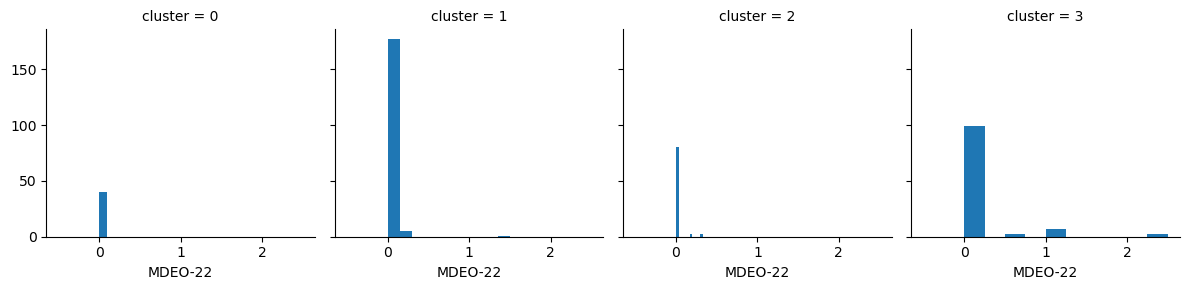

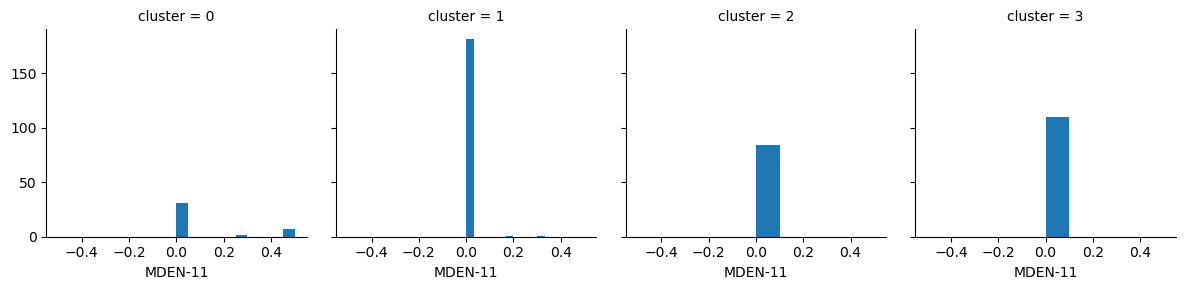

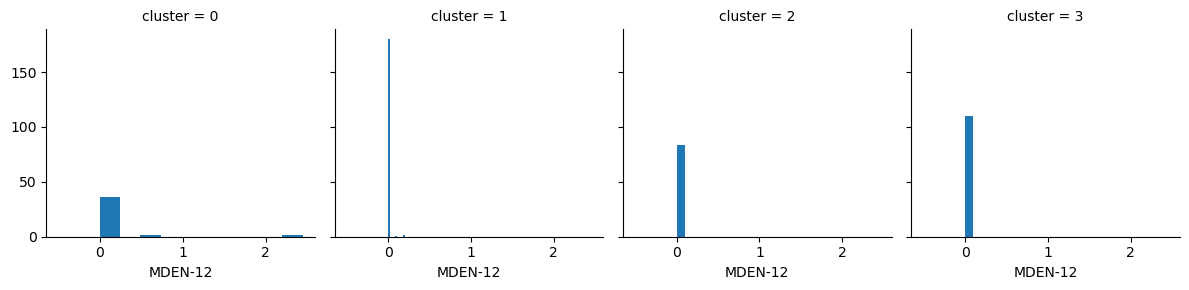

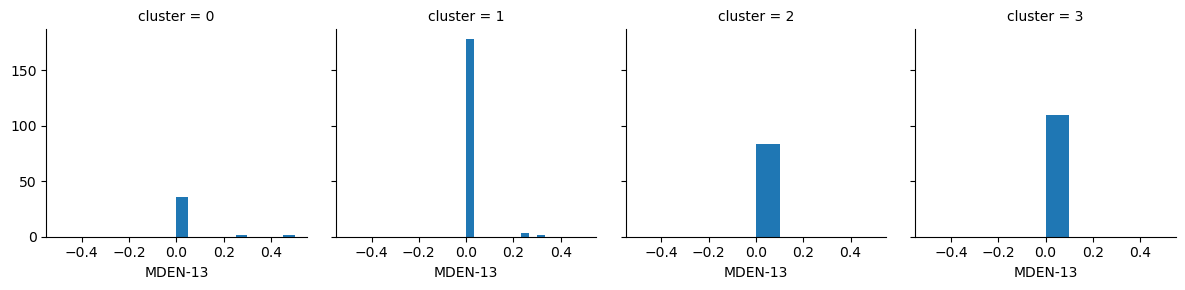

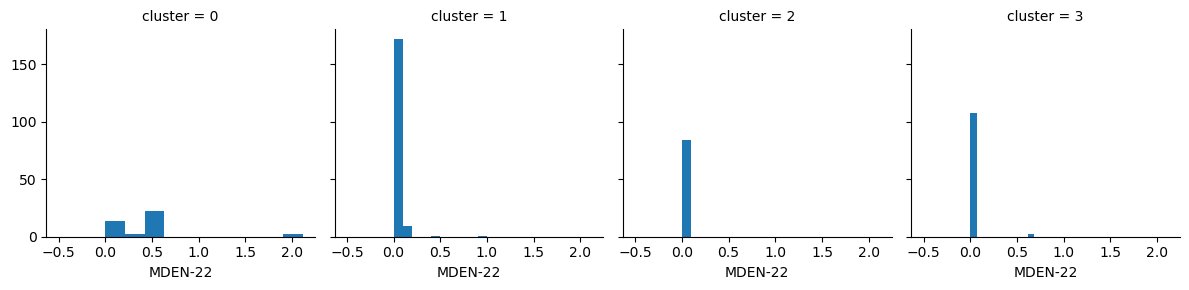

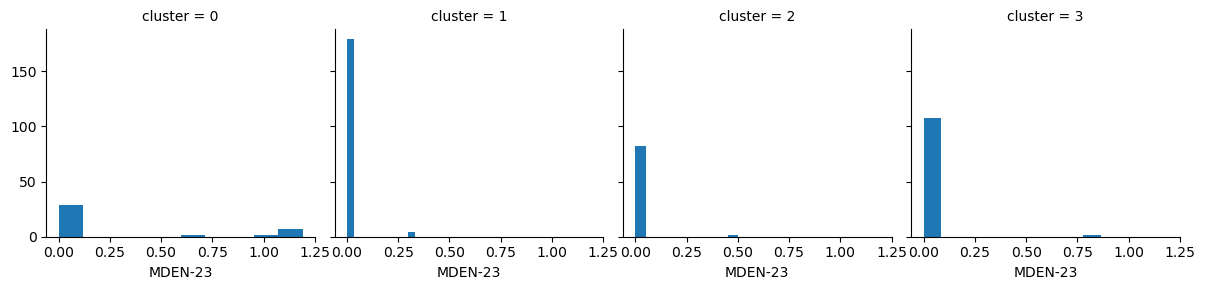

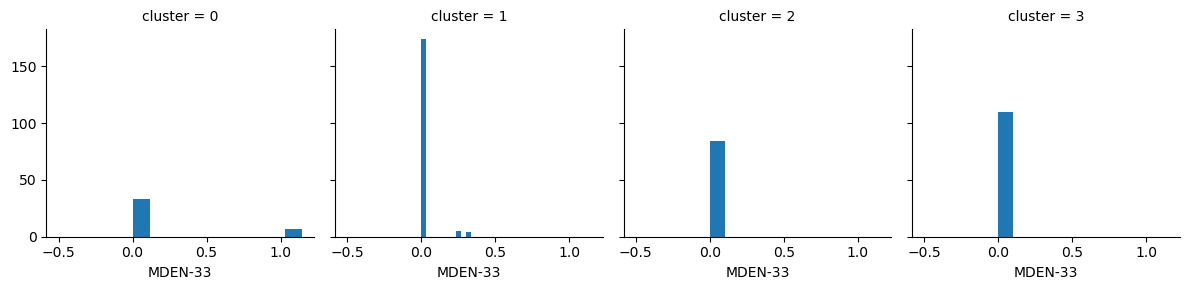

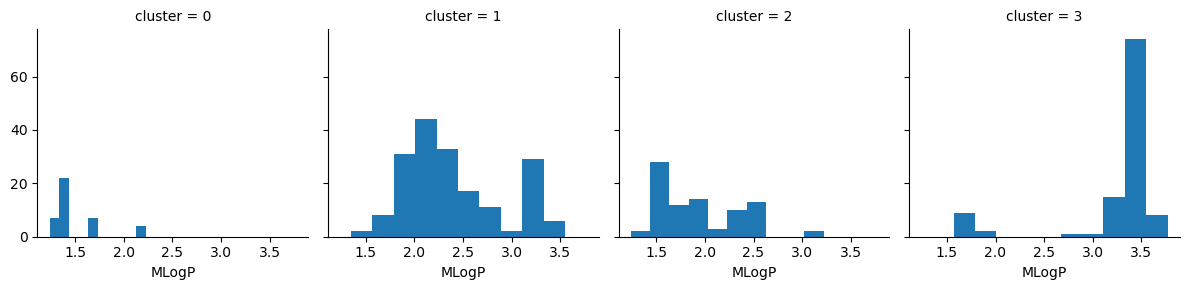

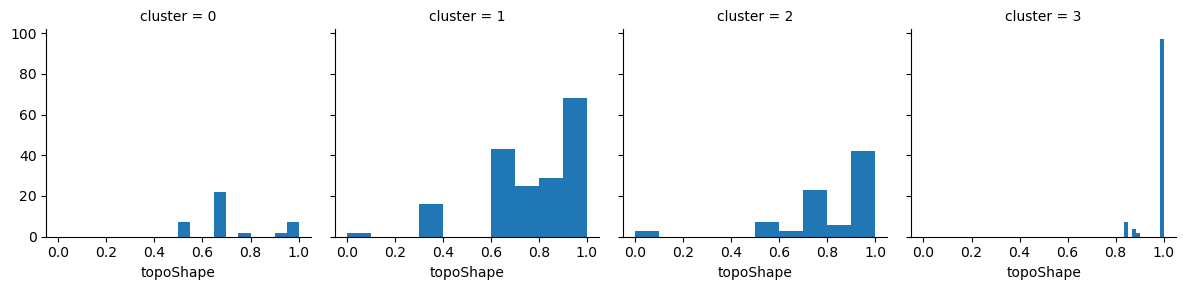

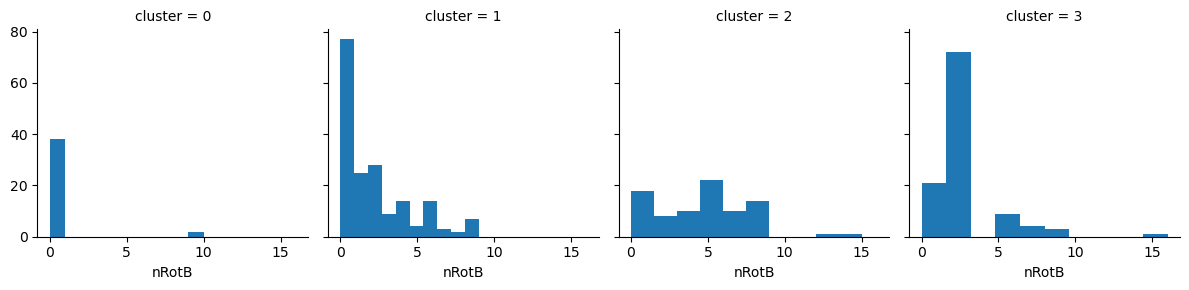

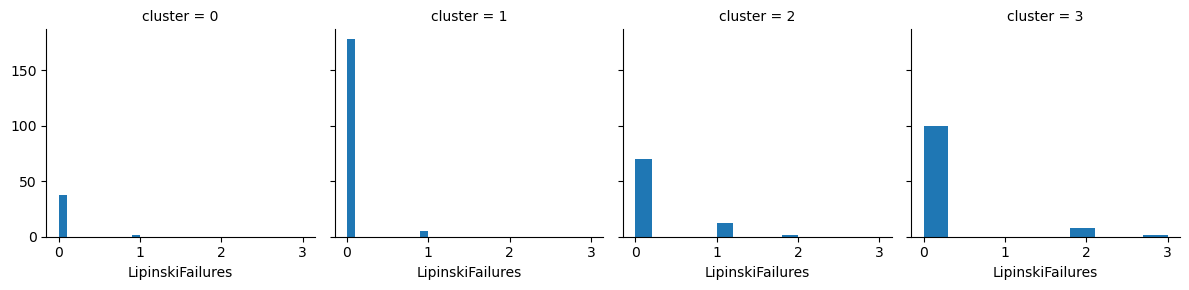

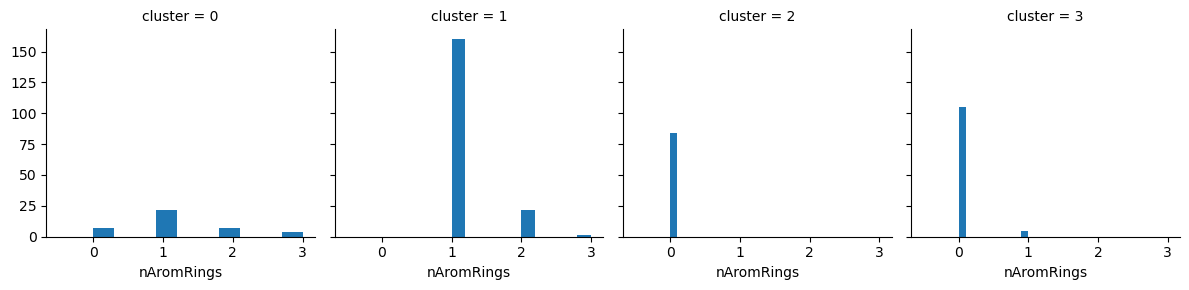

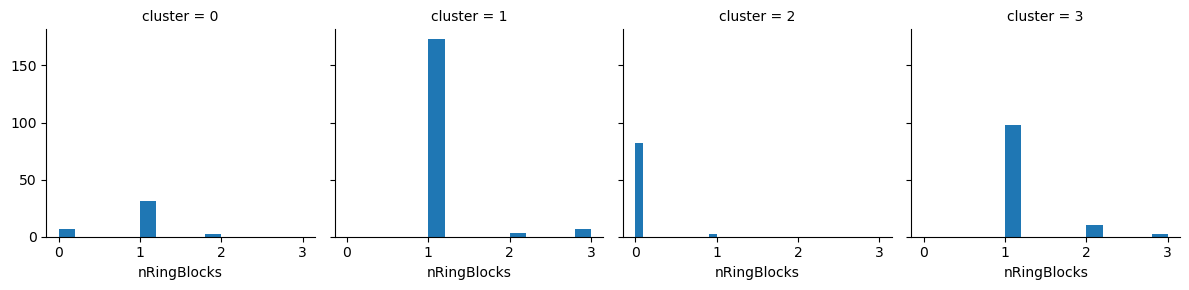

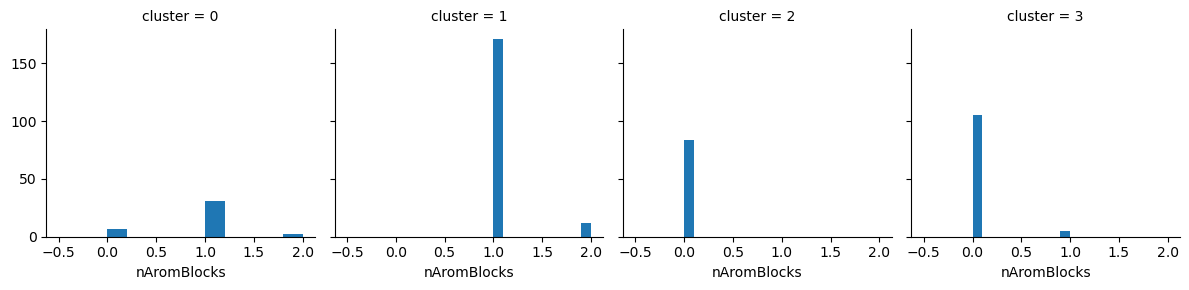

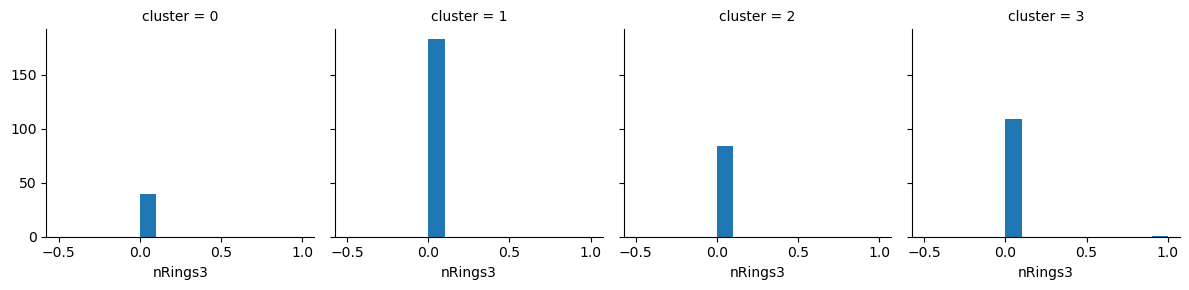

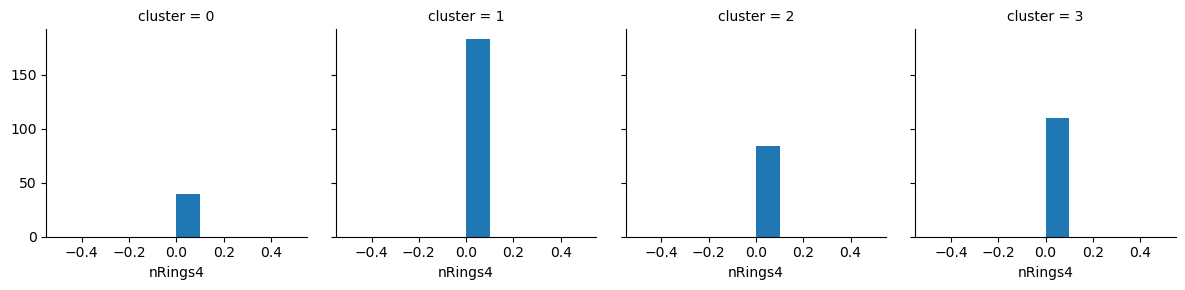

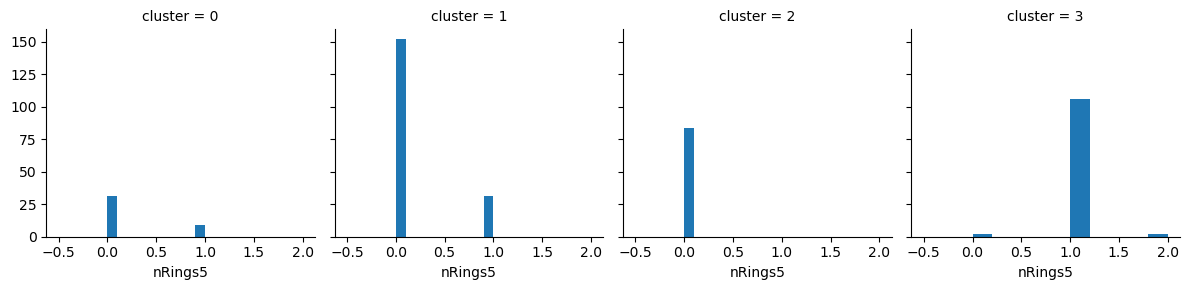

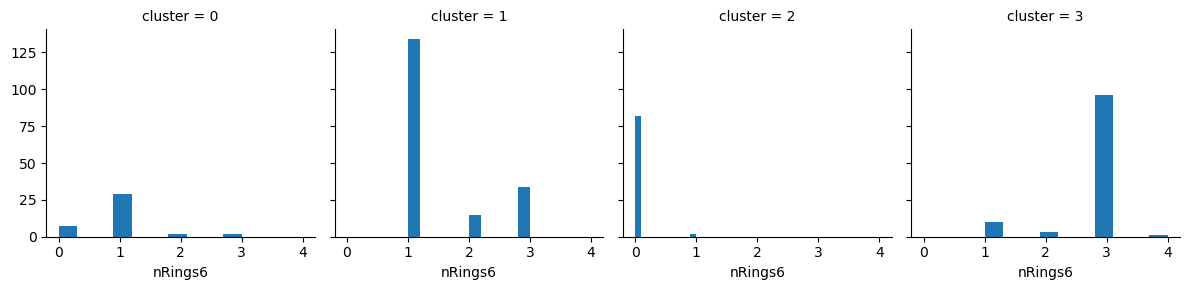

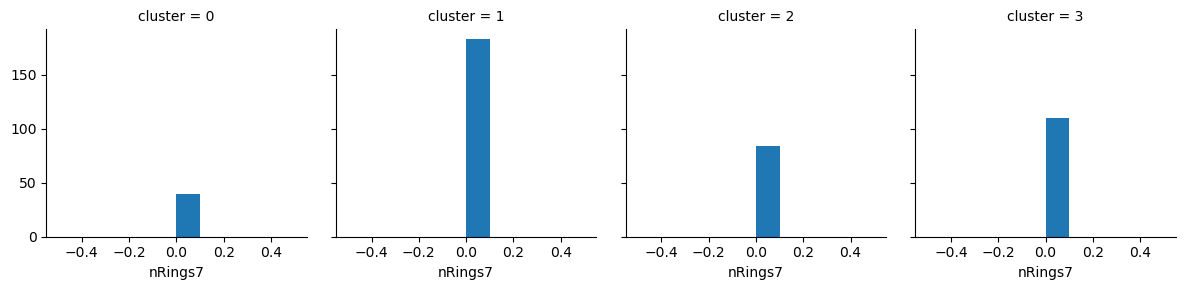

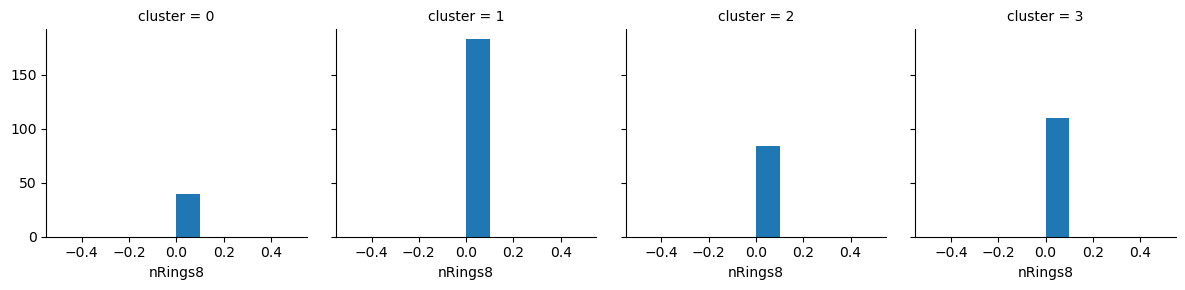

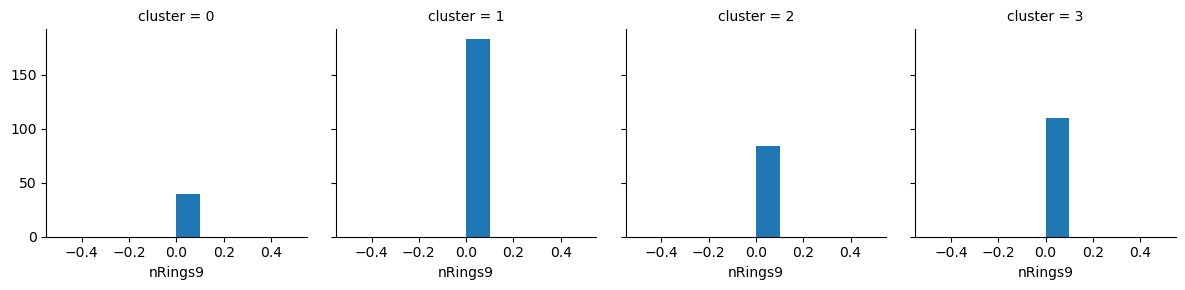

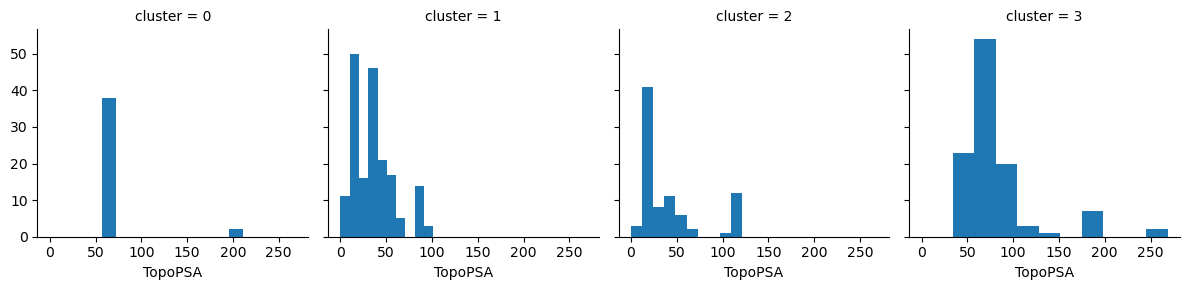

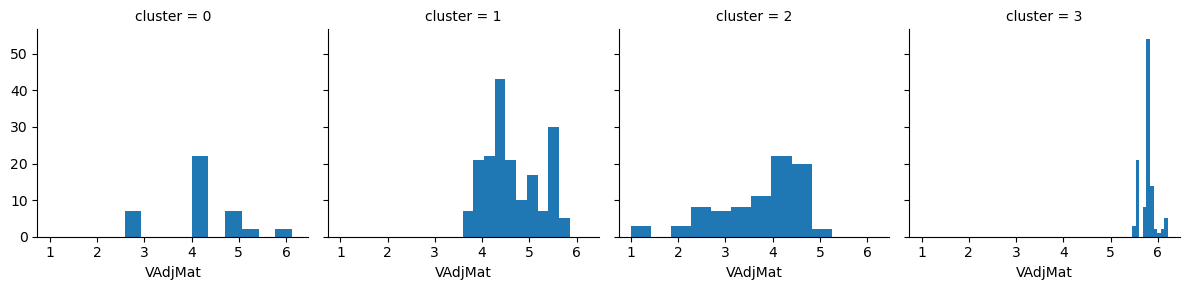

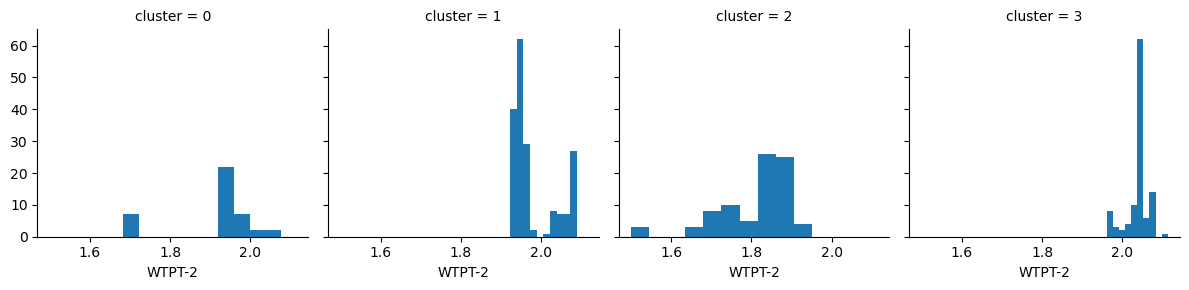

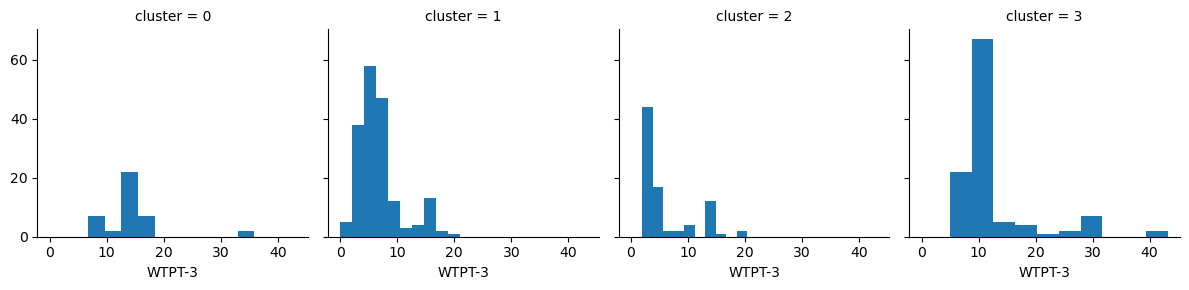

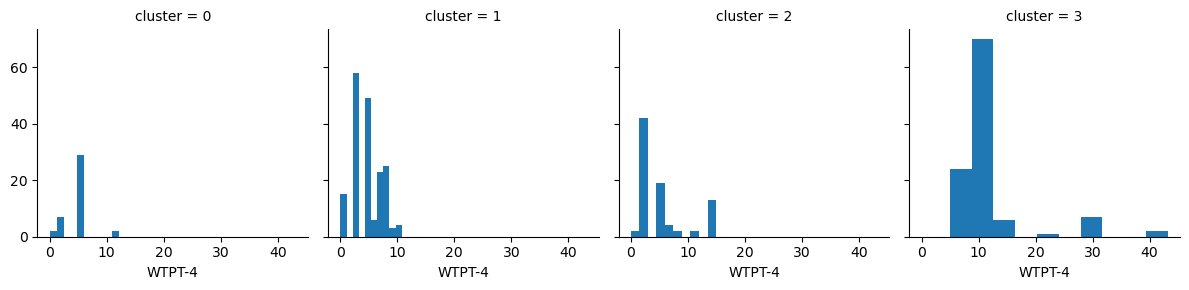

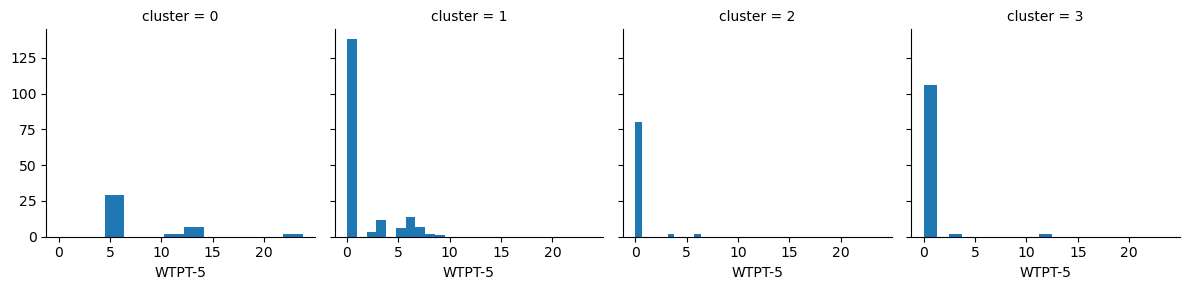

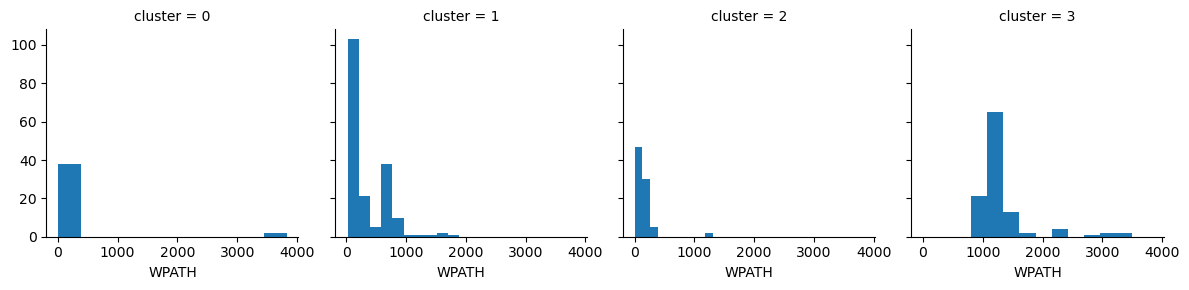

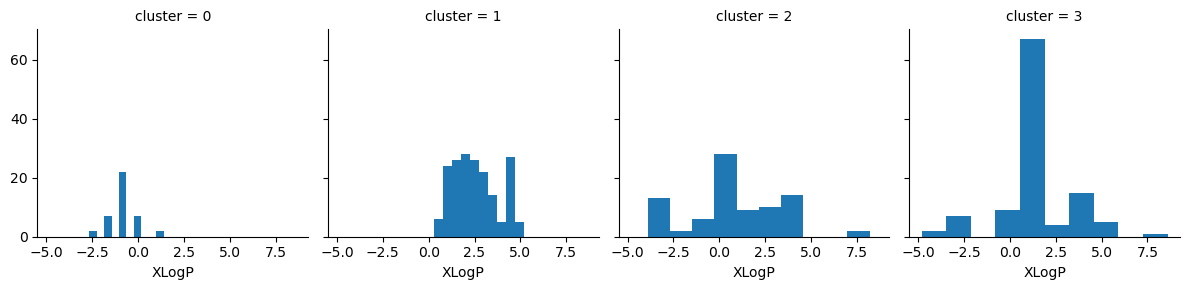

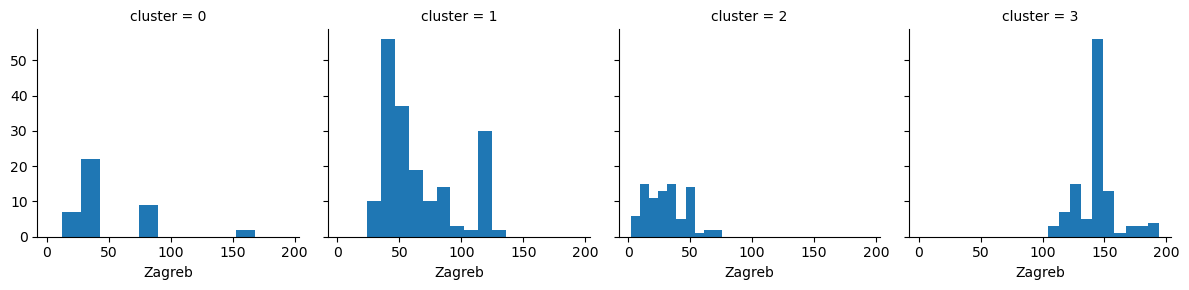

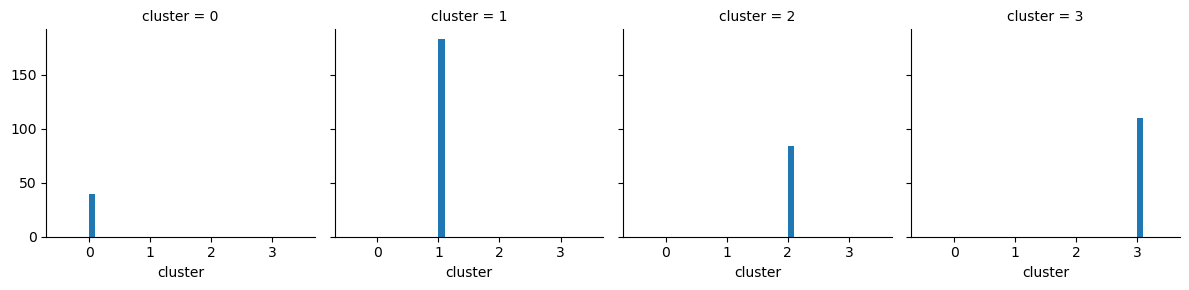

In [12]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col="cluster")
    grid.map(plt.hist, c)

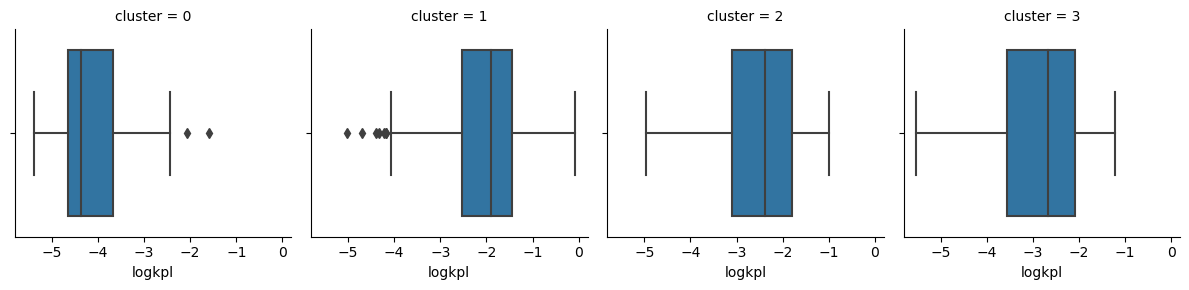

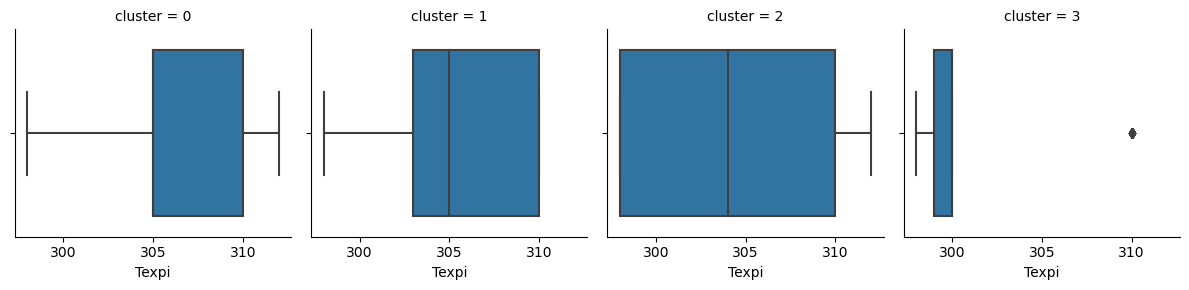

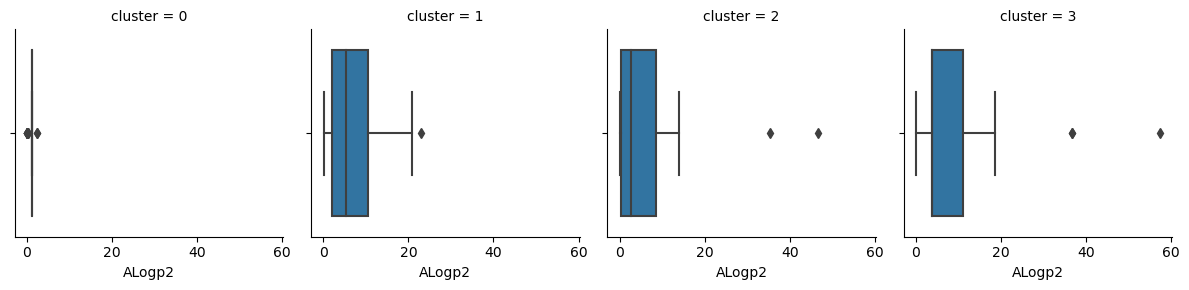

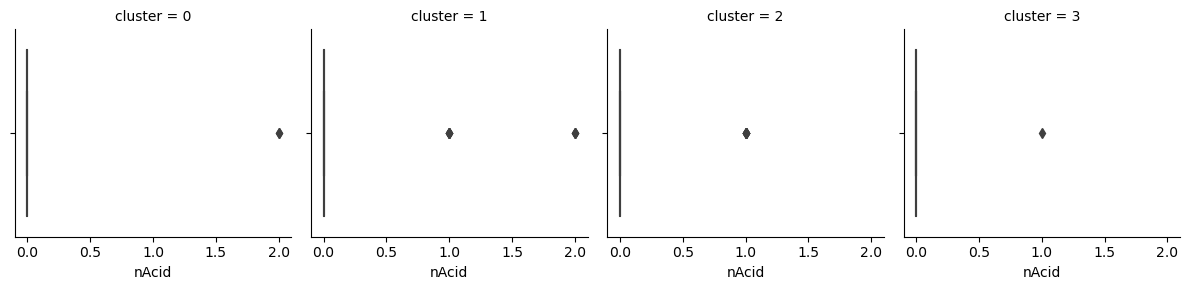

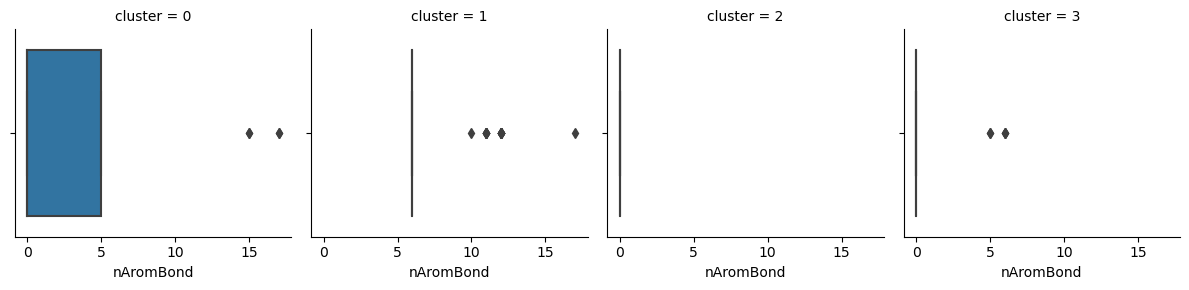

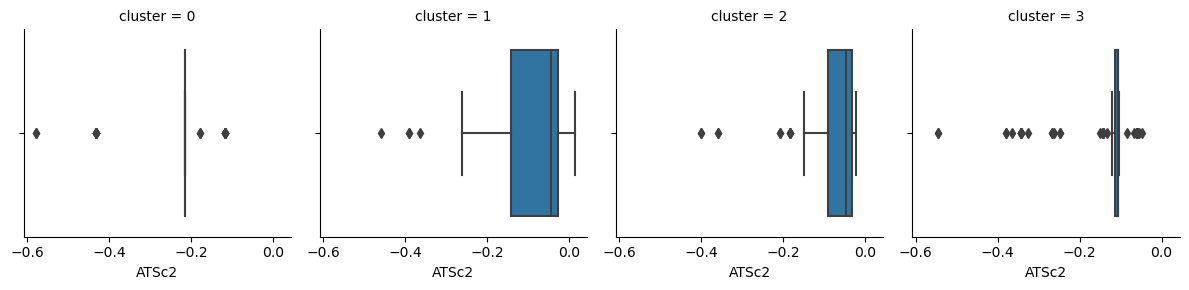

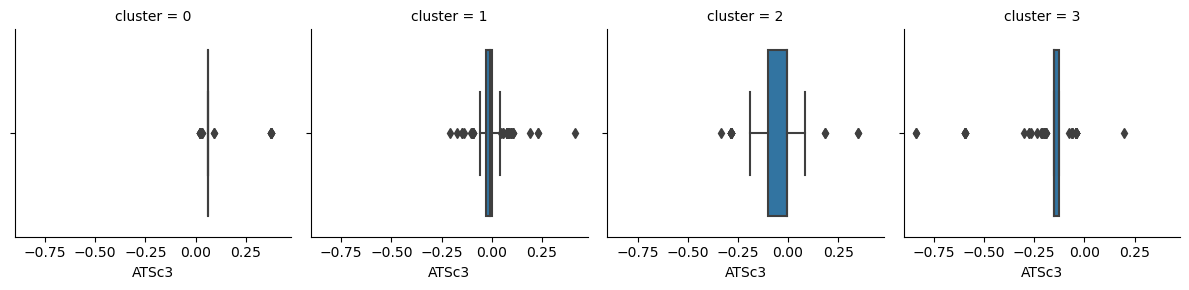

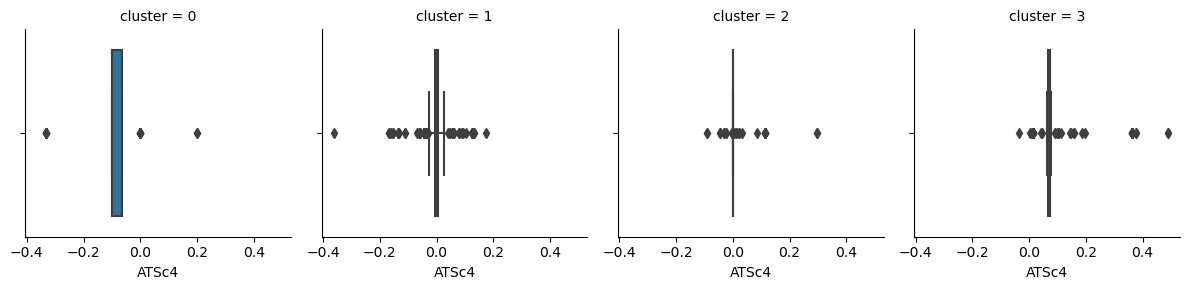

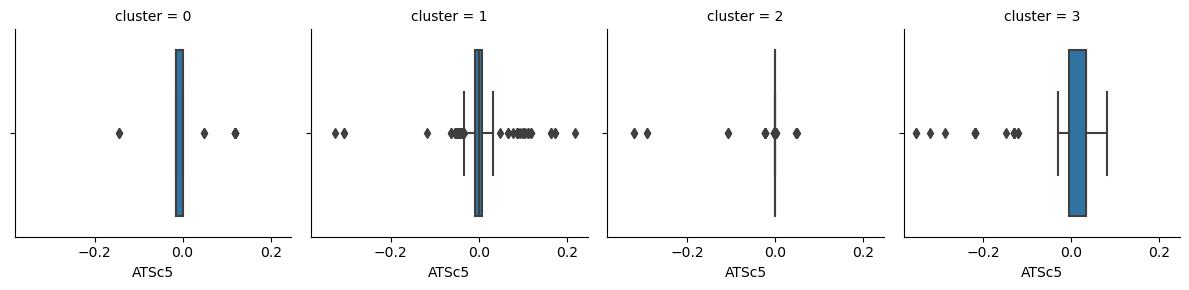

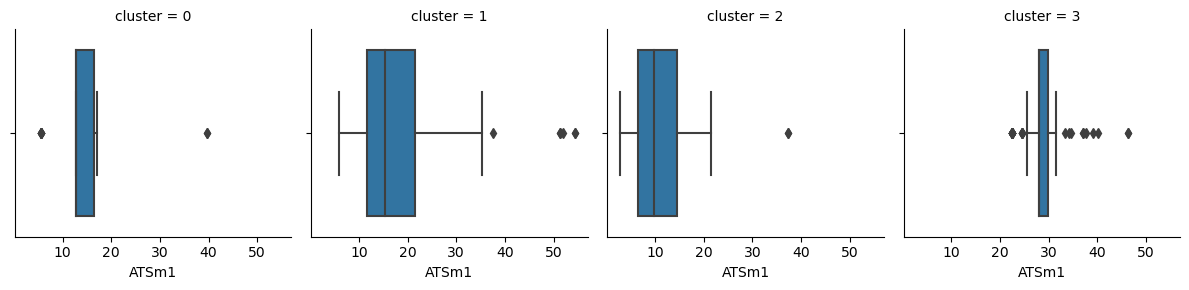

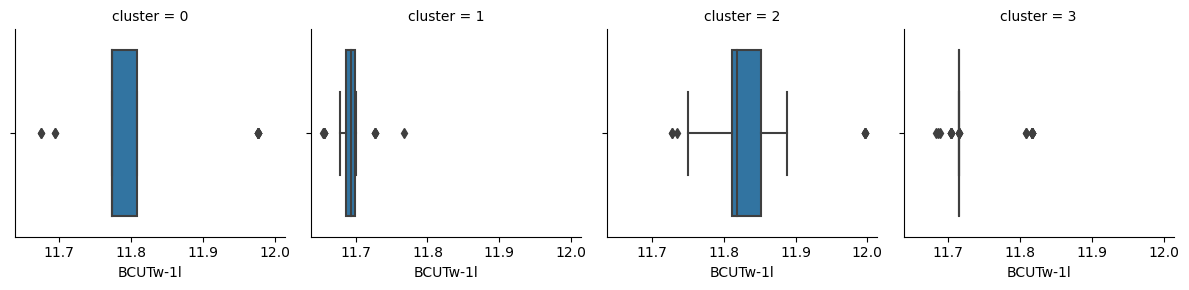

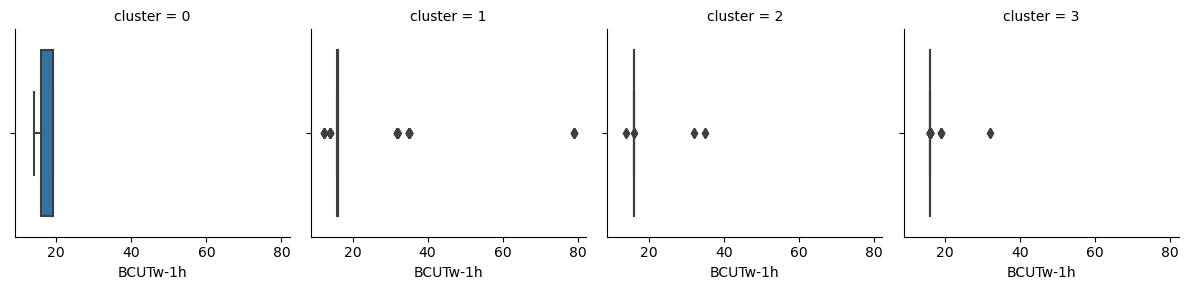

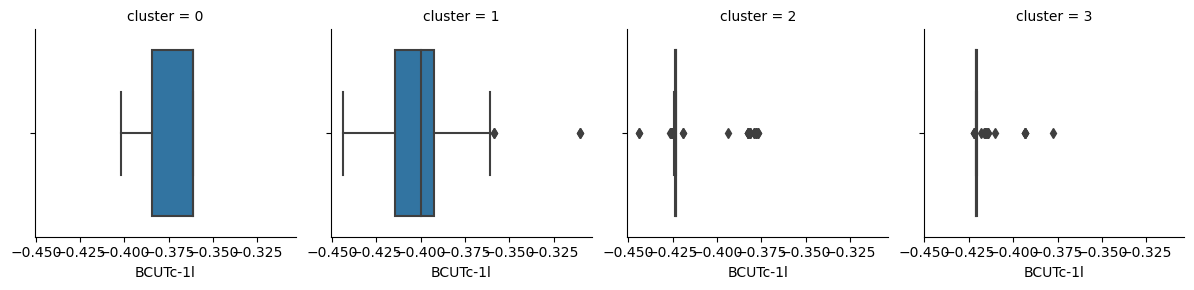

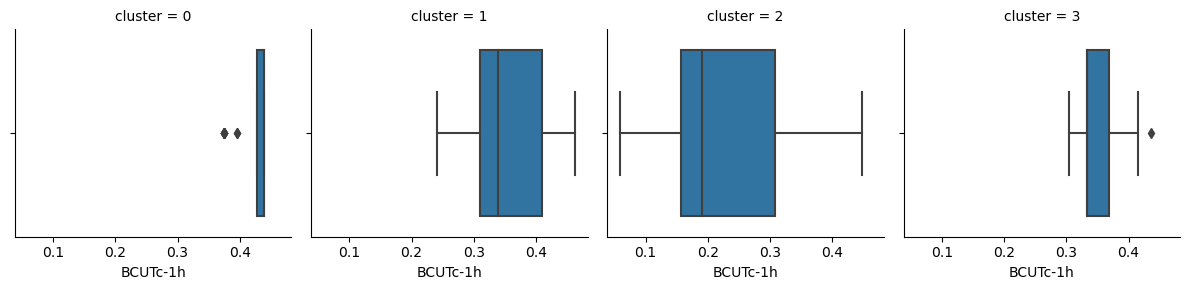

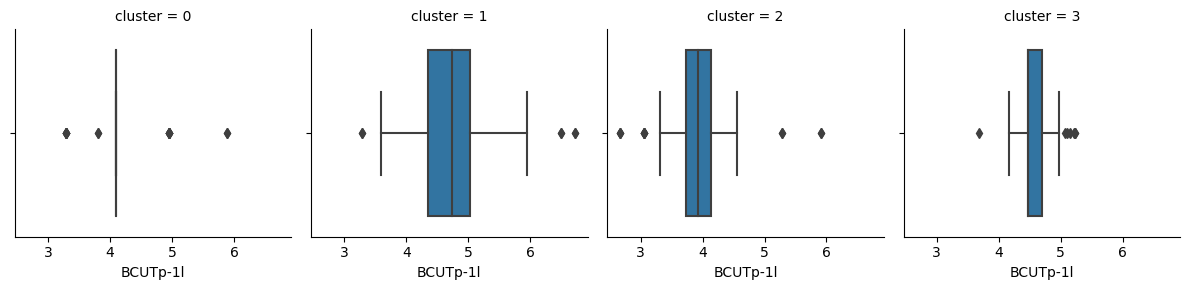

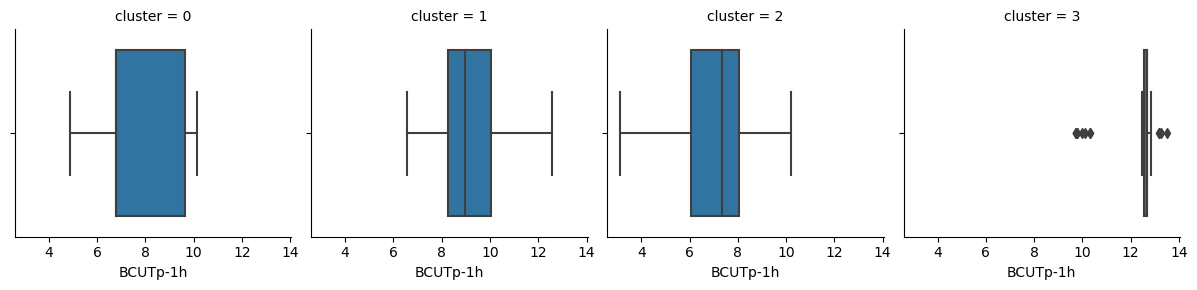

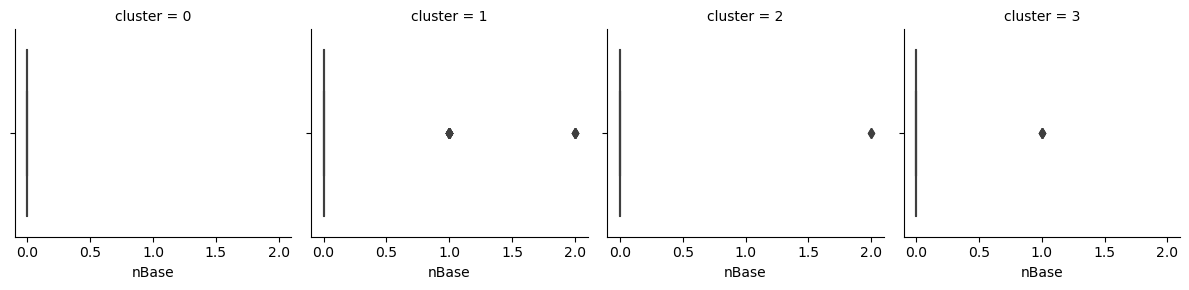

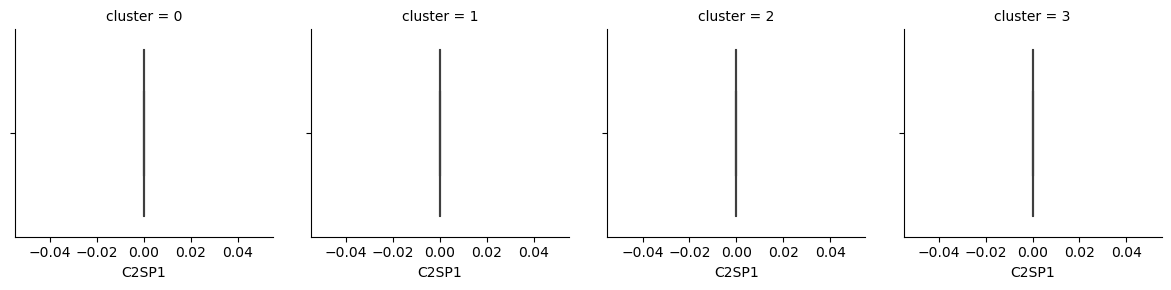

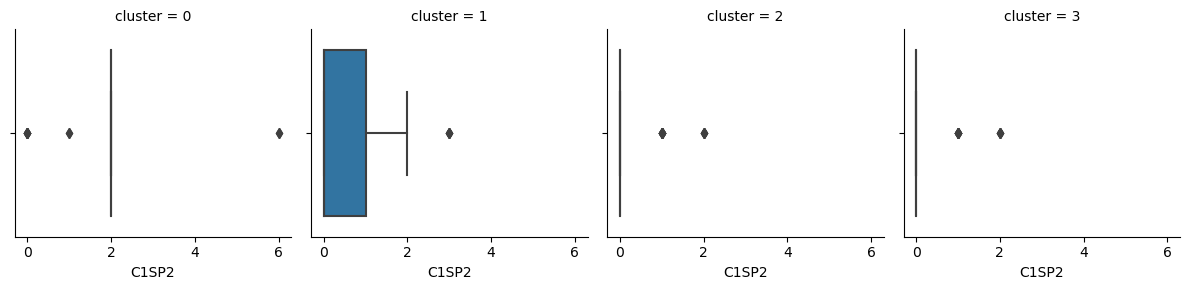

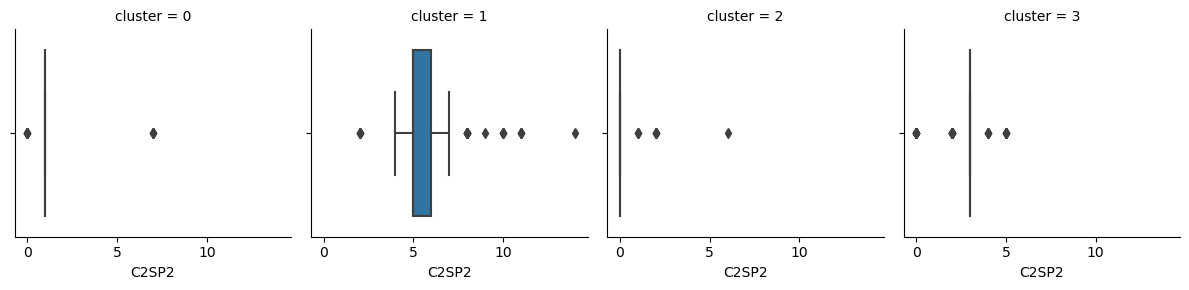

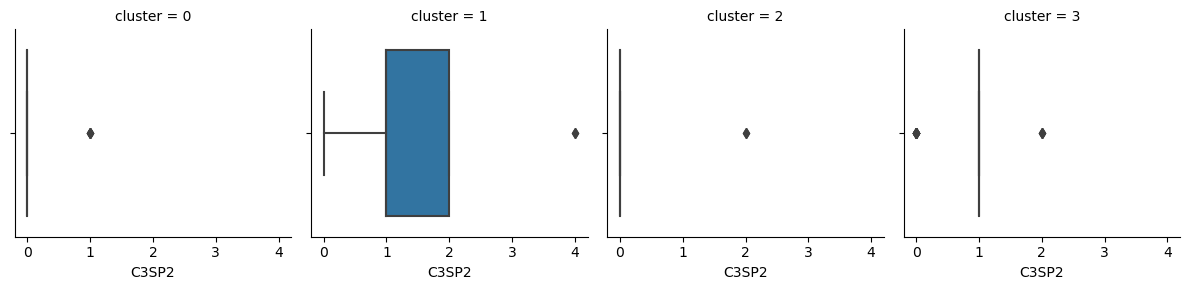

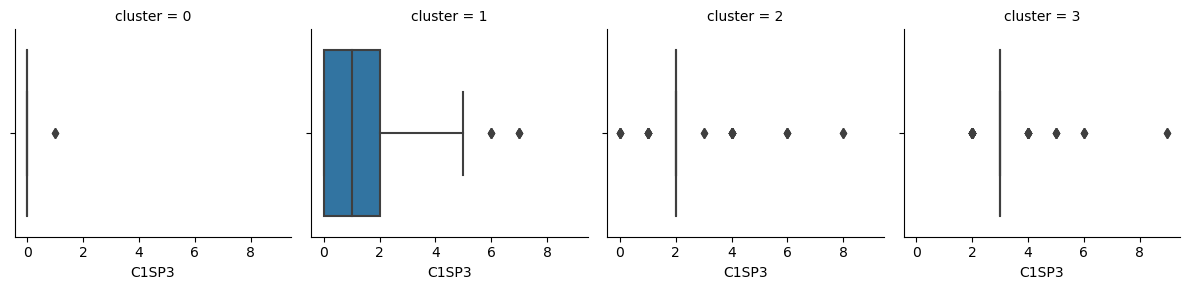

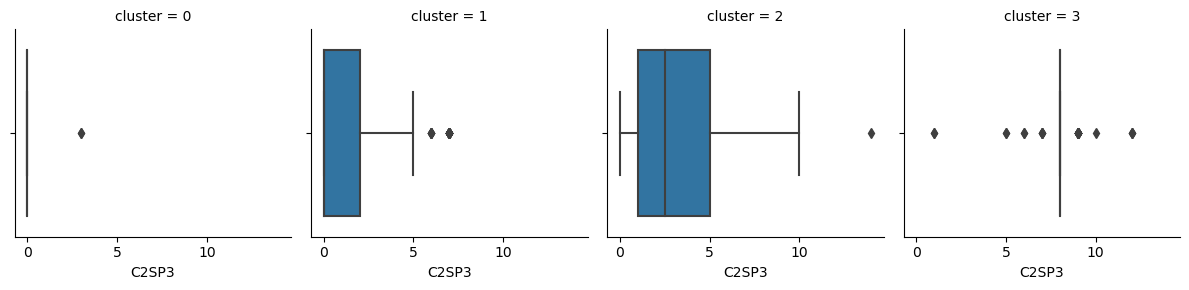

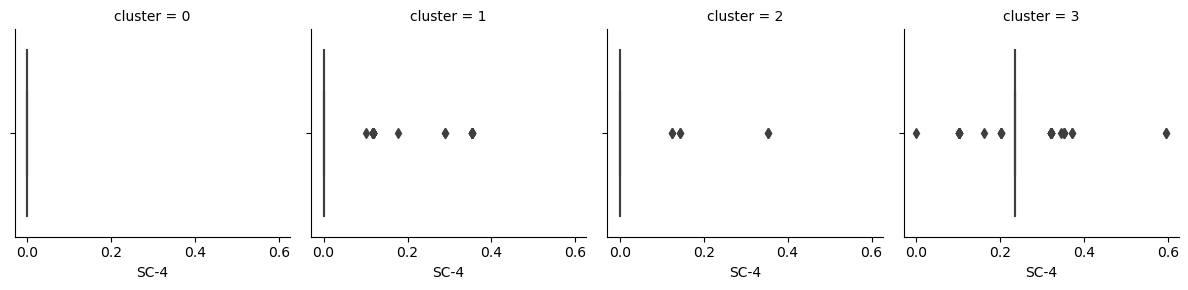

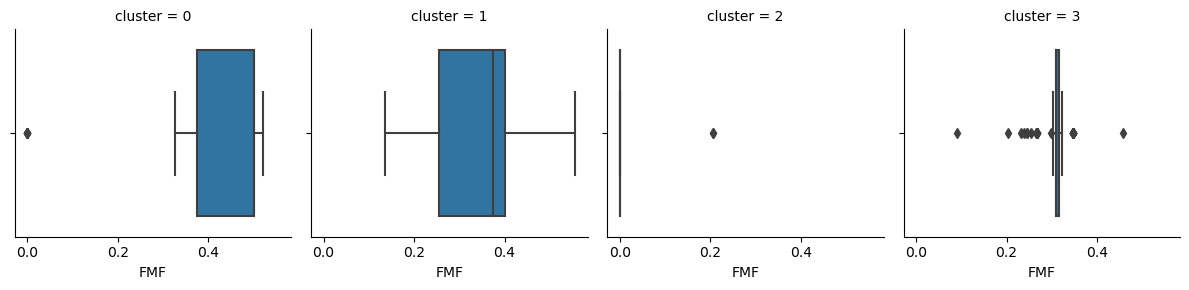

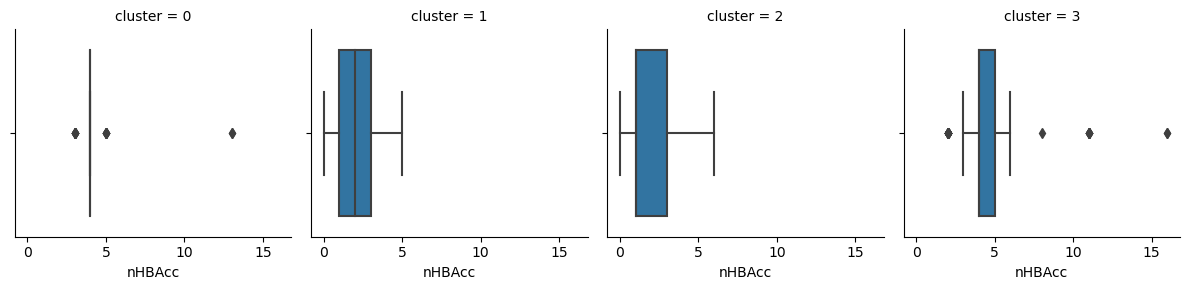

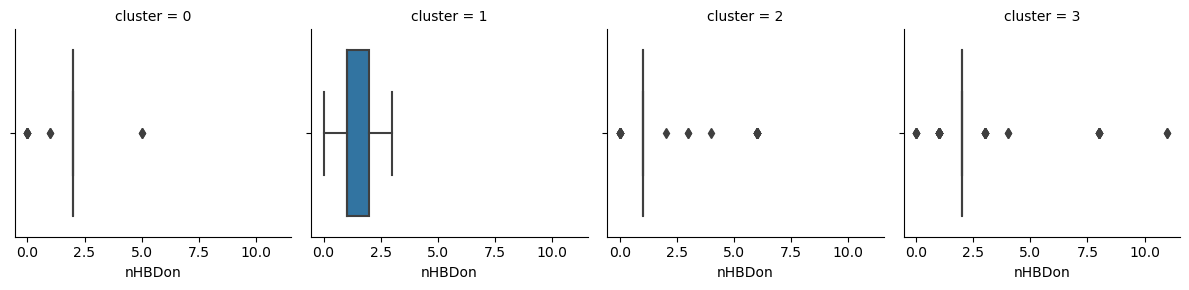

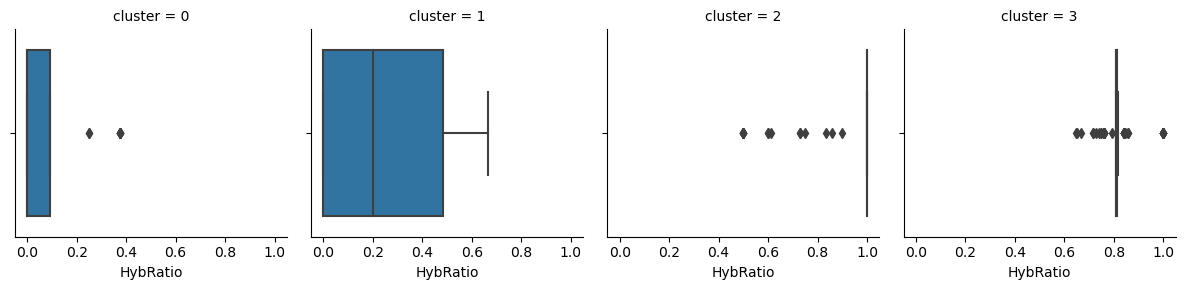

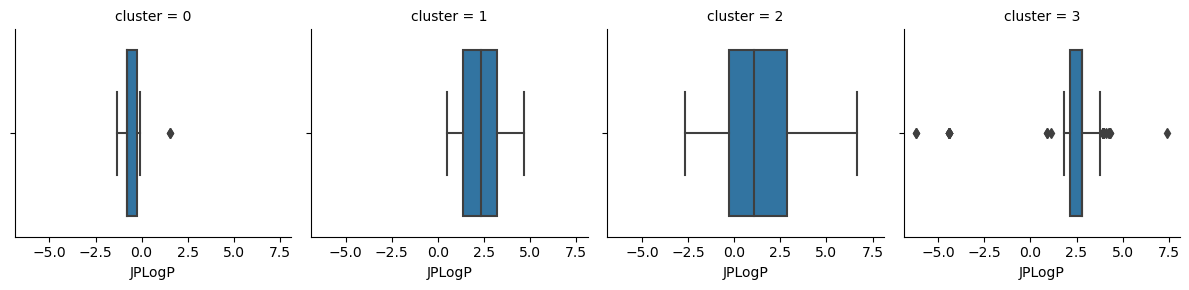

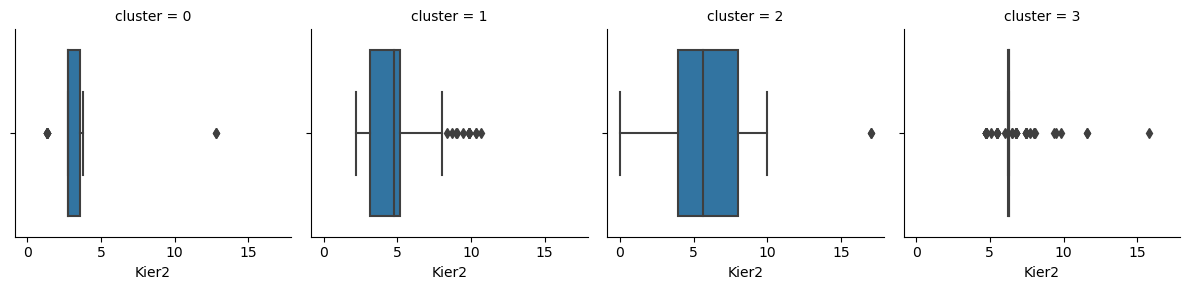

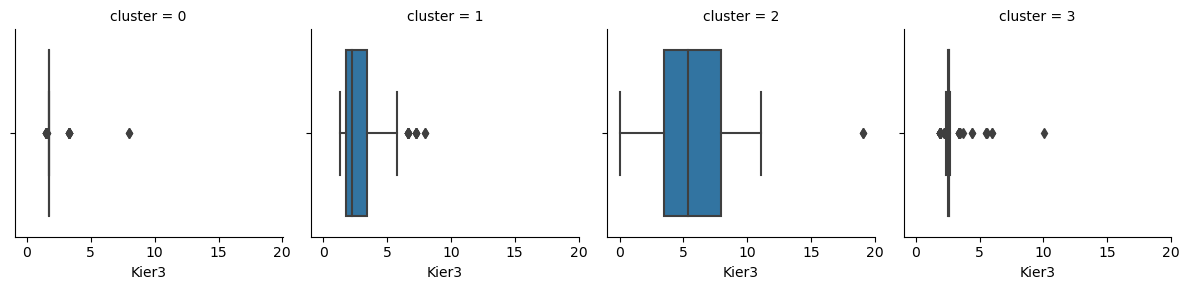

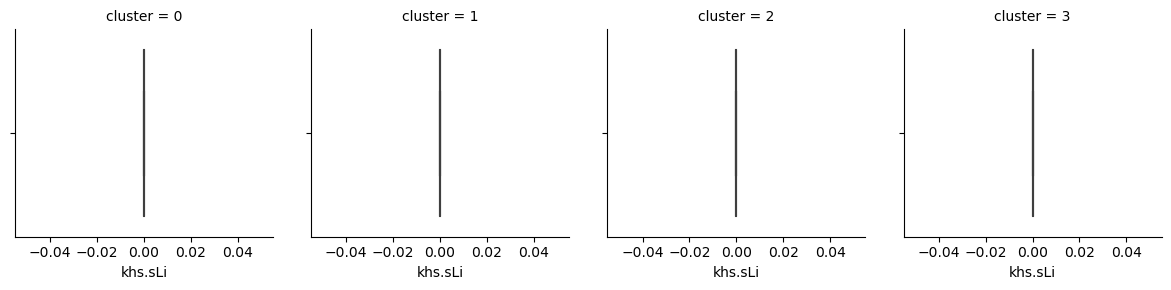

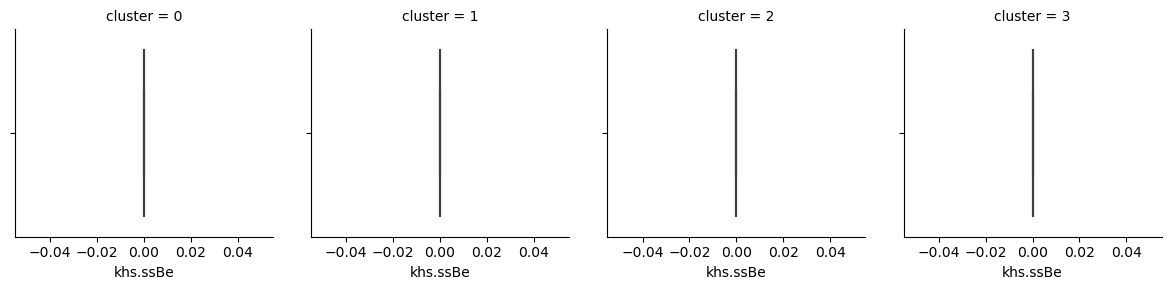

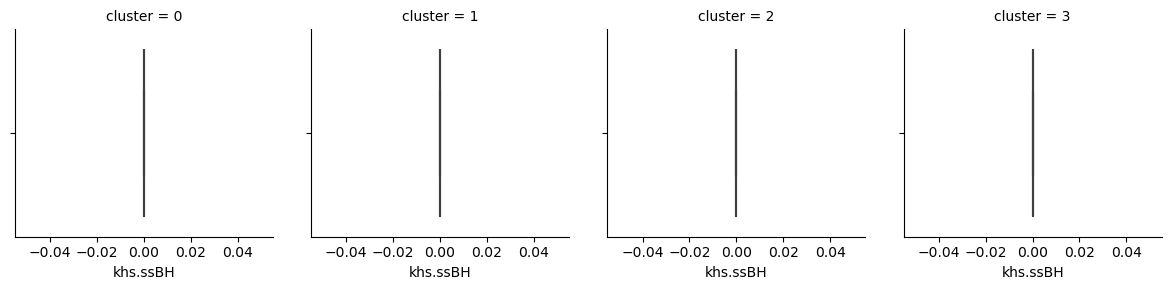

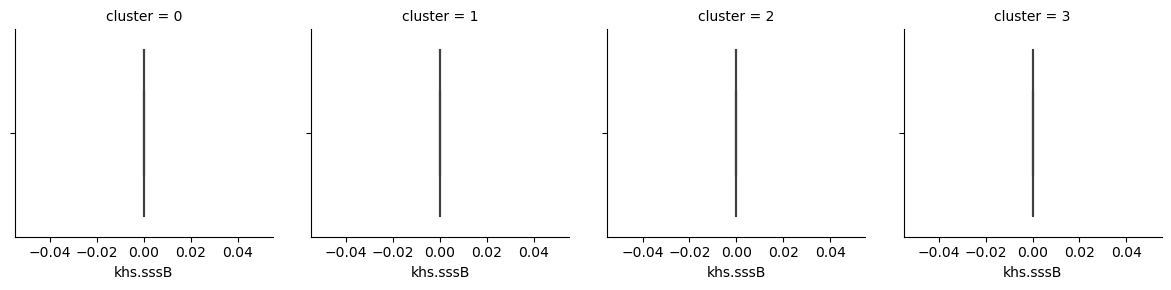

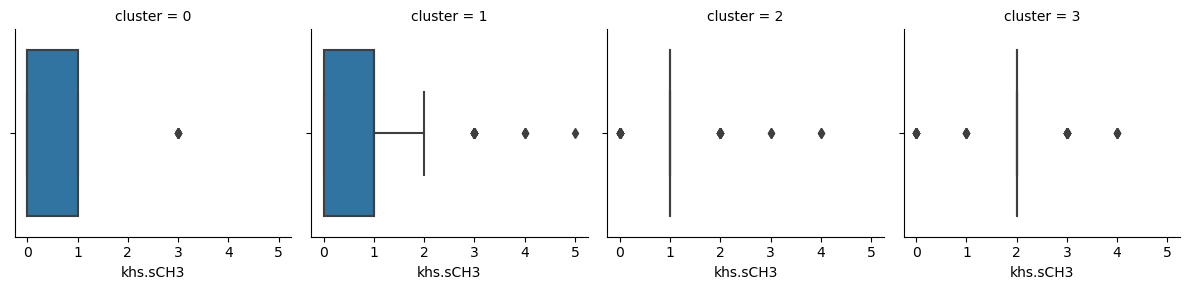

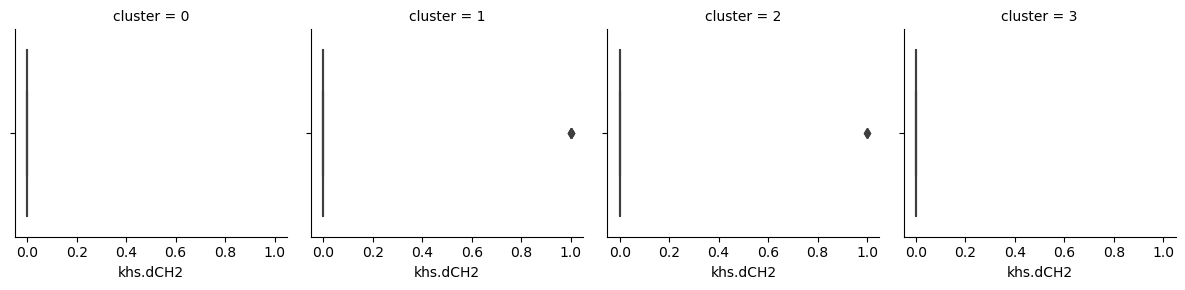

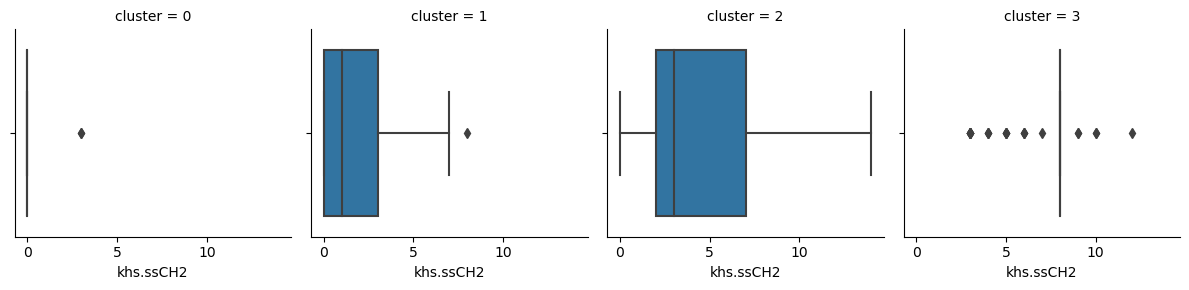

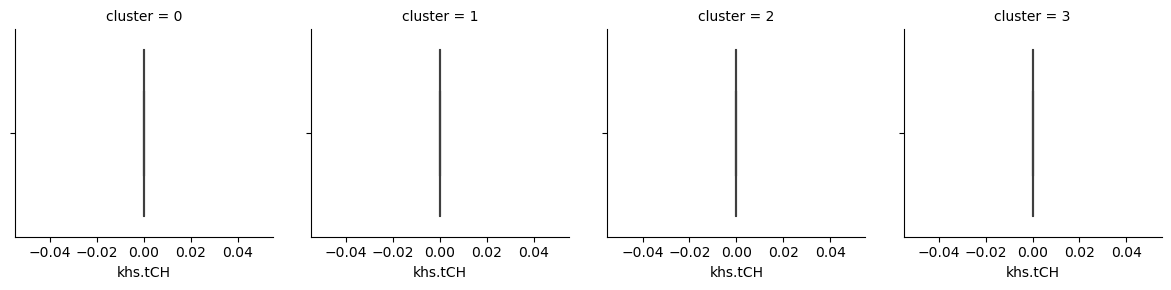

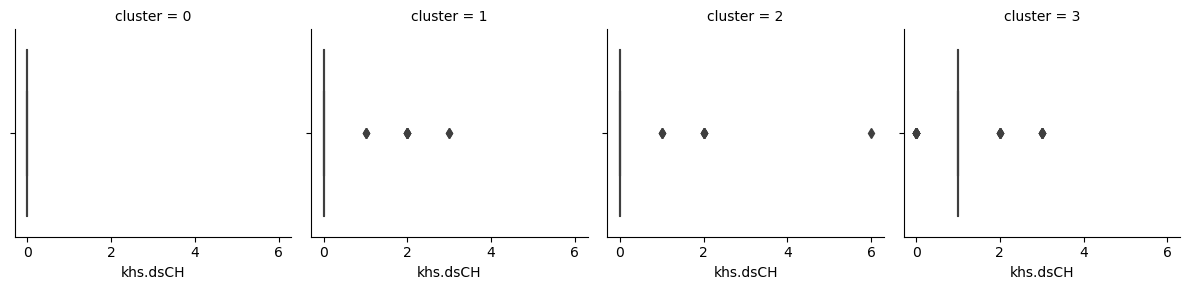

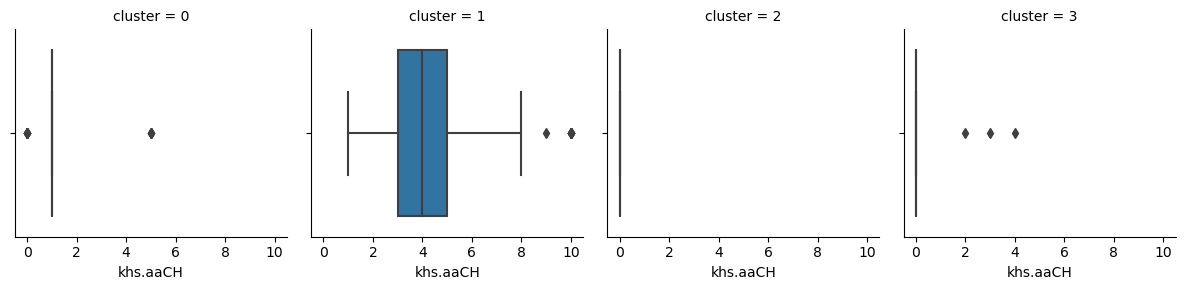

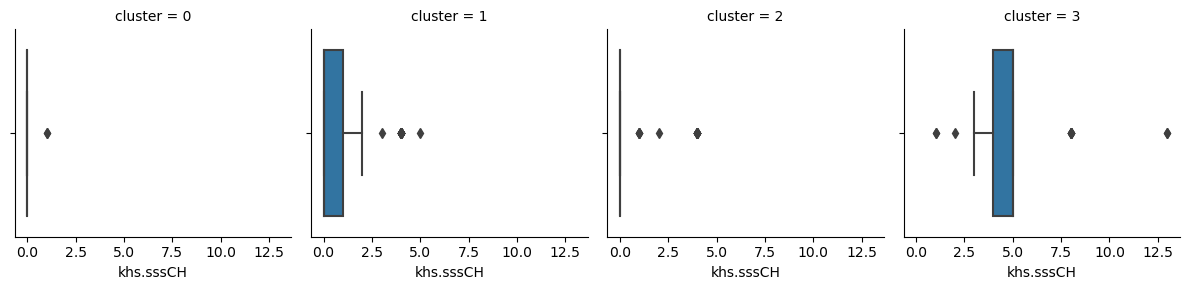

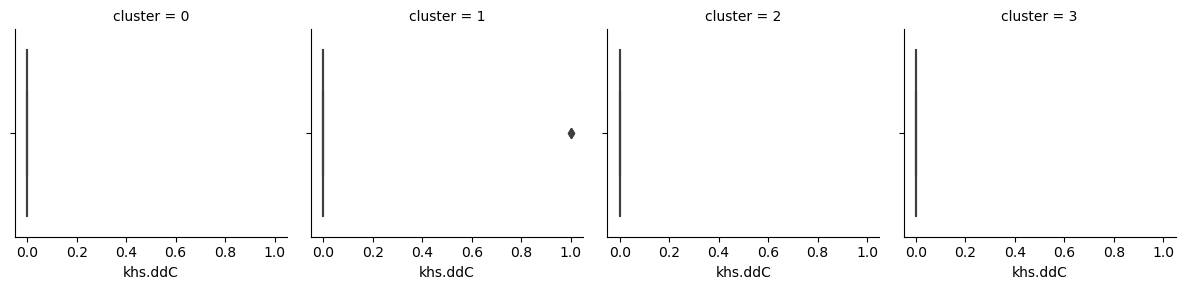

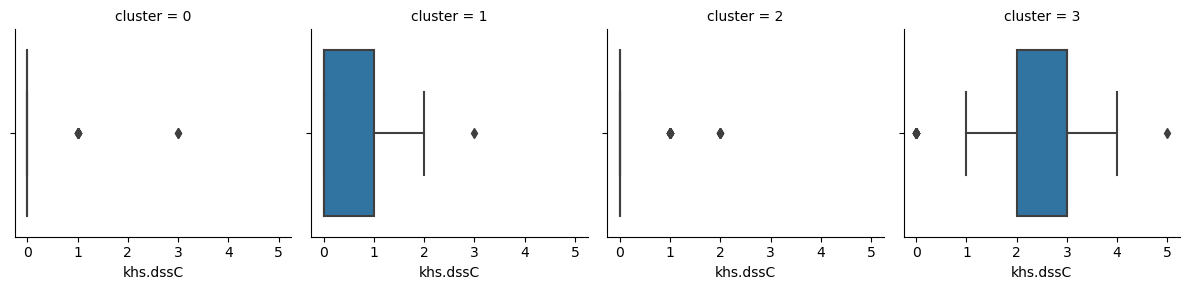

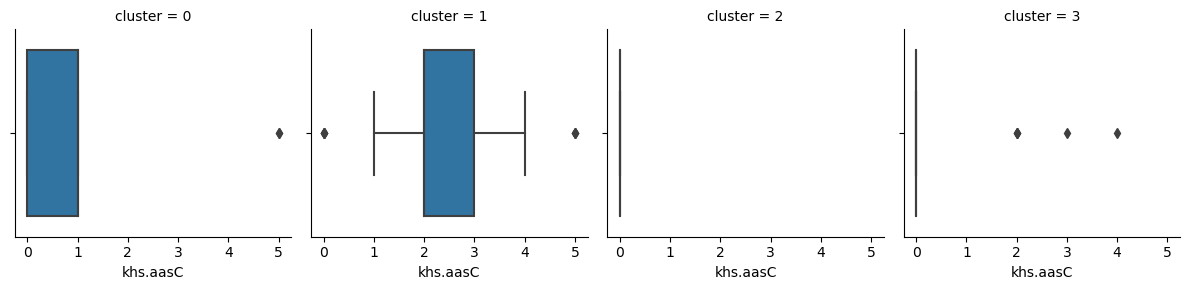

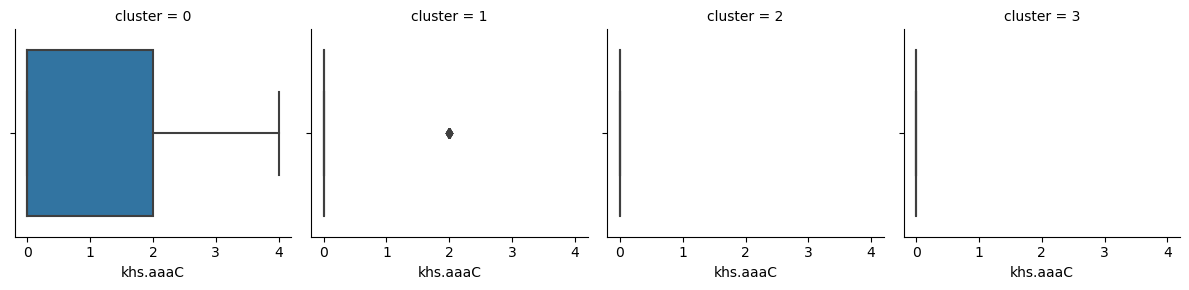

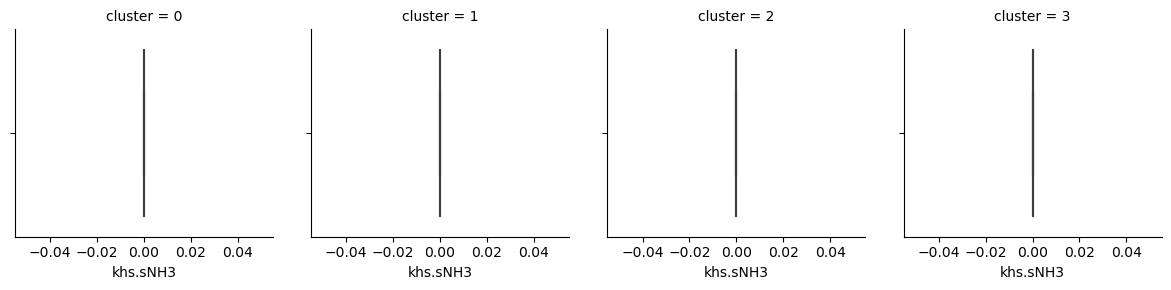

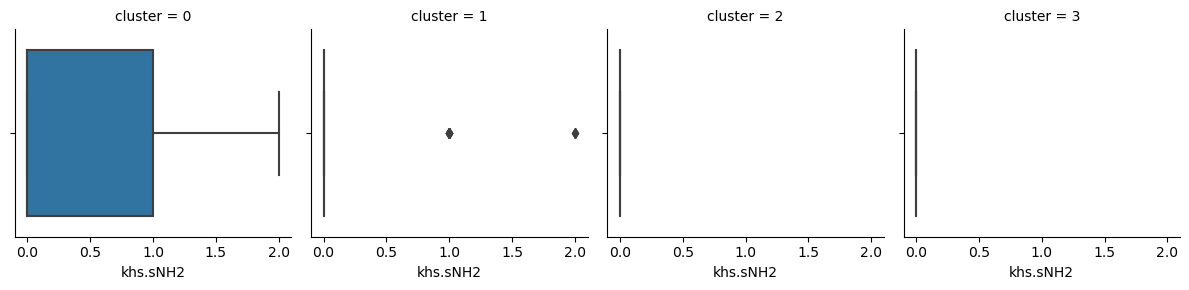

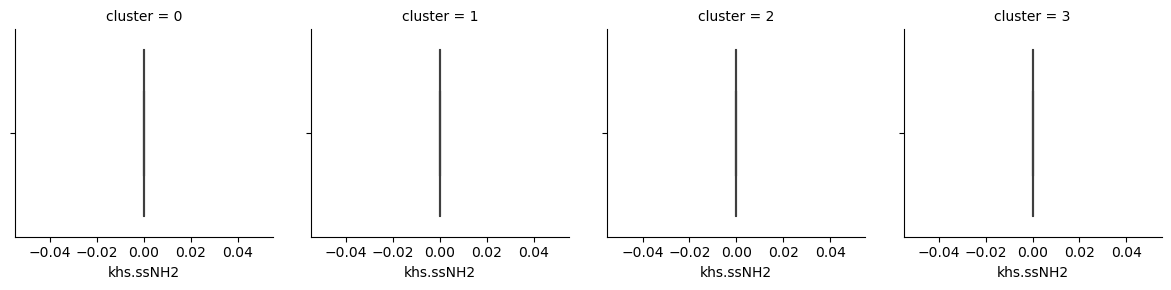

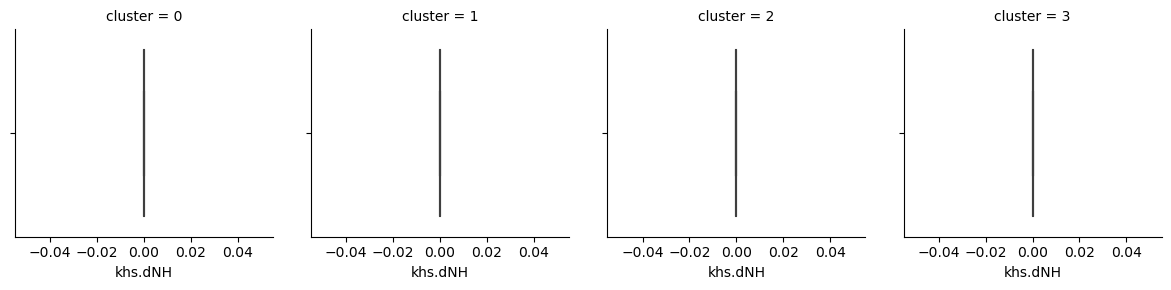

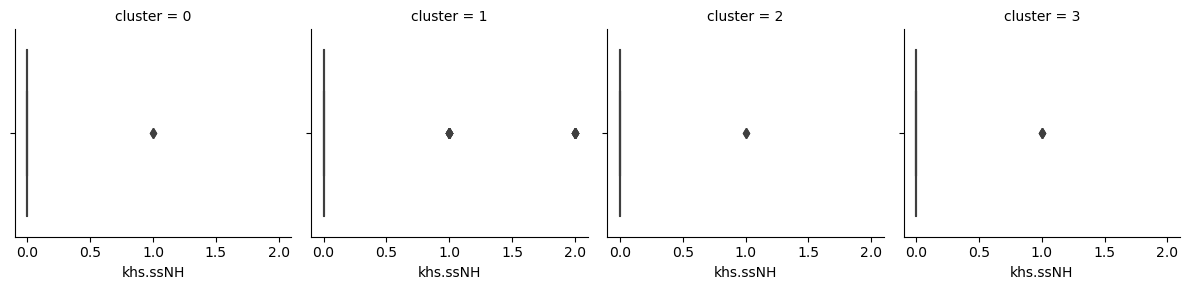

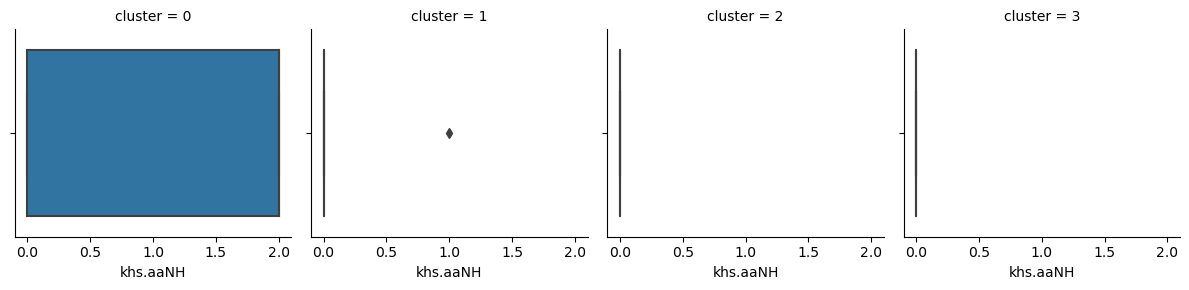

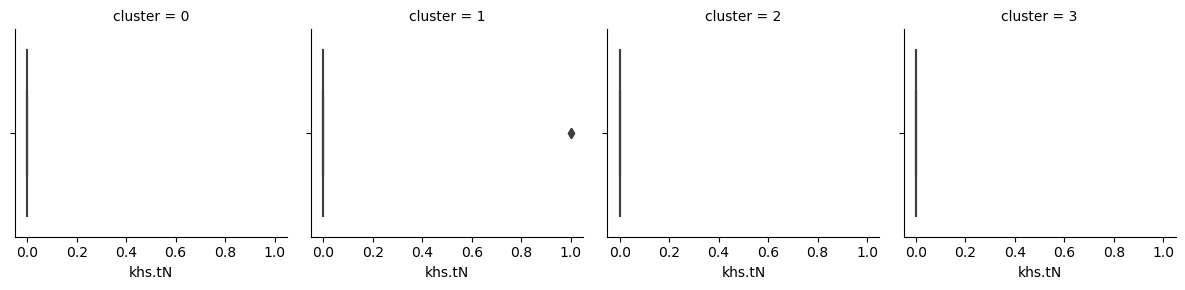

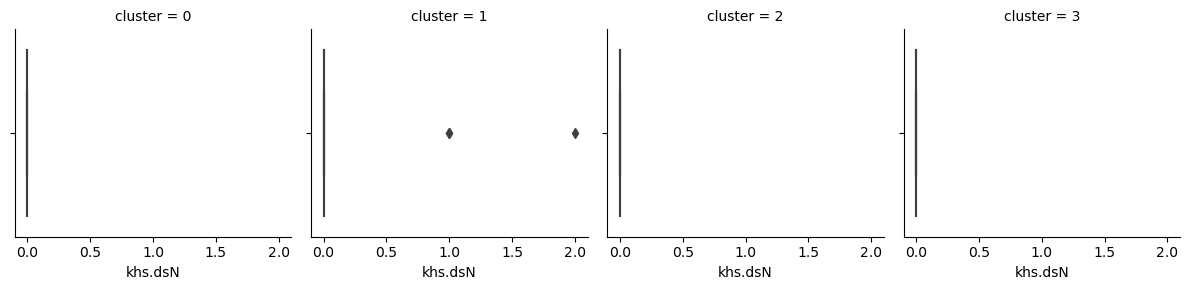

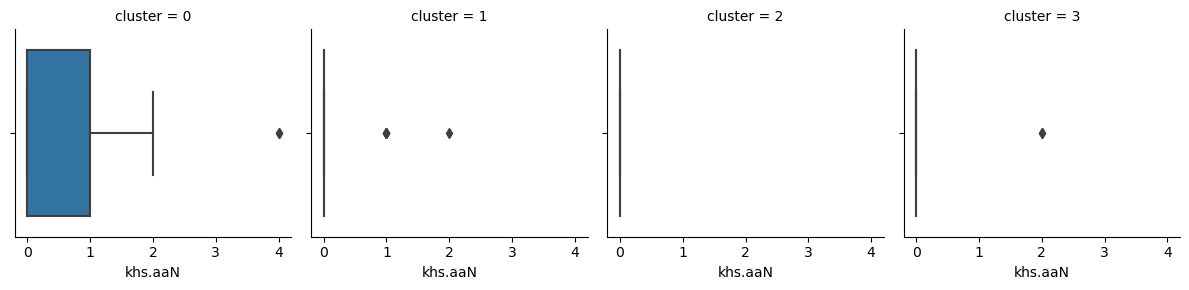

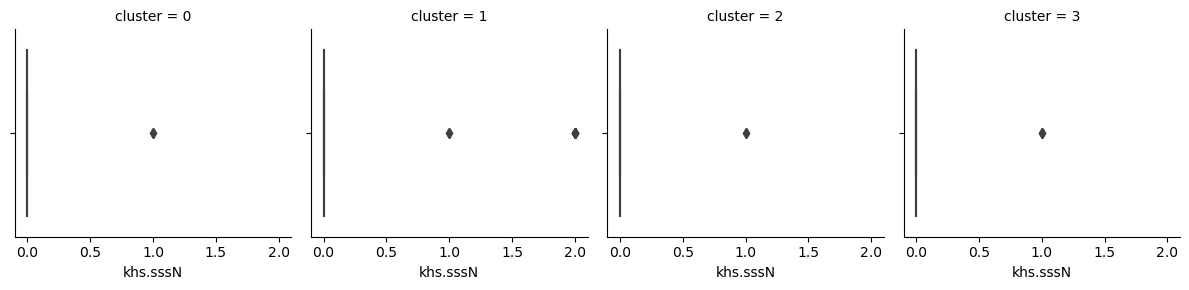

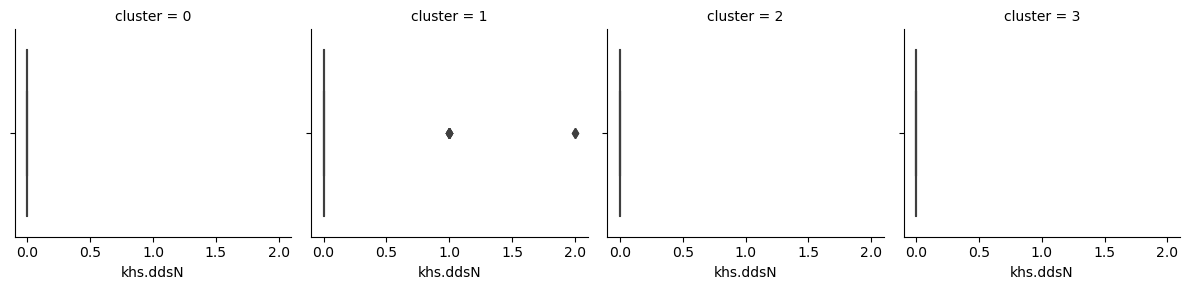

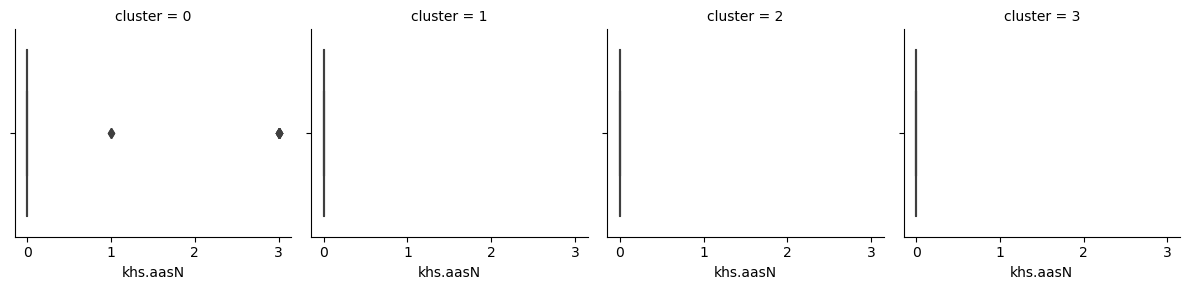

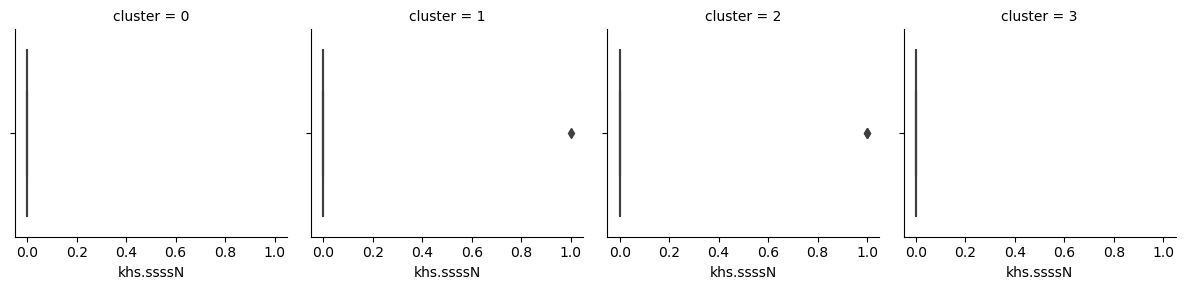

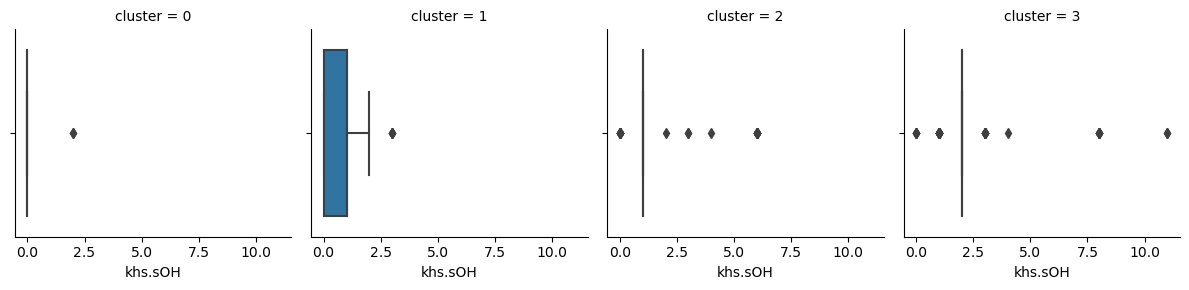

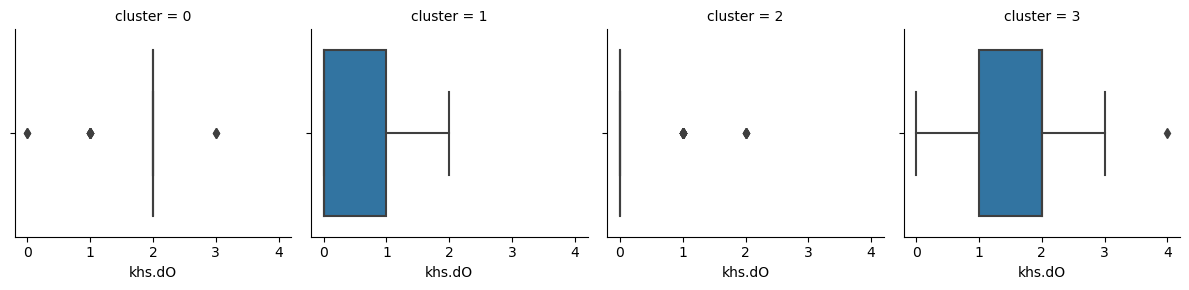

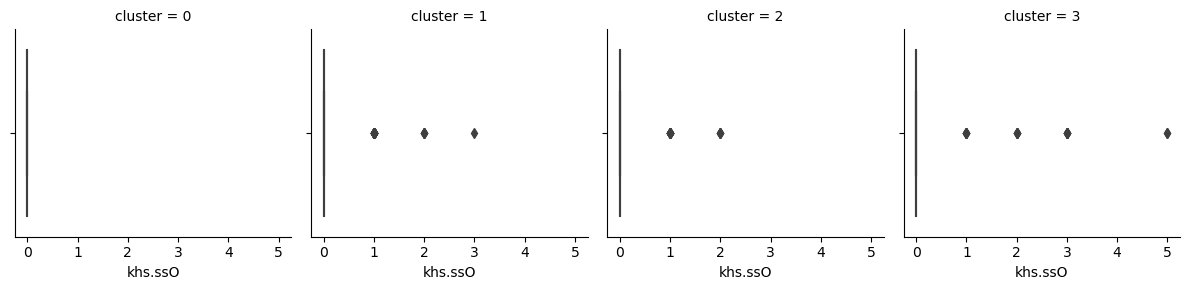

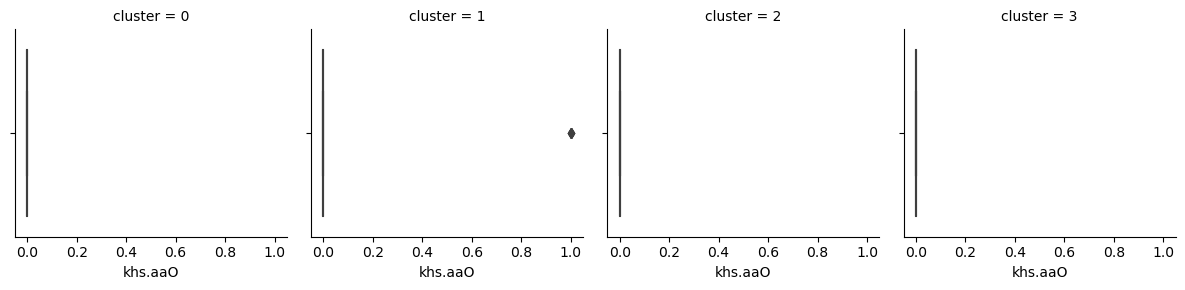

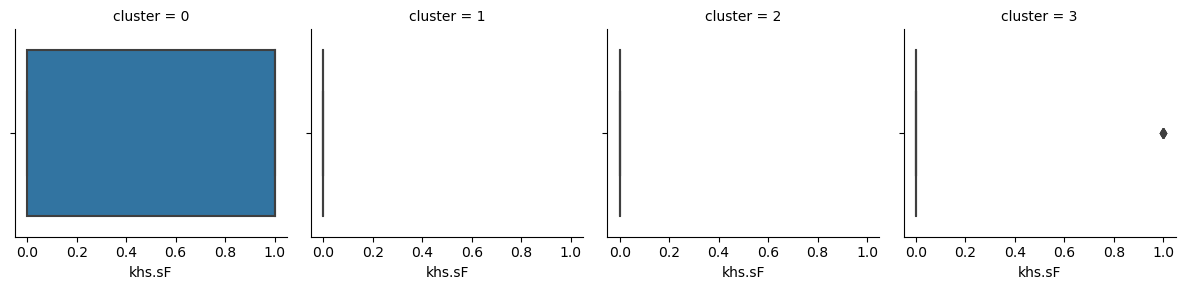

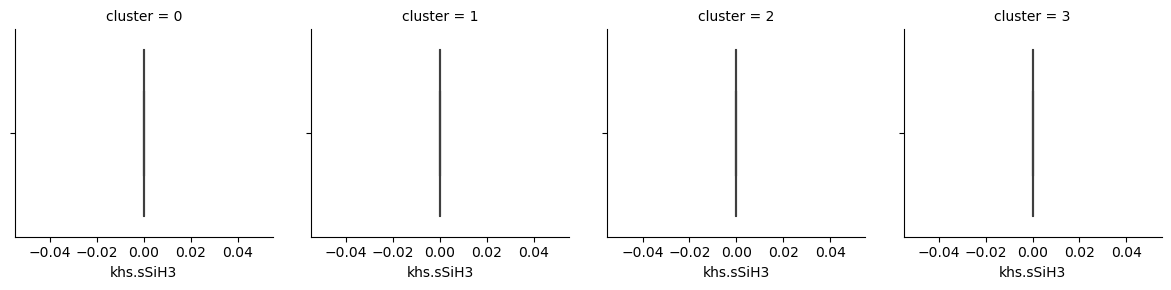

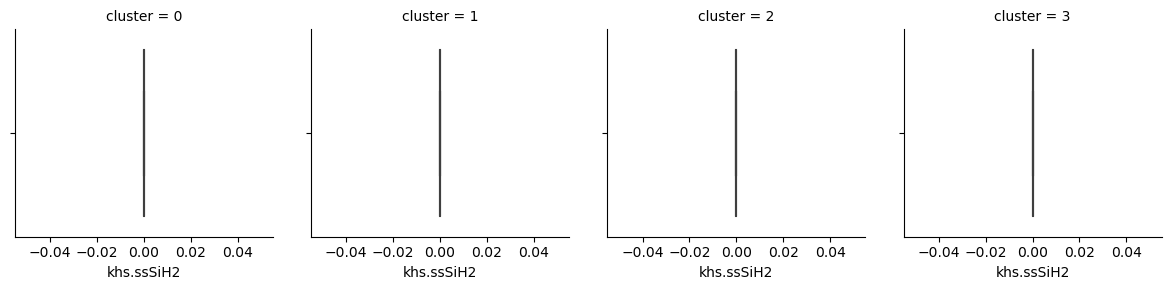

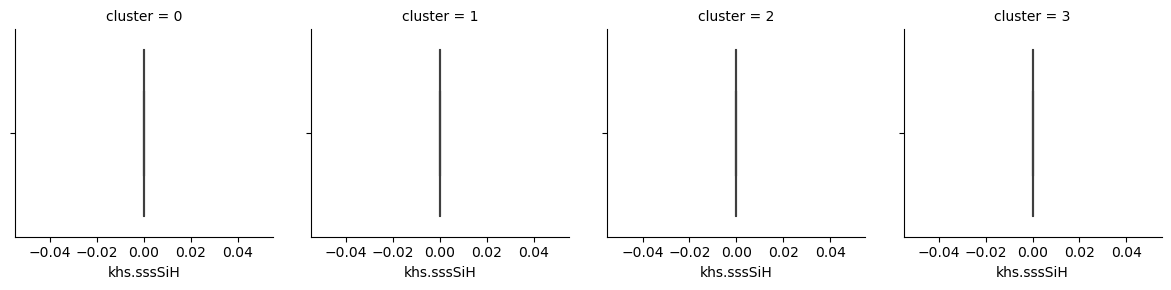

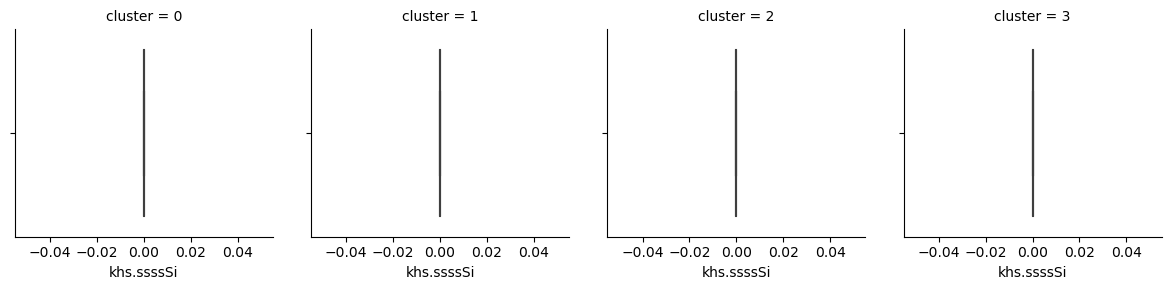

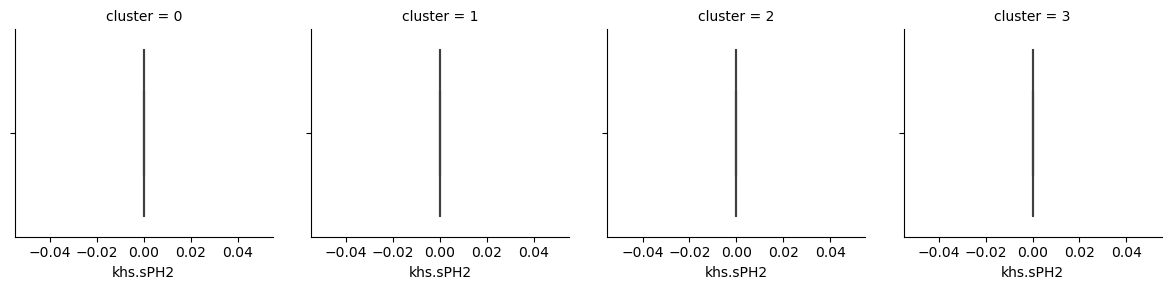

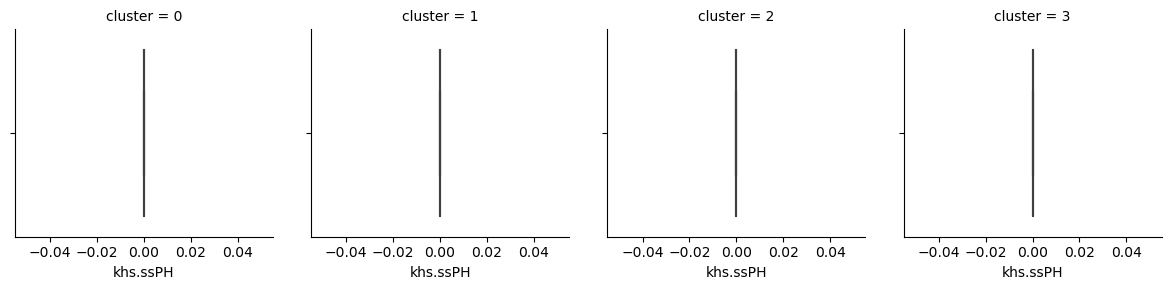

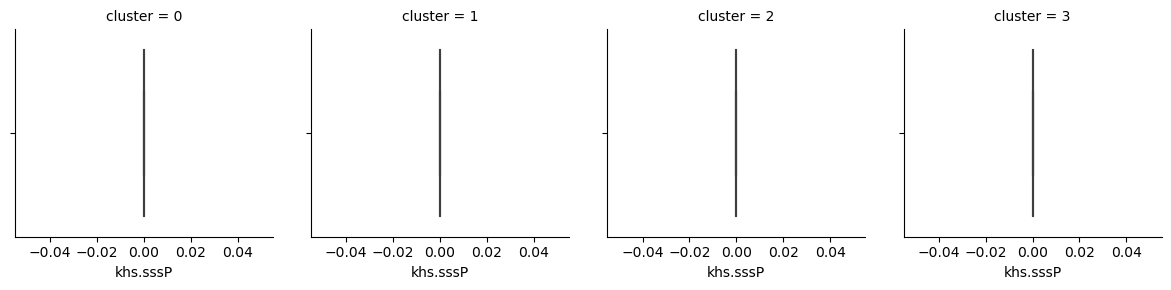

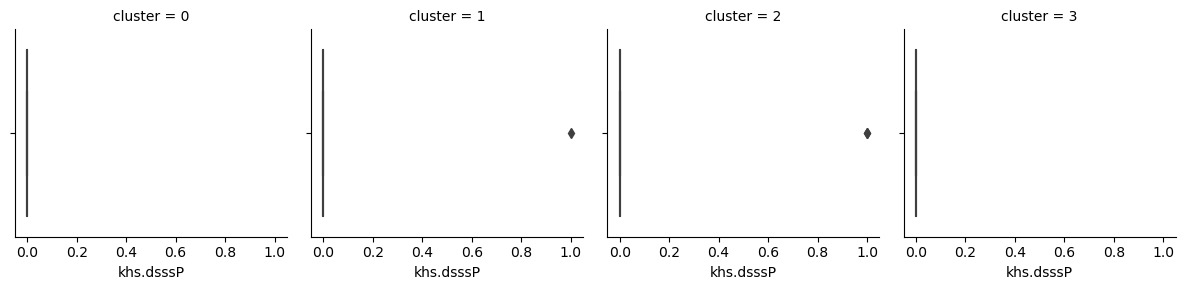

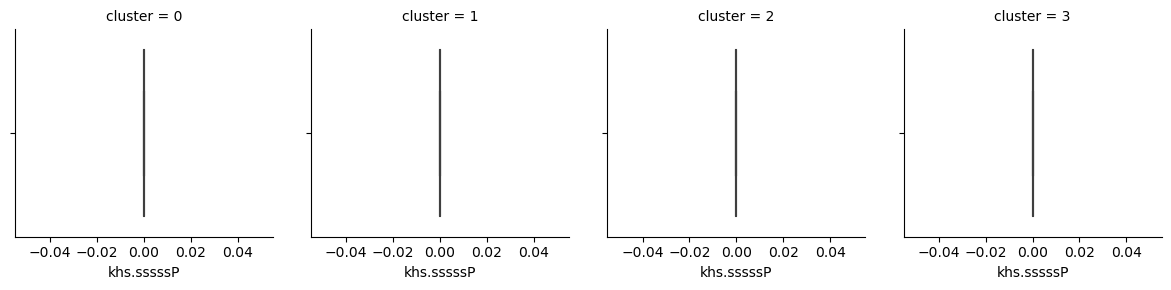

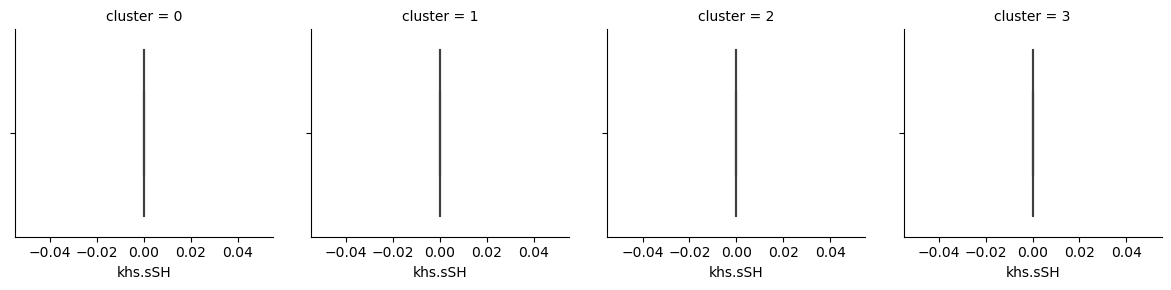

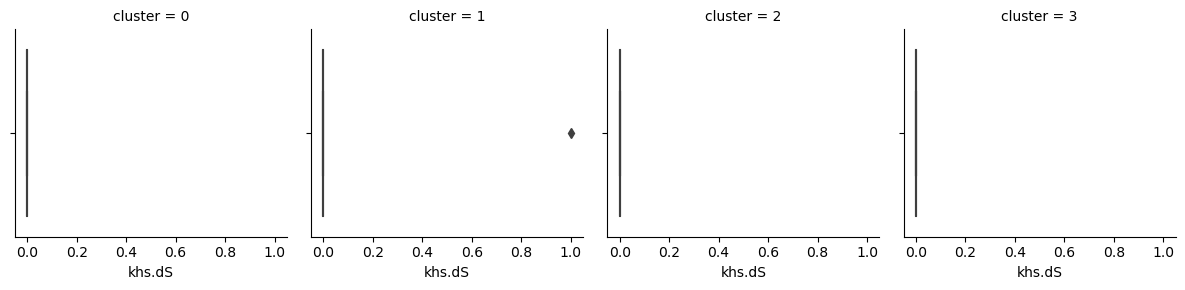

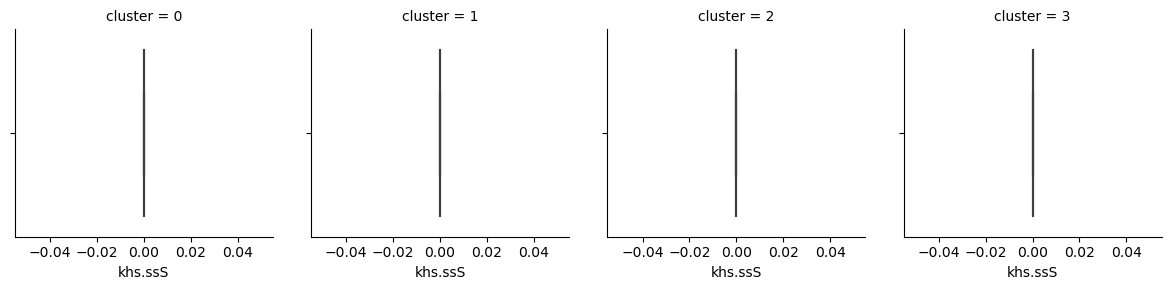

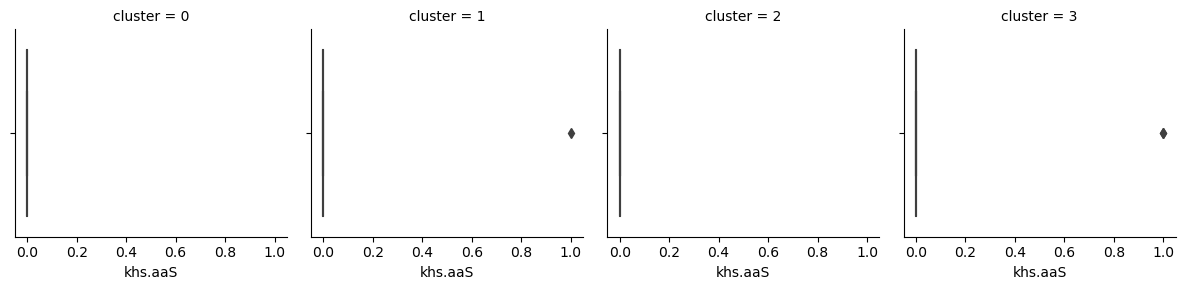

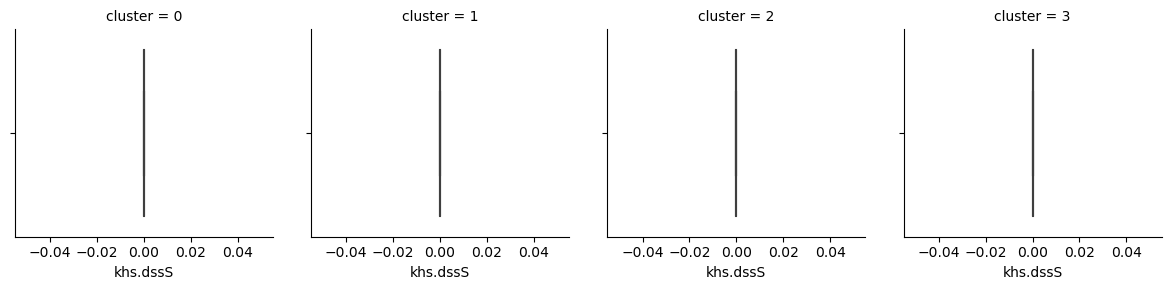

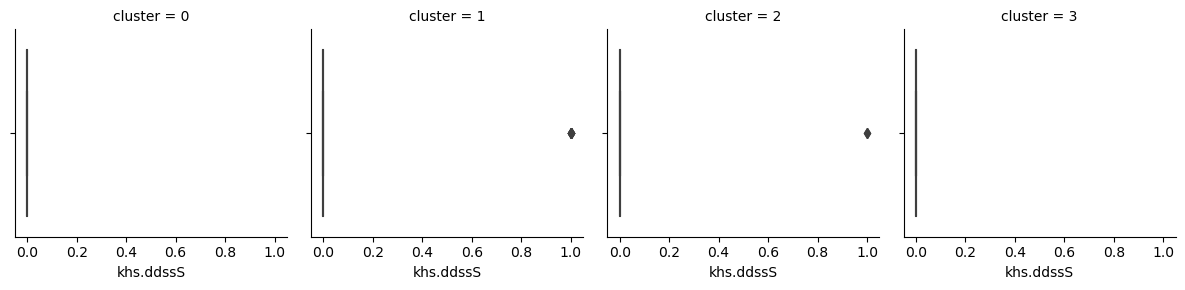

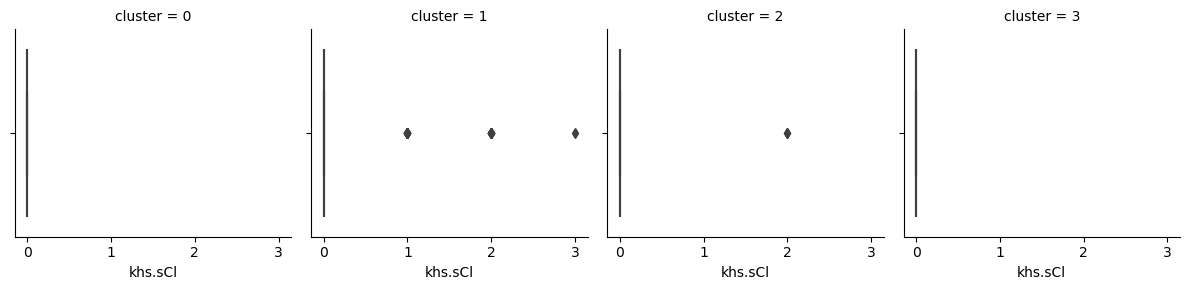

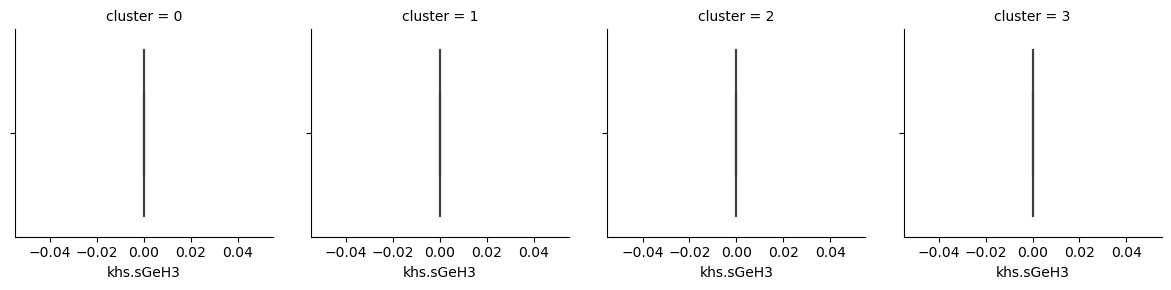

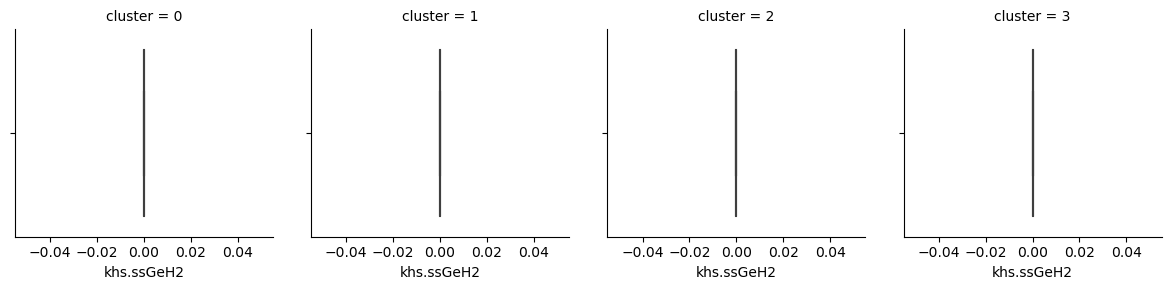

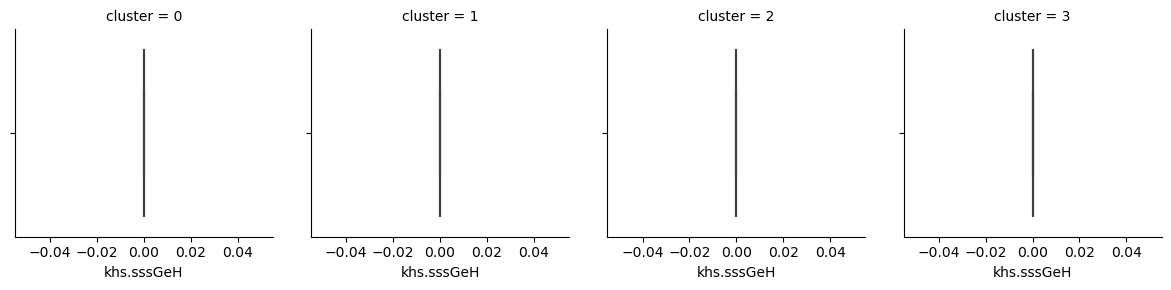

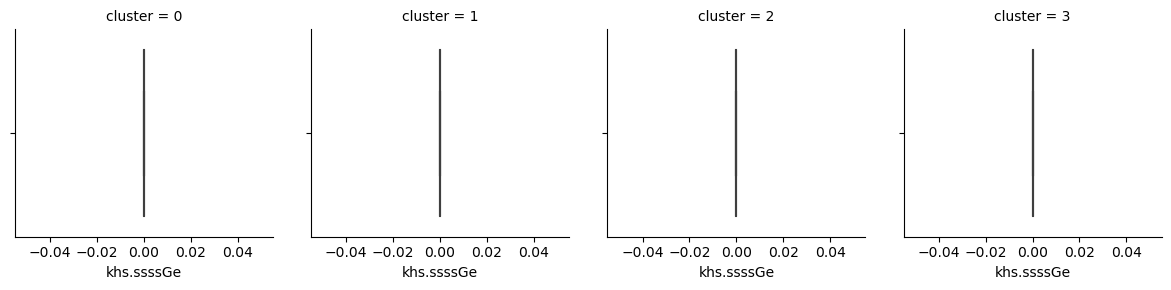

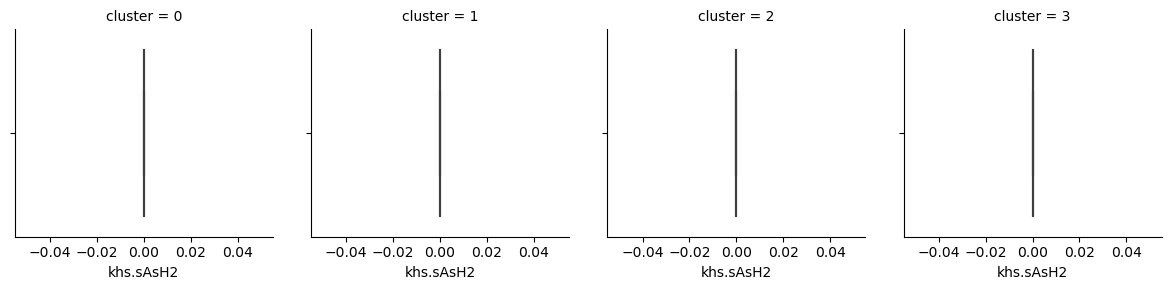

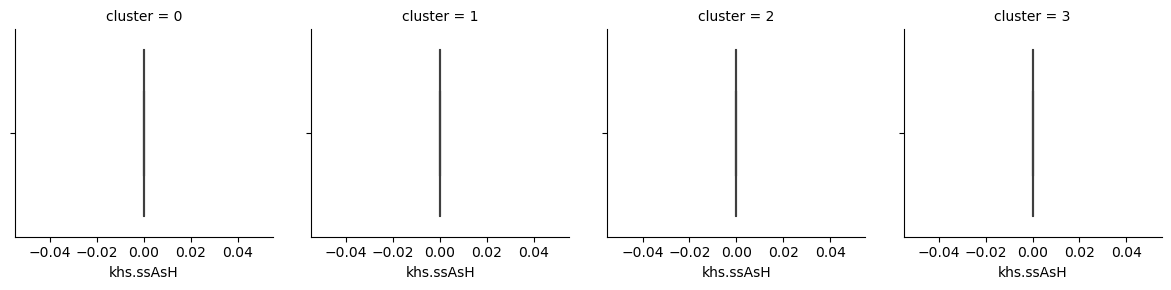

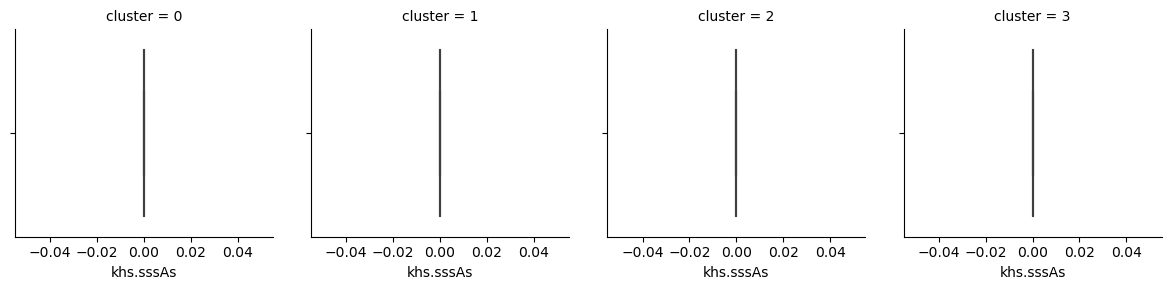

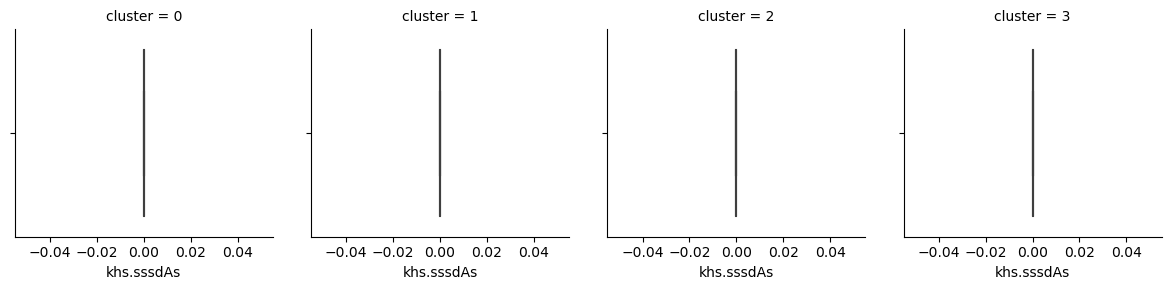

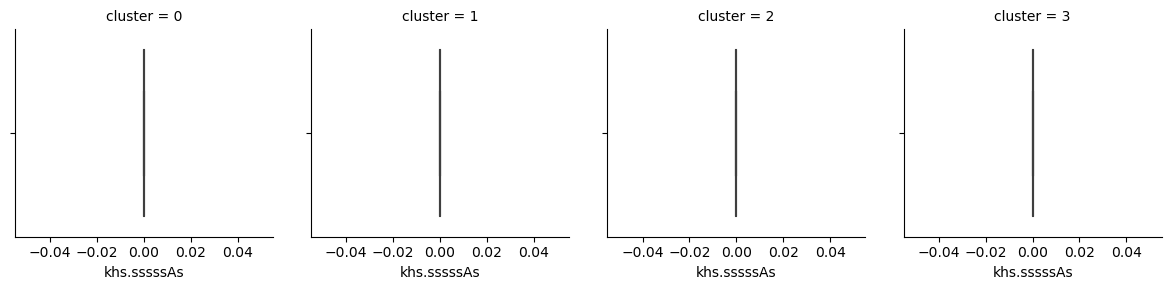

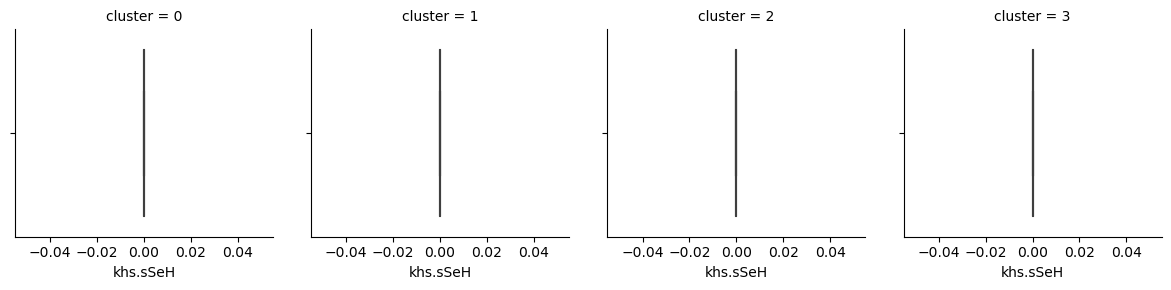

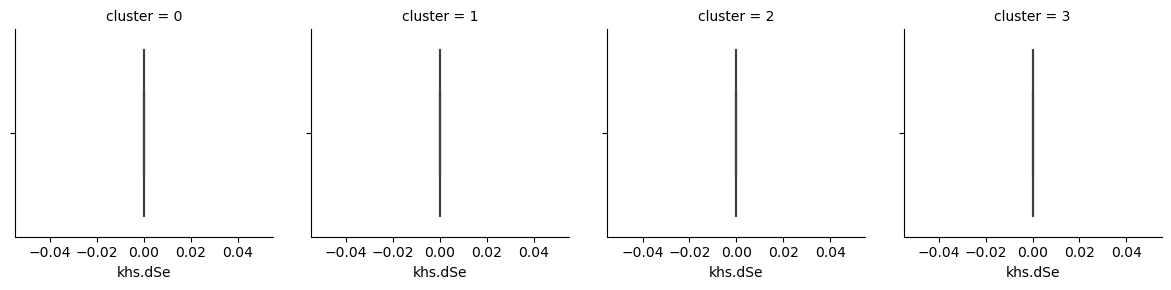

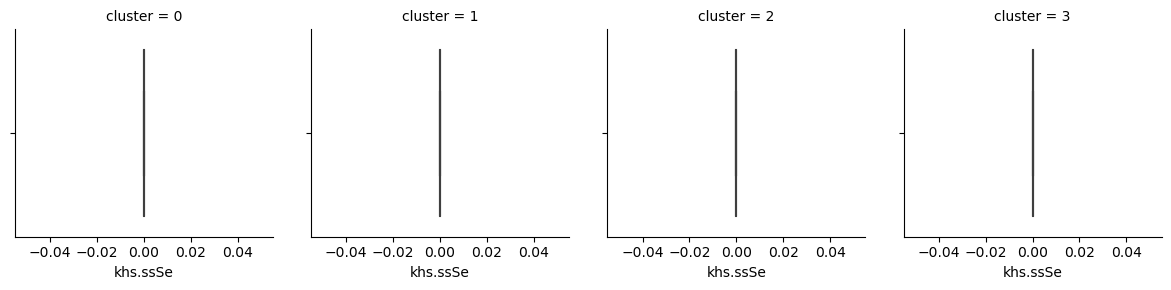

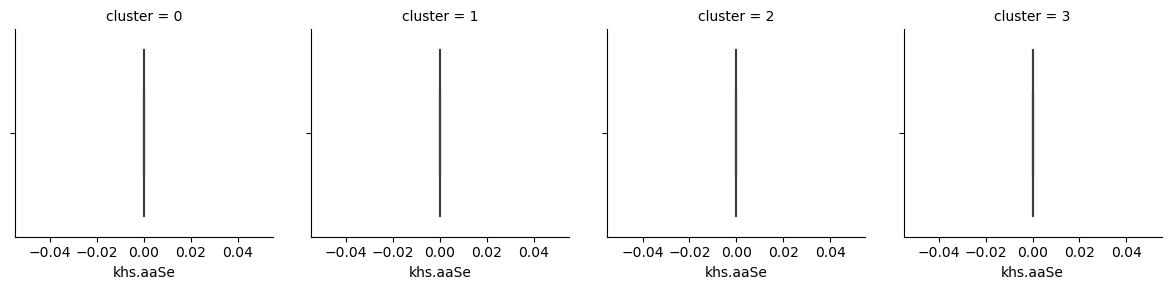

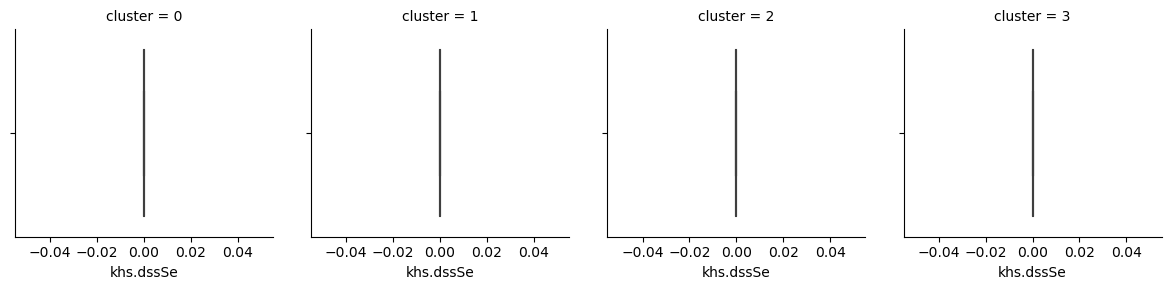

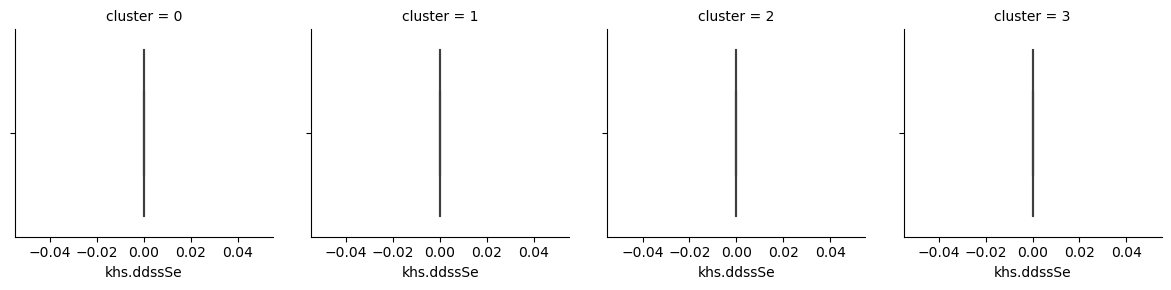

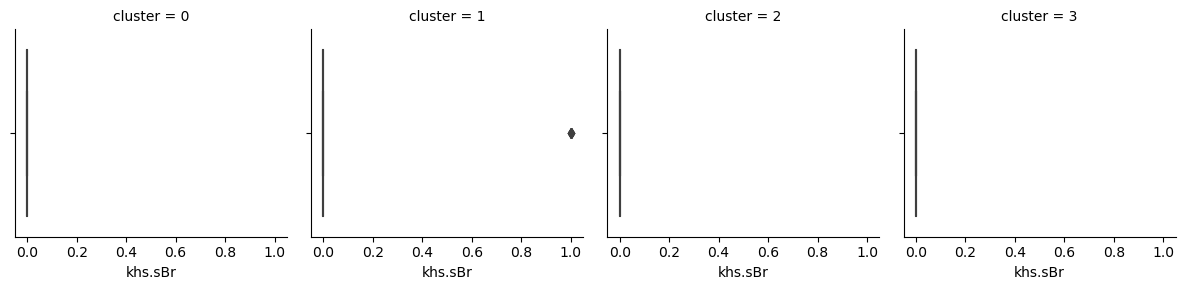

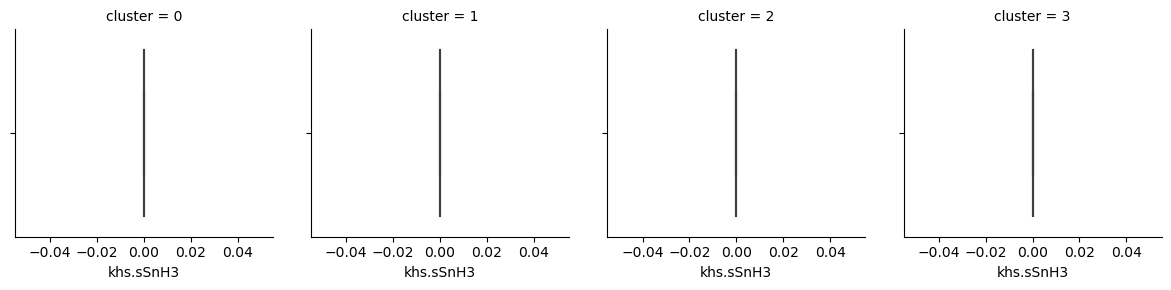

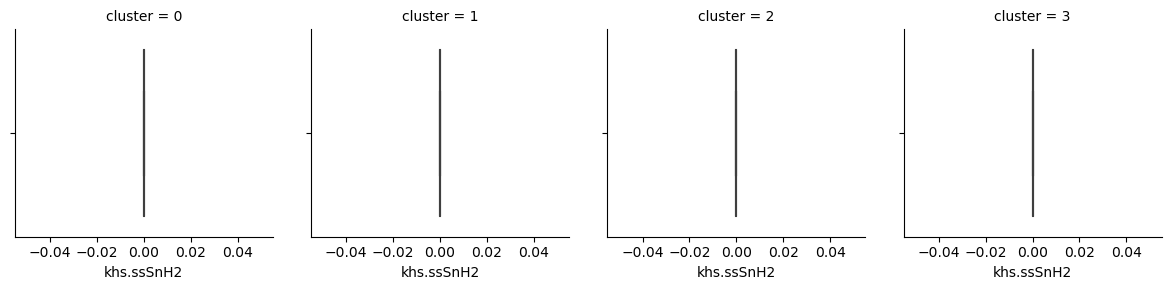

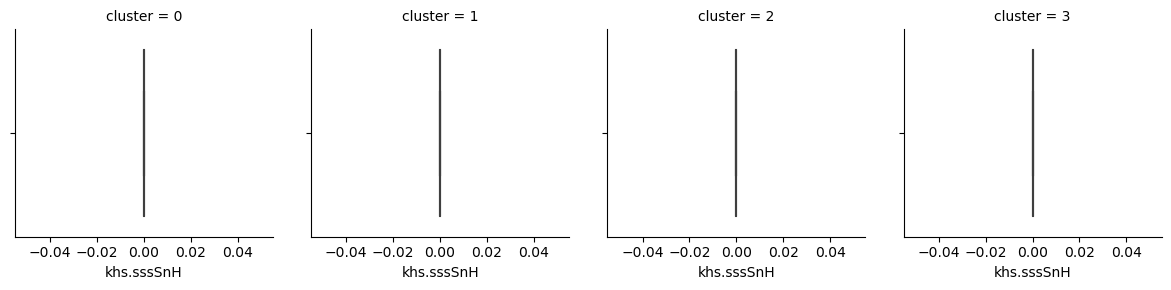

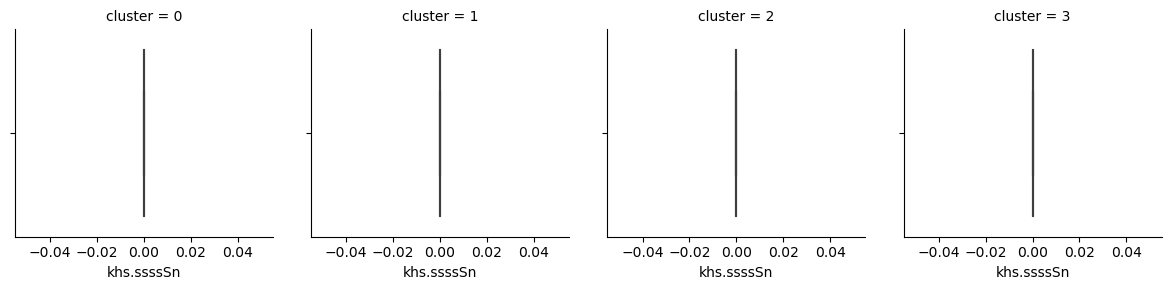

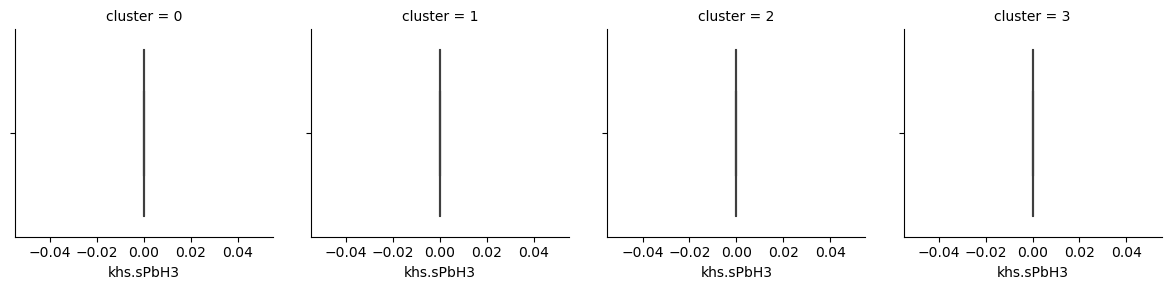

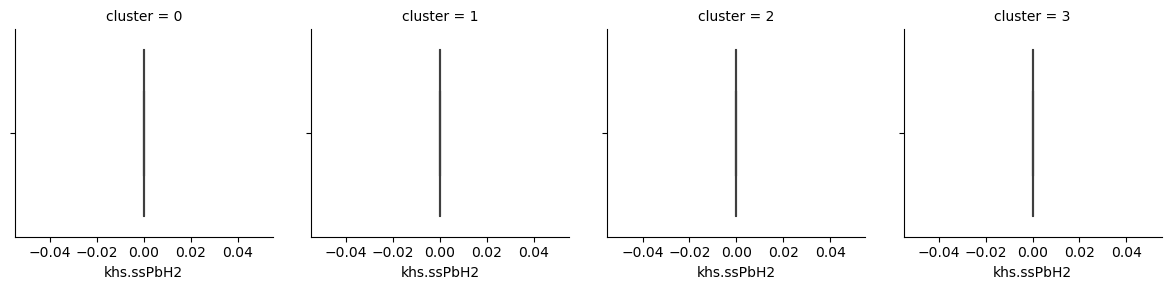

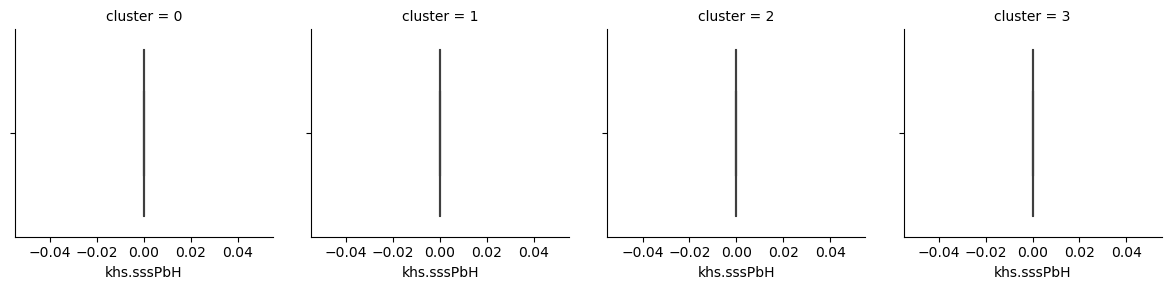

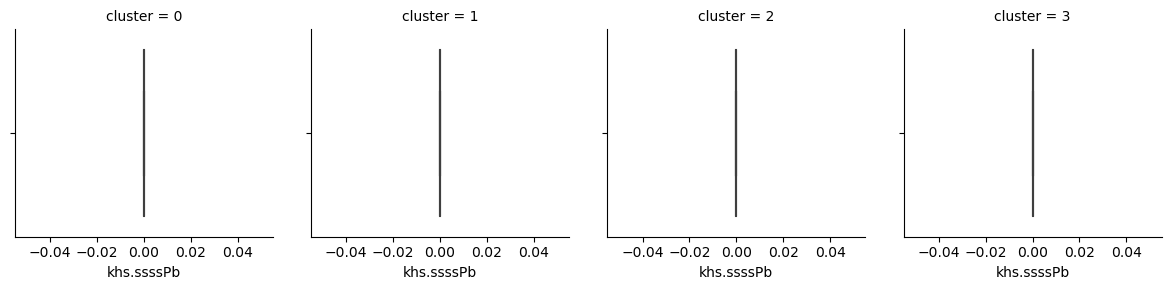

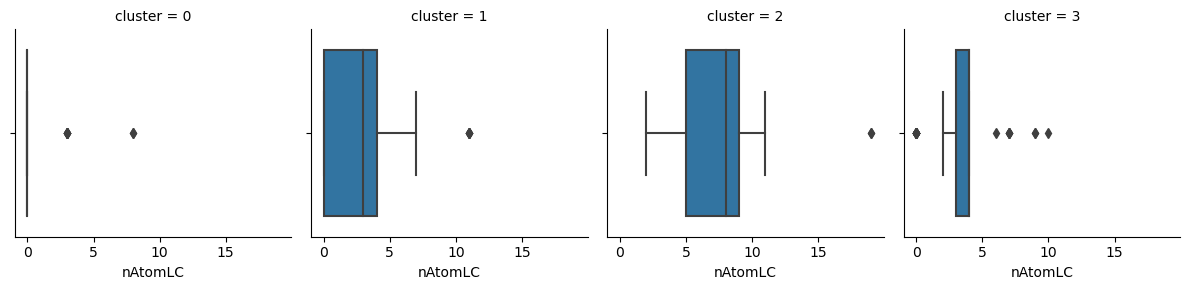

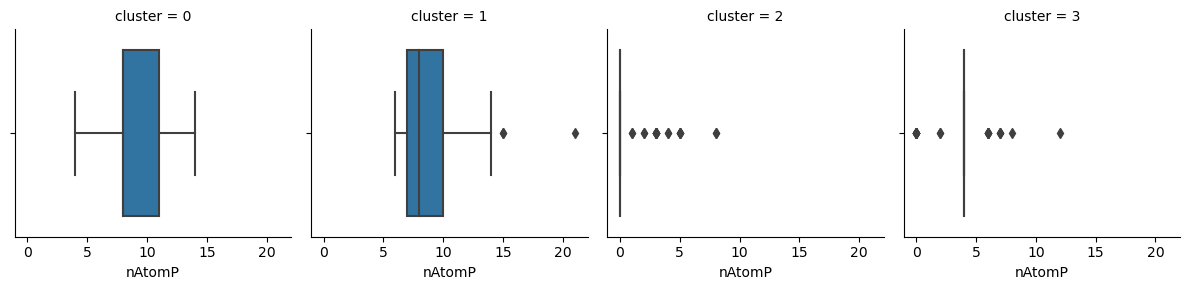

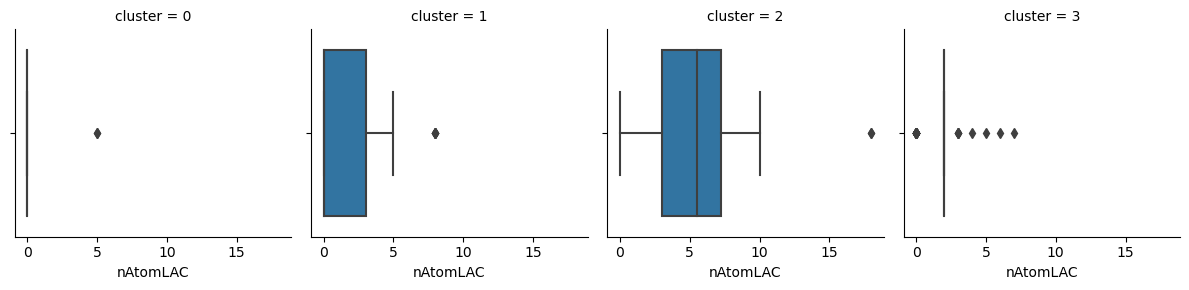

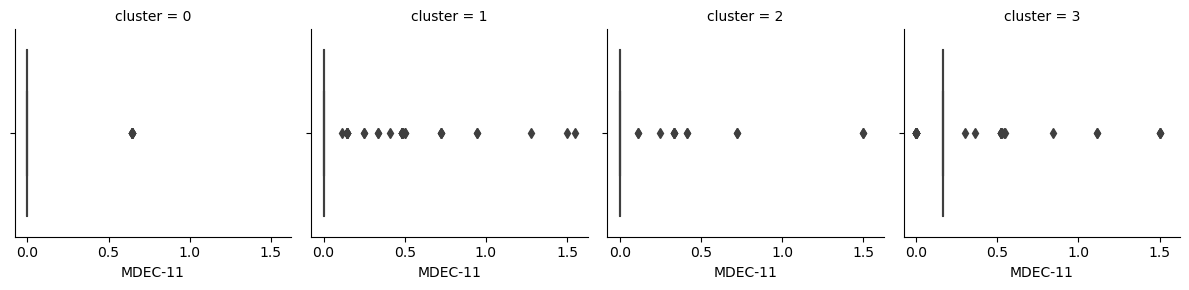

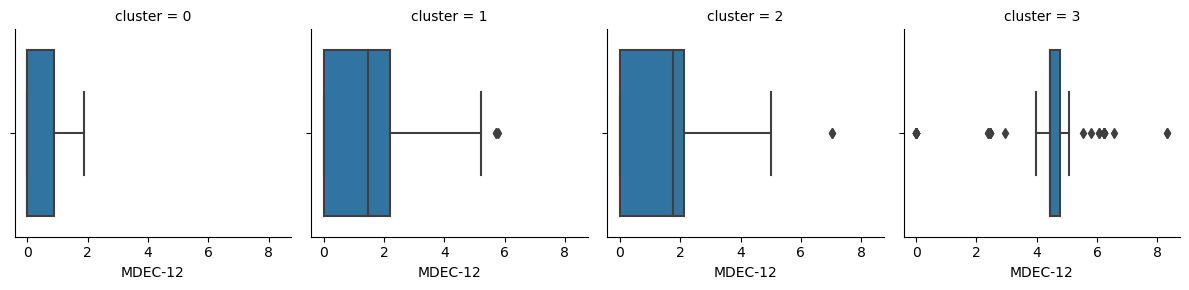

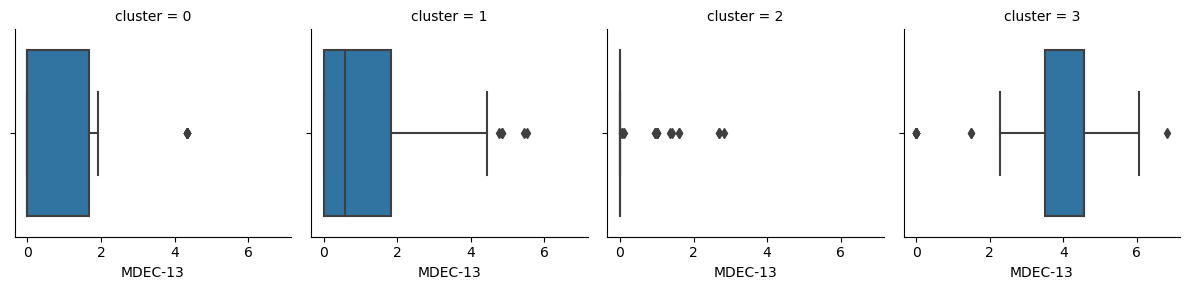

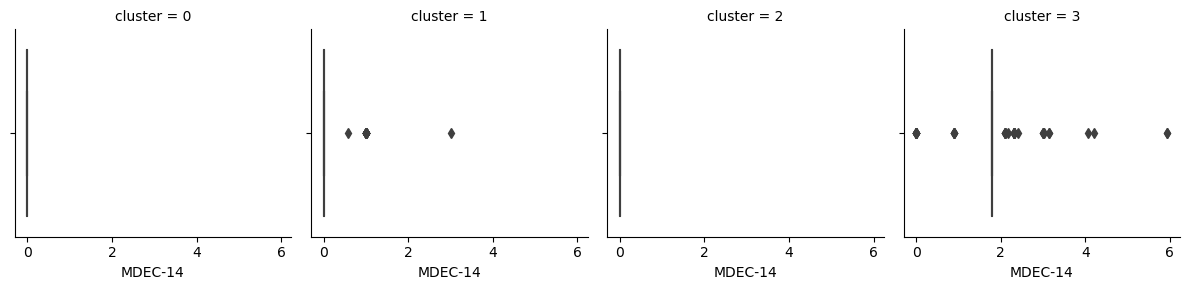

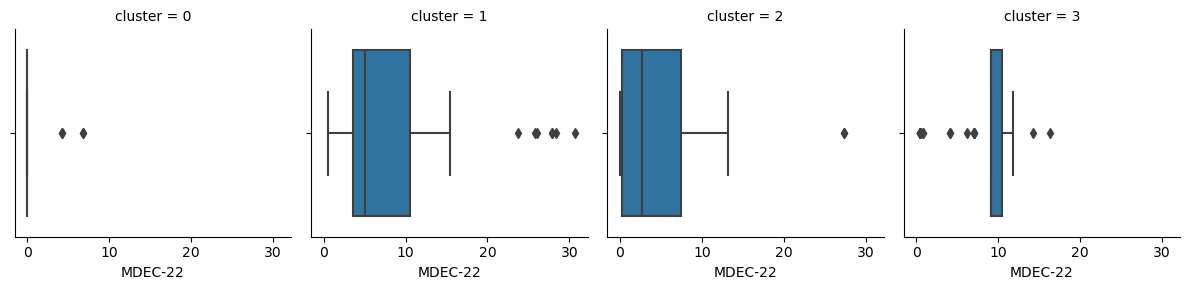

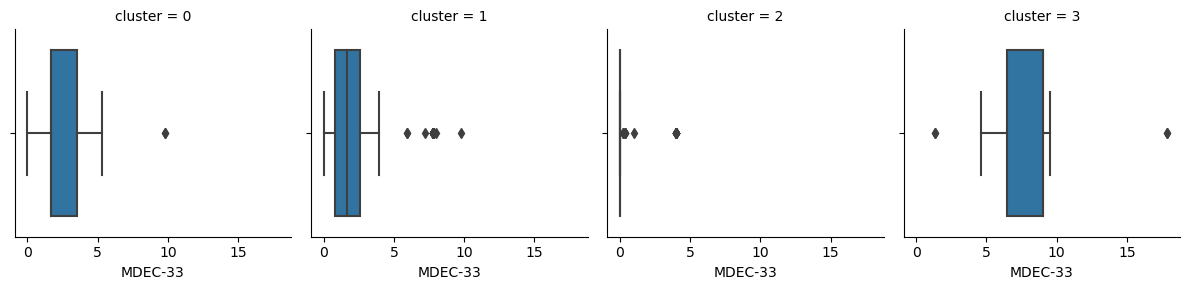

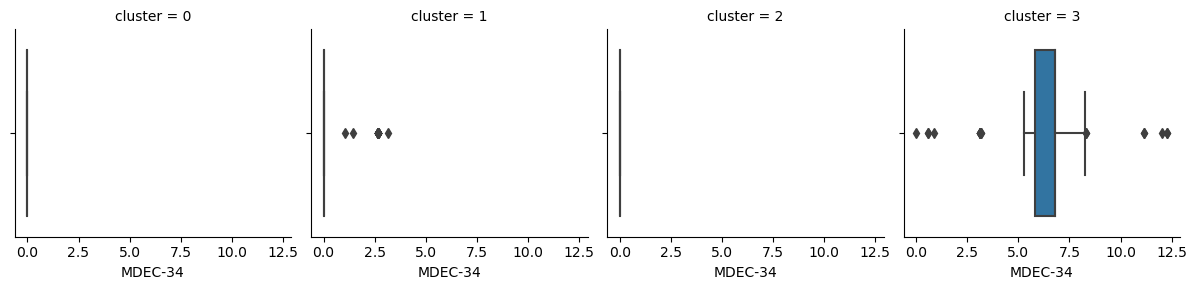

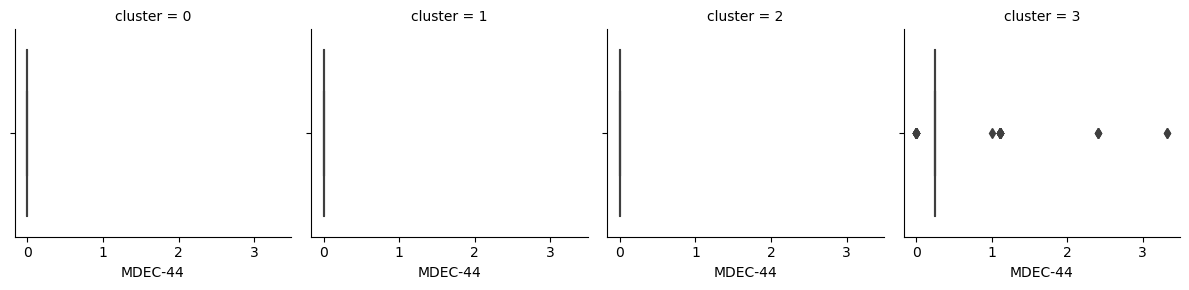

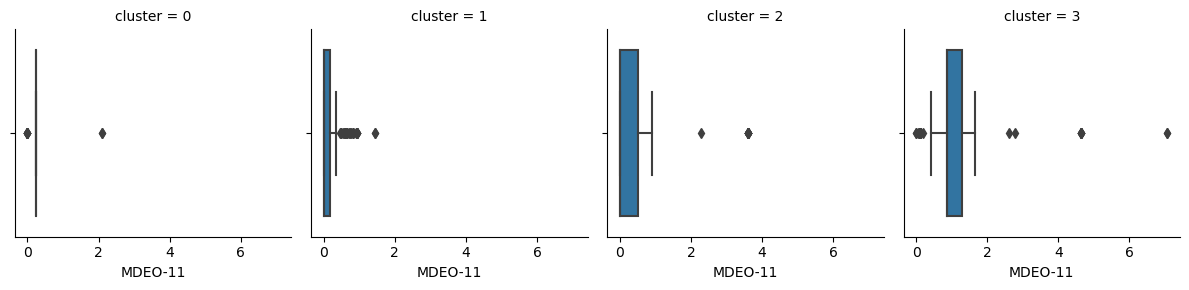

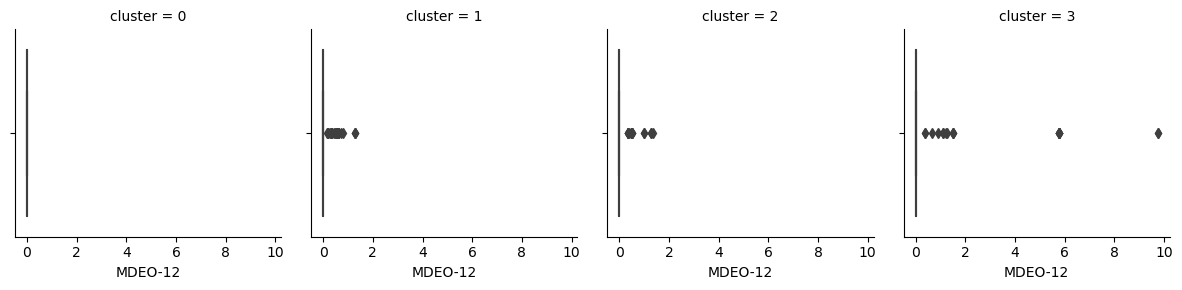

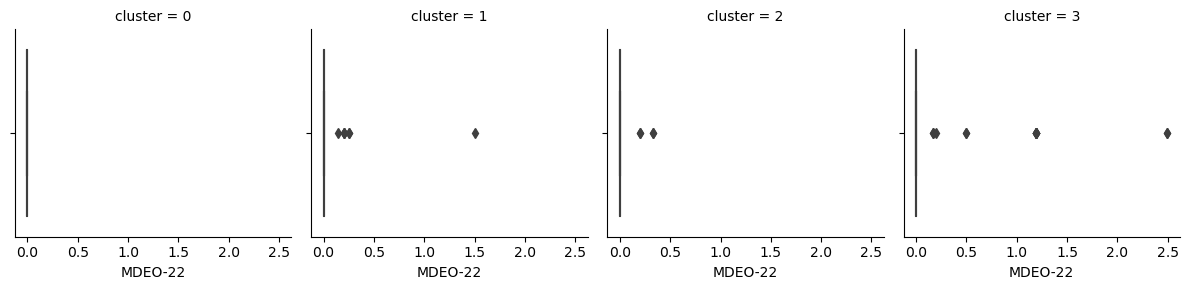

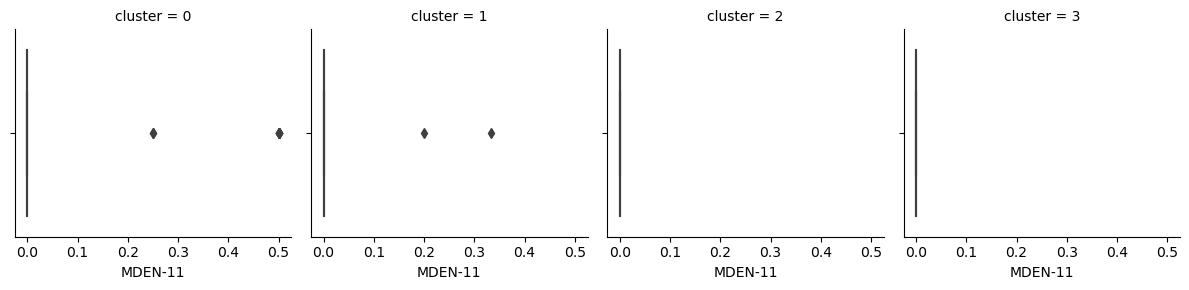

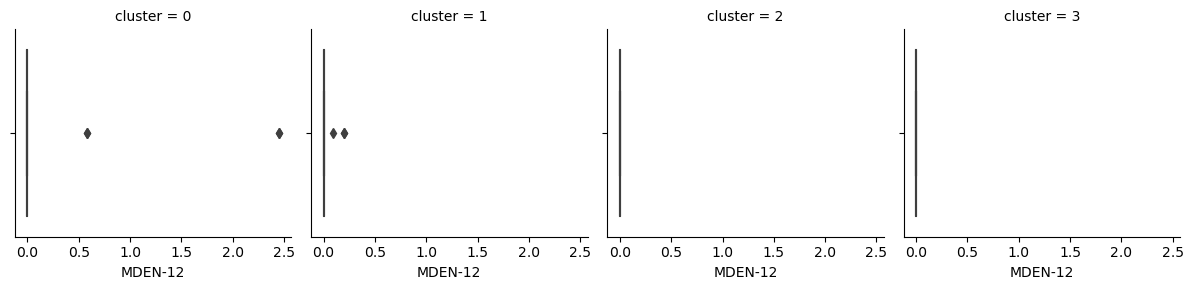

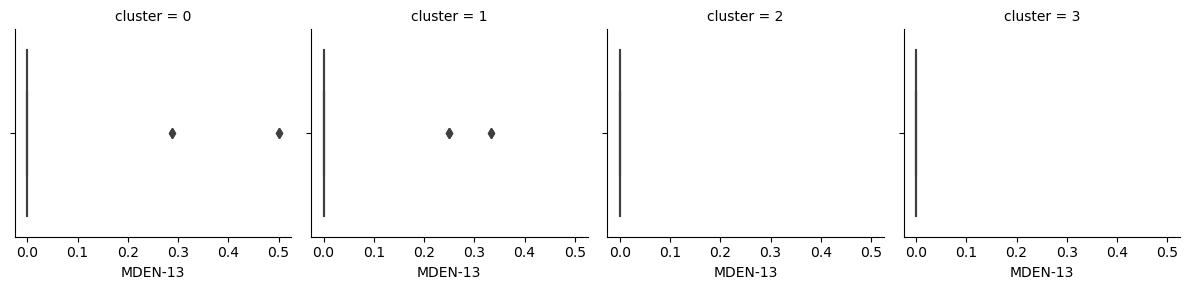

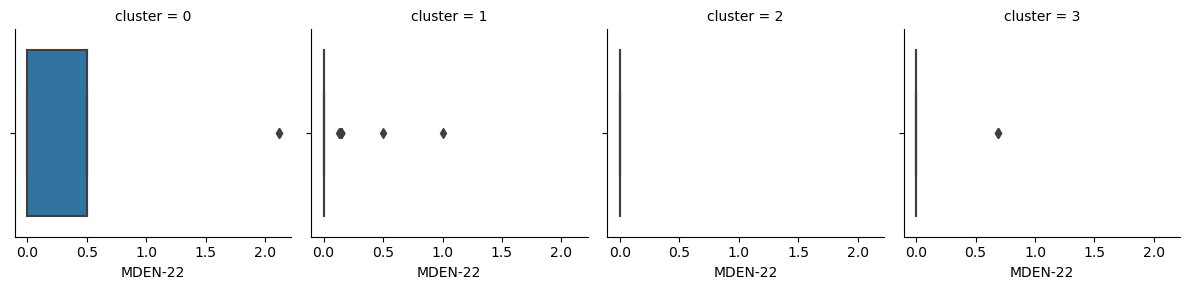

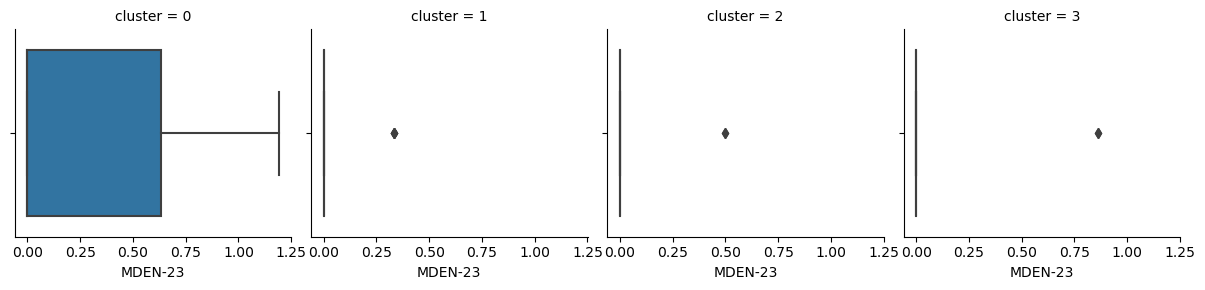

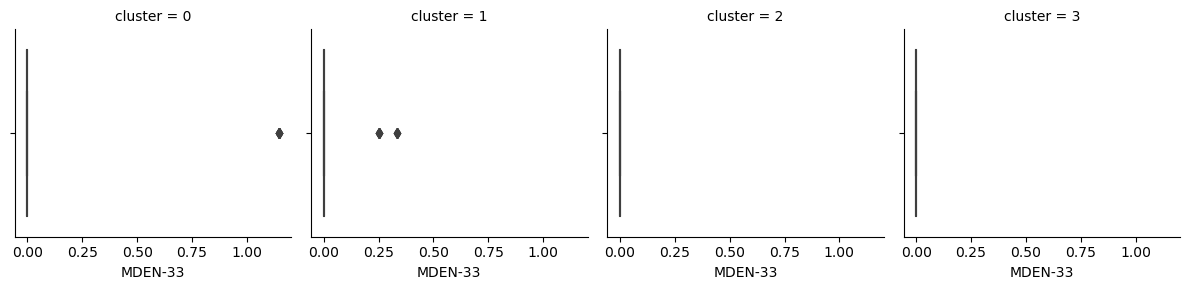

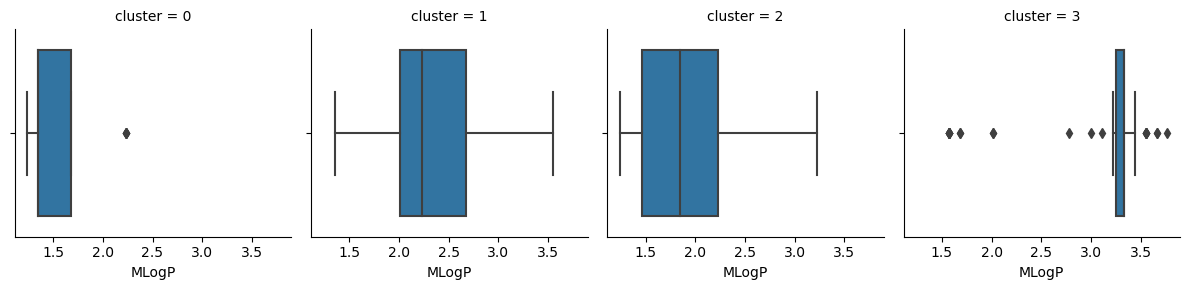

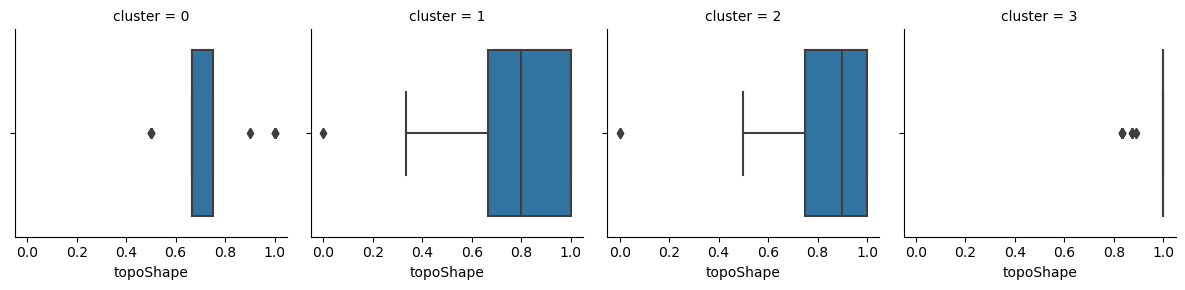

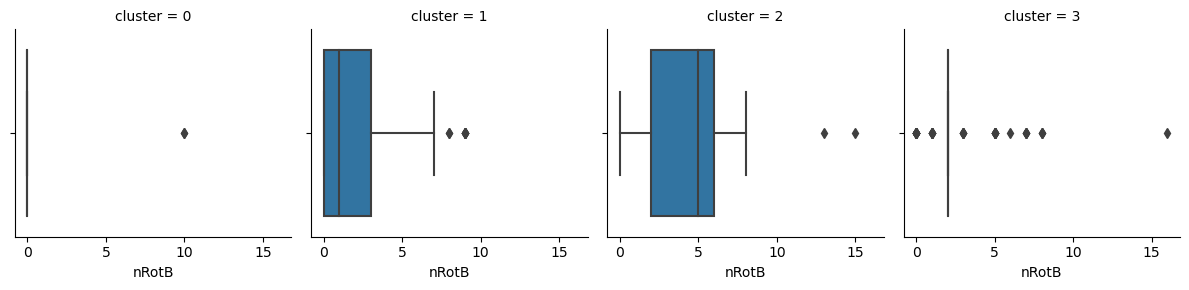

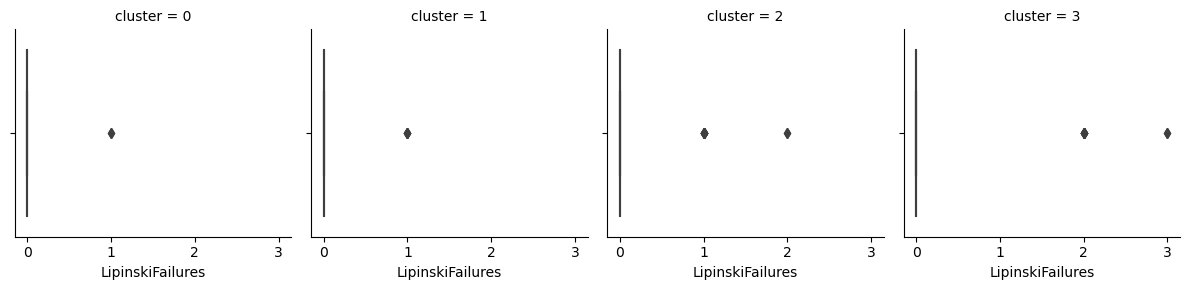

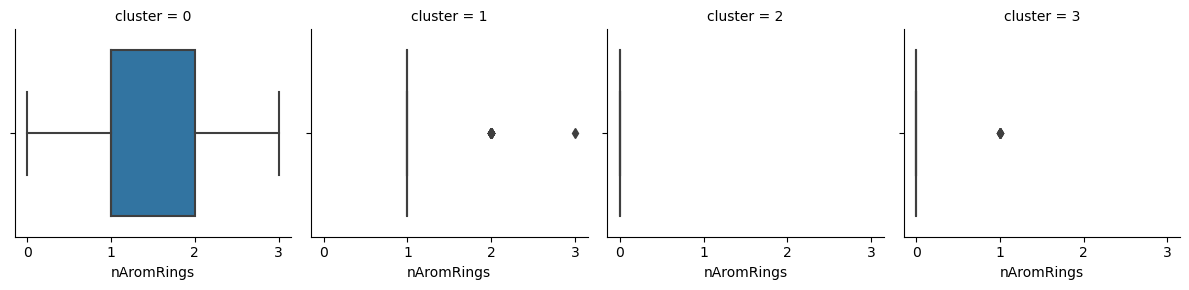

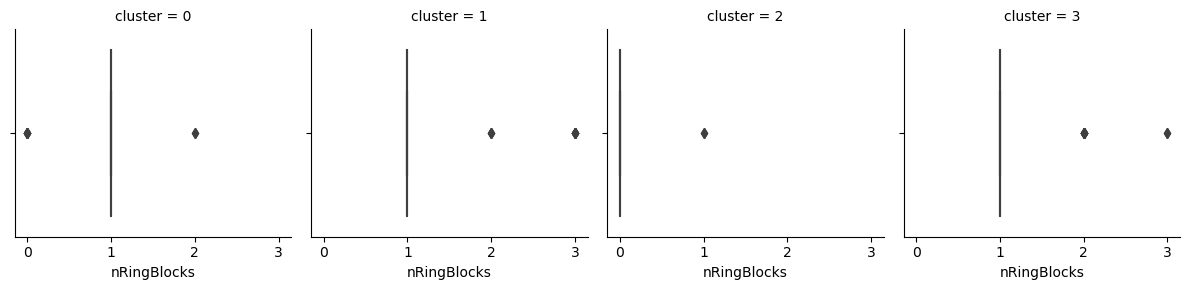

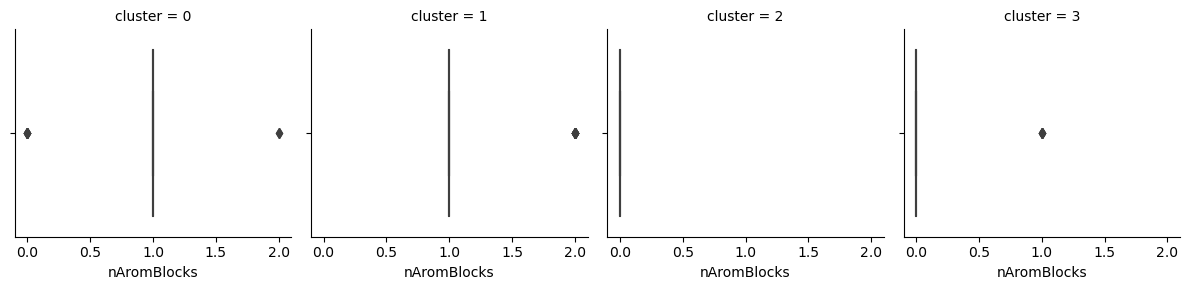

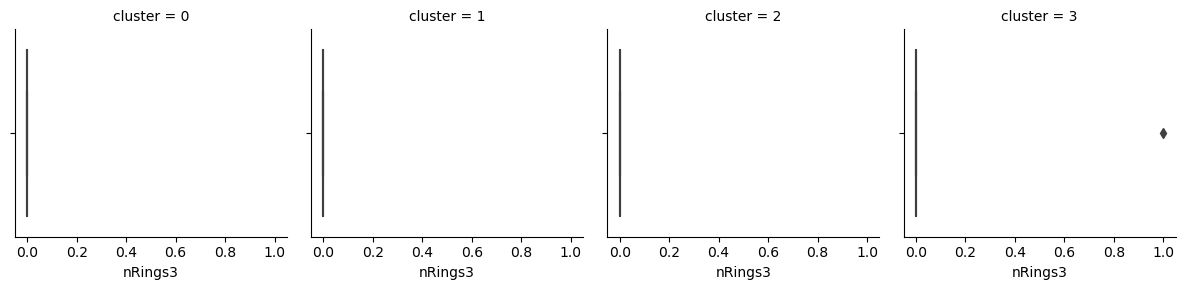

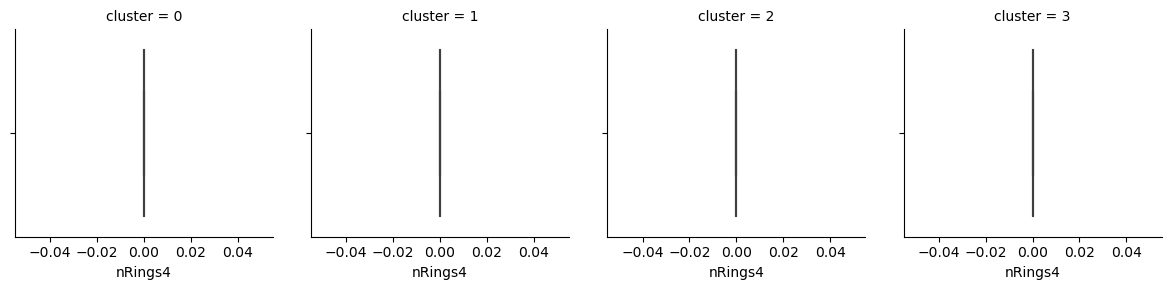

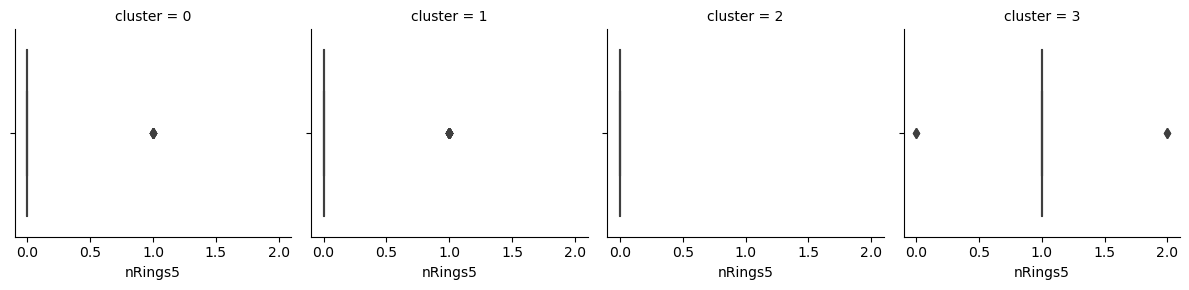

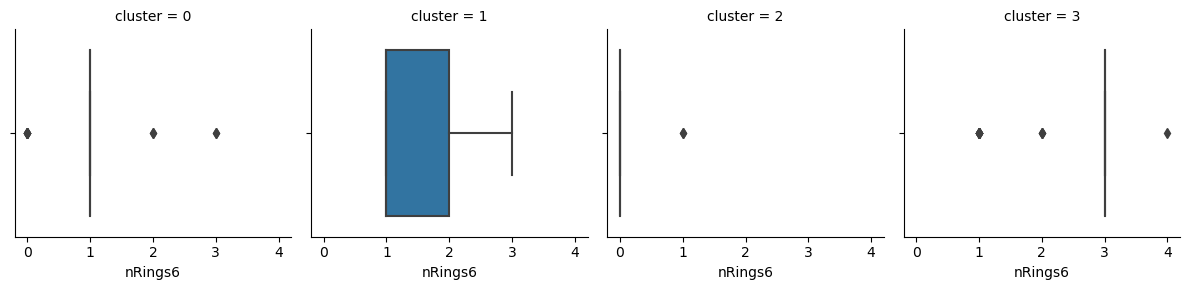

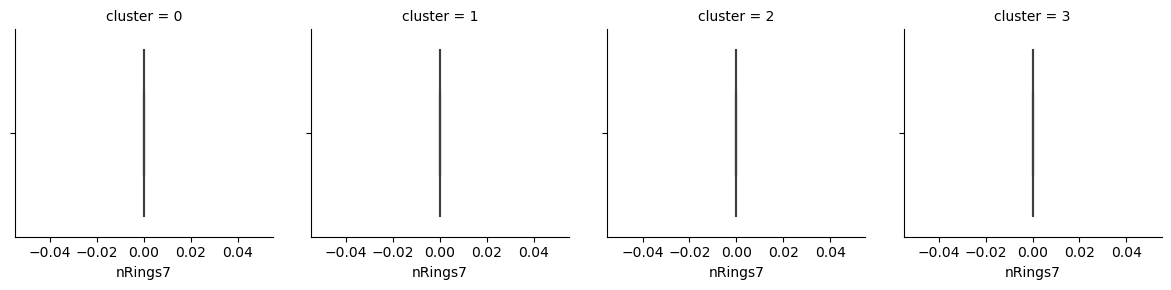

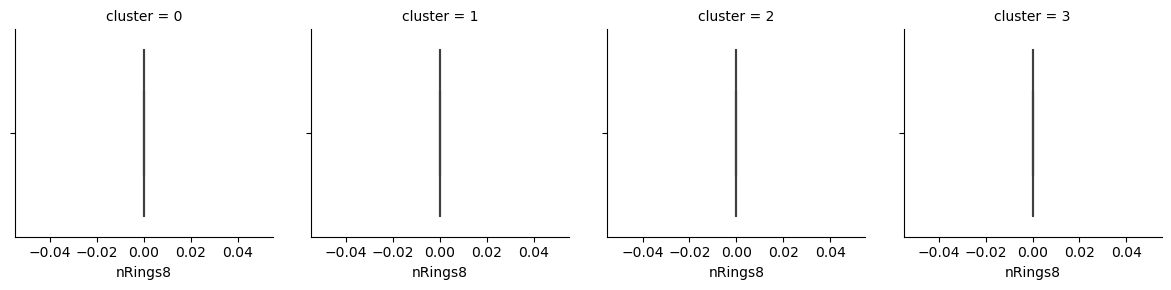

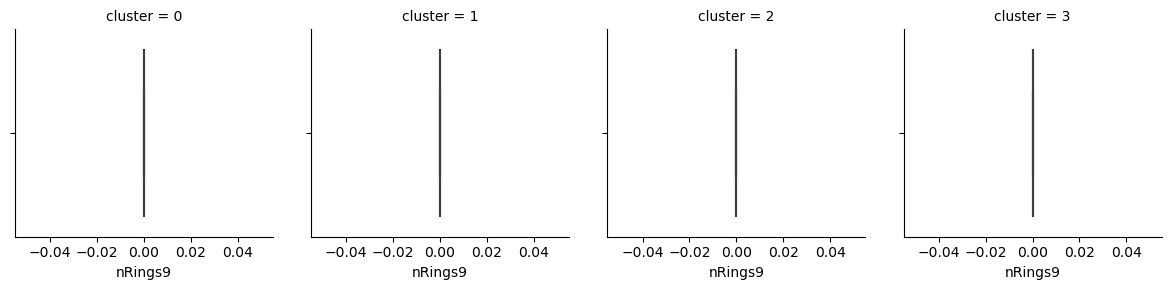

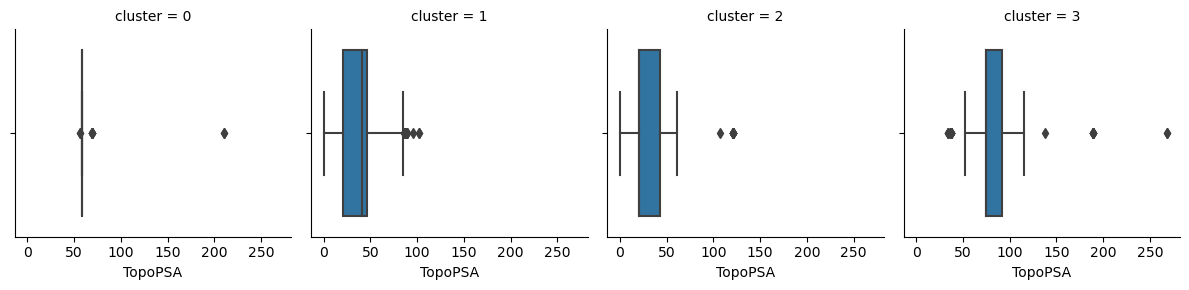

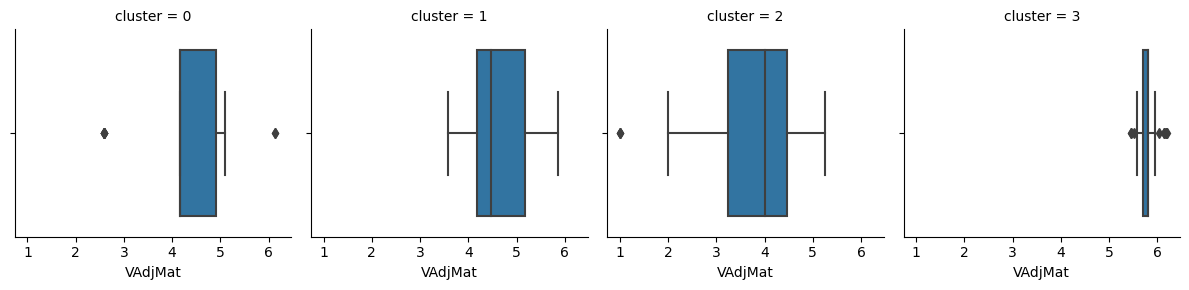

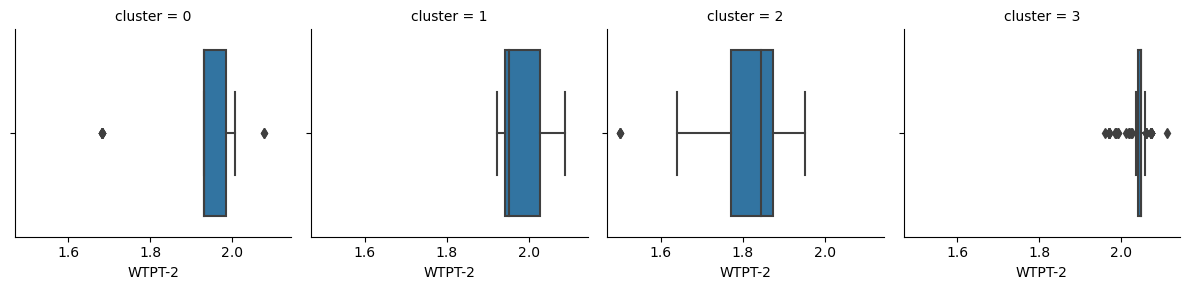

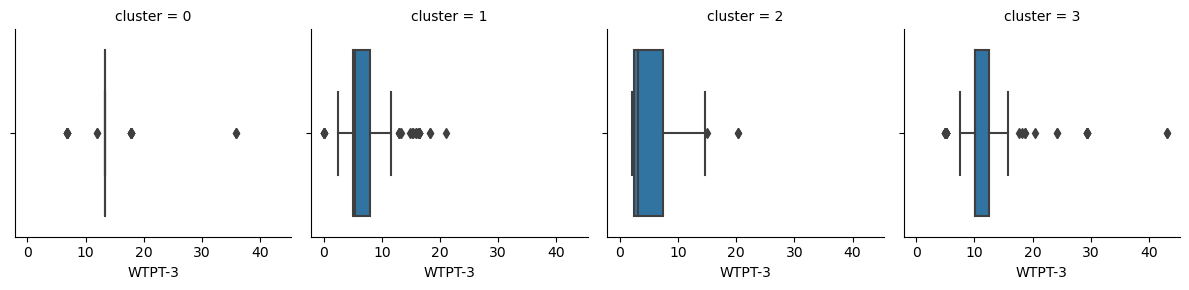

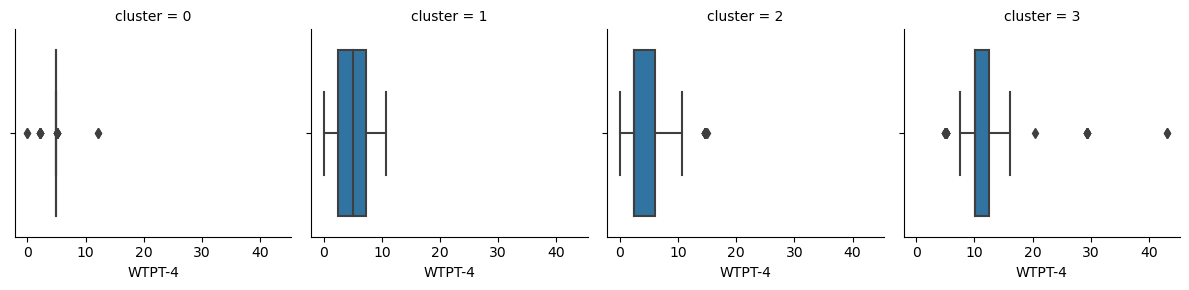

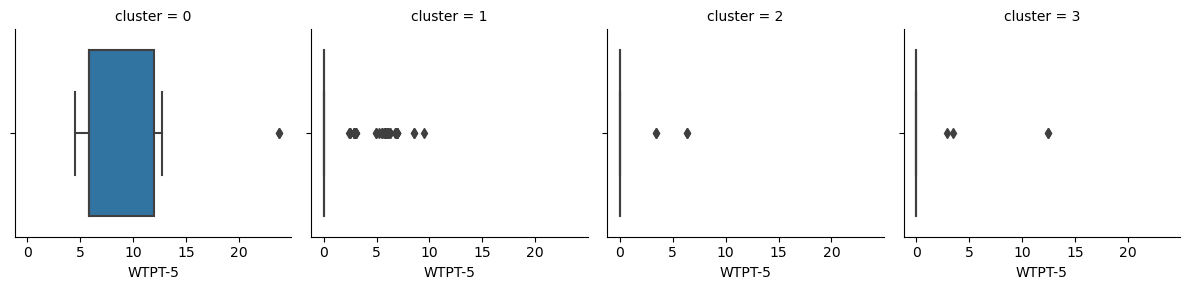

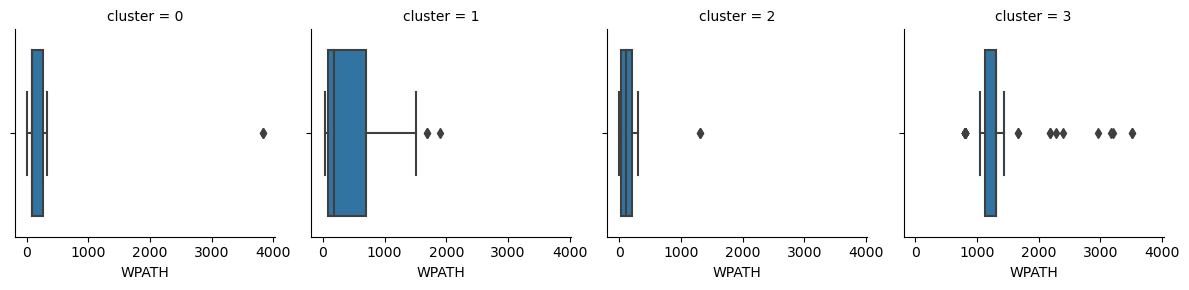

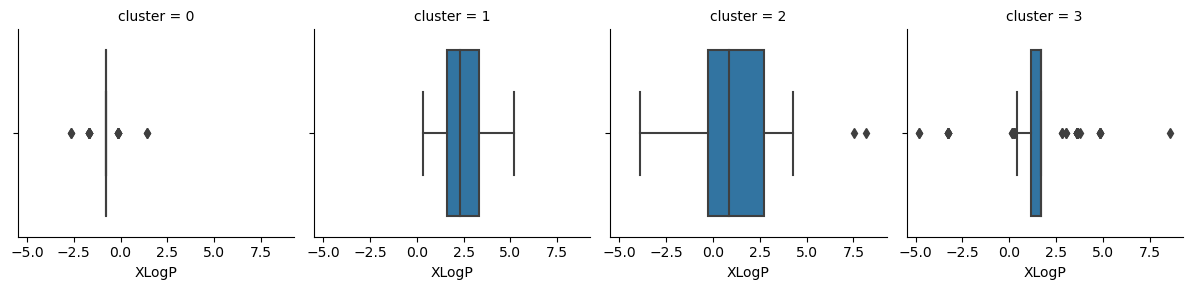

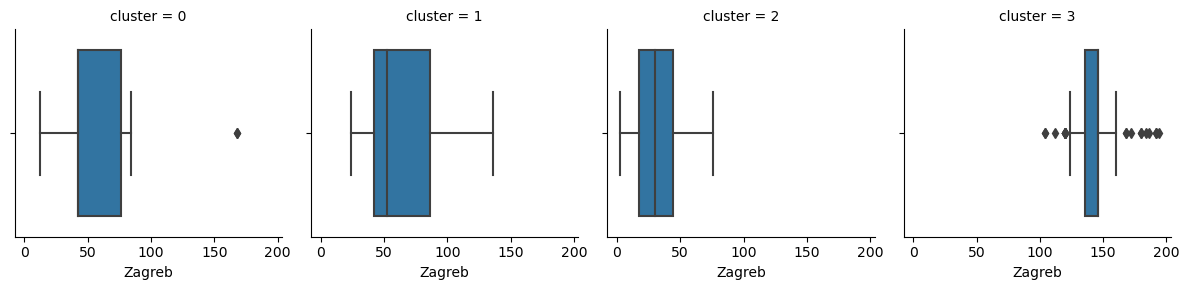

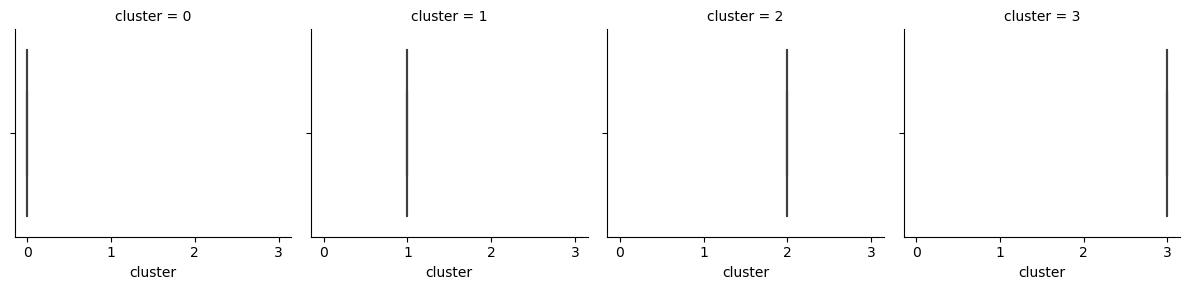

In [13]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col="cluster")
    grid.map(sns.boxplot, c)

In [39]:
# grouping by cluster and getting descriptive values
cluster_analysis = clusters.groupby('cluster', as_index=False)['logkpl'].agg(['count', 'min', 'max', 'mean', 'std',
                                                                            lambda x: x.quantile(0.75) - x.quantile(0.25), 
                                                                            lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
cluster_analysis.columns = ['count', 'min', 'max', 'mean', 'std', "IQR", "Q1", "Q3"]
cluster_analysis

count   min   max      mean       std     IQR     Q1      Q3
cluster                                                              
0          108 -5.53 -1.22 -2.930648  1.079380  1.4825 -3.550 -2.0675
1           53 -5.38 -1.50 -3.780189  1.073210  1.4900 -4.590 -3.1000
2           89 -4.96 -0.99 -2.643596  1.092495  1.5500 -3.370 -1.8200
3          167 -5.03 -0.08 -2.029401  0.863022  1.0400 -2.465 -1.4250

In [40]:
cluster_analysis.to_excel("../results/clusters_analysis.xlsx")